In [1]:
#Importing Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import requests
import gmaps
import os
import json
import time

# Import API key
from api_keys import g_key

#Access maps with unique API key
gmaps.configure(api_key=g_key)

In [2]:
#Pulling Data from CSV
file = "archive/winemag-data-130k-v2.csv"
#Creating Base Dataframe
df = pd.read_csv(file, index_col=0)
df

country                                        description  \
Index                                                                 
0          Italy  Aromas include tropical fruit, broom, brimston...   
1       Portugal  This is ripe and fruity, a wine that is smooth...   
2             US  Tart and snappy, the flavors of lime flesh and...   
3             US  Pineapple rind, lemon pith and orange blossom ...   
4             US  Much like the regular bottling from 2012, this...   
...          ...                                                ...   
129966   Germany  Notes of honeysuckle and cantaloupe sweeten th...   
129967        US  Citation is given as much as a decade of bottl...   
129968    France  Well-drained gravel soil gives this wine its c...   
129969    France  A dry style of Pinot Gris, this is crisp with ...   
129970    France  Big, rich and off-dry, this is powered by inte...   

                                   designation  points  price  \
Index                                                           
0                                 Vulkà Bianco      87    NaN   
1                                     Avidagos      87   15.0   
2                                          NaN      87   14.0   
3                         Reserve Late Harvest      87   13.0   
4           Vintner's Reserve Wild Child Block      87   65.0   
...                                        ...     ...    ...   
129966  Brauneberger Juffer-Sonnenuhr Spätlese      90   28.0   
129967                                     NaN      90   75.0   
129968                                   Kritt      90   30.0   
129969                                     NaN      90   32.0   
129970           Lieu-dit Harth Cuvée Caroline      90   21.0   

                 province             region_1           region_2  \
Index                                                               
0       Sicily & Sardinia                 Etna                NaN   
1                   Douro                  NaN                NaN   
2                  Oregon    Willamette Valley  Willamette Valley   
3                Michigan  Lake Michigan Shore                NaN   
4                  Oregon    Willamette Valley  Willamette Valley   
...                   ...                  ...                ...   
129966              Mosel                  NaN                NaN   
129967             Oregon               Oregon       Oregon Other   
129968             Alsace               Alsace                NaN   
129969             Alsace               Alsace                NaN   
129970             Alsace               Alsace                NaN   

               taster_name taster_twitter_handle  \
Index                                              
0            Kerin O’Keefe          @kerinokeefe   
1               Roger Voss            @vossroger   
2             Paul Gregutt           @paulgwine    
3       Alexander Peartree                   NaN   
4             Paul Gregutt           @paulgwine    
...                    ...                   ...   
129966  Anna Lee C. Iijima                   NaN   
129967        Paul Gregutt           @paulgwine    
129968          Roger Voss            @vossroger   
129969          Roger Voss            @vossroger   
129970          Roger Voss            @vossroger   

                                                    title         variety  \
Index                                                                       
0                       Nicosia 2013 Vulkà Bianco  (Etna)     White Blend   
1           Quinta dos Avidagos 2011 Avidagos Red (Douro)  Portuguese Red   
2           Rainstorm 2013 Pinot Gris (Willamette Valley)      Pinot Gris   
3       St. Julian 2013 Reserve Late Harvest Riesling ...        Riesling   
4       Sweet Cheeks 2012 Vintner's Reserve Wild Child...      Pinot Noir   
...                                                   ...             ...   
129966  Dr. H. Thanisch (Erben Müller-Burggraef)

In [3]:
#Dropping usless columns
df = df.drop(columns= ['region_2', 'taster_twitter_handle'])
df

country                                        description  \
Index                                                                 
0          Italy  Aromas include tropical fruit, broom, brimston...   
1       Portugal  This is ripe and fruity, a wine that is smooth...   
2             US  Tart and snappy, the flavors of lime flesh and...   
3             US  Pineapple rind, lemon pith and orange blossom ...   
4             US  Much like the regular bottling from 2012, this...   
...          ...                                                ...   
129966   Germany  Notes of honeysuckle and cantaloupe sweeten th...   
129967        US  Citation is given as much as a decade of bottl...   
129968    France  Well-drained gravel soil gives this wine its c...   
129969    France  A dry style of Pinot Gris, this is crisp with ...   
129970    France  Big, rich and off-dry, this is powered by inte...   

                                   designation  points  price  \
Index                                                           
0                                 Vulkà Bianco      87    NaN   
1                                     Avidagos      87   15.0   
2                                          NaN      87   14.0   
3                         Reserve Late Harvest      87   13.0   
4           Vintner's Reserve Wild Child Block      87   65.0   
...                                        ...     ...    ...   
129966  Brauneberger Juffer-Sonnenuhr Spätlese      90   28.0   
129967                                     NaN      90   75.0   
129968                                   Kritt      90   30.0   
129969                                     NaN      90   32.0   
129970           Lieu-dit Harth Cuvée Caroline      90   21.0   

                 province             region_1         taster_name  \
Index                                                                
0       Sicily & Sardinia                 Etna       Kerin O’Keefe   
1                   Douro                  NaN          Roger Voss   
2                  Oregon    Willamette Valley        Paul Gregutt   
3                Michigan  Lake Michigan Shore  Alexander Peartree   
4                  Oregon    Willamette Valley        Paul Gregutt   
...                   ...                  ...                 ...   
129966              Mosel                  NaN  Anna Lee C. Iijima   
129967             Oregon               Oregon        Paul Gregutt   
129968             Alsace               Alsace          Roger Voss   
129969             Alsace               Alsace          Roger Voss   
129970             Alsace               Alsace          Roger Voss   

                                                    title         variety  \
Index                                                                       
0                       Nicosia 2013 Vulkà Bianco  (Etna)     White Blend   
1           Quinta dos Avidagos 2011 Avidagos Red (Douro)  Portuguese Red   
2           Rainstorm 2013 Pinot Gris (Willamette Valley)      Pinot Gris   
3       St. Julian 2013 Reserve Late Harvest Riesling ...        Riesling   
4       Sweet Cheeks 2012 Vintner's Reserve Wild Child...      Pinot Noir   
...                                                   ...             ...   
129966  Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...        Riesling   
129967                  Citation 2004 Pinot Noir (Oregon)      Pinot Noir   
129968  Domaine Gresser 2013 Kritt Gewurztraminer (Als...  Gewürztraminer   
129969      Domaine Marcel Deiss 2012 Pinot Gris (Alsace)      Pinot Gris   
129970  Domaine Schoffit 2012 Lieu-dit Harth Cuvée Car...  Gewürztraminer   

                                          winery  
Index                                             
0                                        Nicosia  
1                            Quinta dos Avidagos  
2                                      Rainstorm  
3                                     St. Julian  
4                   

In [4]:
#Reorganizing order of header
df = df[['winery','title','variety','country','province','region_1','price','points','taster_name','description', 'designation']]
df

winery  \
Index                                              
0                                        Nicosia   
1                            Quinta dos Avidagos   
2                                      Rainstorm   
3                                     St. Julian   
4                                   Sweet Cheeks   
...                                          ...   
129966  Dr. H. Thanisch (Erben Müller-Burggraef)   
129967                                  Citation   
129968                           Domaine Gresser   
129969                      Domaine Marcel Deiss   
129970                          Domaine Schoffit   

                                                    title         variety  \
Index                                                                       
0                       Nicosia 2013 Vulkà Bianco  (Etna)     White Blend   
1           Quinta dos Avidagos 2011 Avidagos Red (Douro)  Portuguese Red   
2           Rainstorm 2013 Pinot Gris (Willamette Valley)      Pinot Gris   
3       St. Julian 2013 Reserve Late Harvest Riesling ...        Riesling   
4       Sweet Cheeks 2012 Vintner's Reserve Wild Child...      Pinot Noir   
...                                                   ...             ...   
129966  Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...        Riesling   
129967                  Citation 2004 Pinot Noir (Oregon)      Pinot Noir   
129968  Domaine Gresser 2013 Kritt Gewurztraminer (Als...  Gewürztraminer   
129969      Domaine Marcel Deiss 2012 Pinot Gris (Alsace)      Pinot Gris   
129970  Domaine Schoffit 2012 Lieu-dit Harth Cuvée Car...  Gewürztraminer   

         country           province             region_1  price  points  \
Index                                                                     
0          Italy  Sicily & Sardinia                 Etna    NaN      87   
1       Portugal              Douro                  NaN   15.0      87   
2             US             Oregon    Willamette Valley   14.0      87   
3             US           Michigan  Lake Michigan Shore   13.0      87   
4             US             Oregon    Willamette Valley   65.0      87   
...          ...                ...                  ...    ...     ...   
129966   Germany              Mosel                  NaN   28.0      90   
129967        US             Oregon               Oregon   75.0      90   
129968    France             Alsace               Alsace   30.0      90   
129969    France             Alsace               Alsace   32.0      90   
129970    France             Alsace               Alsace   21.0      90   

               taster_name                                        description  \
Index                                                                           
0            Kerin O’Keefe  Aromas include tropical fruit, broom, brimston...   
1               Roger Voss  This is ripe and fruity, a wine that is smooth...   
2             Paul Gregutt  Tart and snappy, the flavors of lime flesh and...   
3       Alexander Peartree  Pineapple rind, lemon pith and orange blossom ...   
4             Paul Gregutt  Much like the regular bottling from 2012, this...   
...                    ...                                                ...   
129966  Anna Lee C. Iijima  Notes of honeysuckle and cantaloupe sweeten th...   
129967        Paul Gregutt  Citation is given as much as a decade of bottl...   
129968          Roger Voss  Well-drained gravel soil gives this wine its c...   
129969          Roger Voss  A dry style of Pinot Gris, this is crisp with ...   
129970          Roger Voss  Big, rich and off-dry, this is powered by inte...   

                                   designation  
Index                                           
0                                 Vulkà Bianco  
1                                     Avidagos  
2                                          NaN  
3                         Reserve Late Harvest  
4           Vintner's Reserve Wild Chil

In [5]:
#Renaming/Cleaning headers 
df = df.rename(columns={'variety': 'Grape Type',
                       'region_1': 'Sub-Region',
                       'taster_name': 'Wine Critic',
                       'designation': 'Additional Designations',
                       'winery': 'Winery',
                       'title': 'Name of Wine',
                       })
df

Winery  \
Index                                              
0                                        Nicosia   
1                            Quinta dos Avidagos   
2                                      Rainstorm   
3                                     St. Julian   
4                                   Sweet Cheeks   
...                                          ...   
129966  Dr. H. Thanisch (Erben Müller-Burggraef)   
129967                                  Citation   
129968                           Domaine Gresser   
129969                      Domaine Marcel Deiss   
129970                          Domaine Schoffit   

                                             Name of Wine      Grape Type  \
Index                                                                       
0                       Nicosia 2013 Vulkà Bianco  (Etna)     White Blend   
1           Quinta dos Avidagos 2011 Avidagos Red (Douro)  Portuguese Red   
2           Rainstorm 2013 Pinot Gris (Willamette Valley)      Pinot Gris   
3       St. Julian 2013 Reserve Late Harvest Riesling ...        Riesling   
4       Sweet Cheeks 2012 Vintner's Reserve Wild Child...      Pinot Noir   
...                                                   ...             ...   
129966  Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...        Riesling   
129967                  Citation 2004 Pinot Noir (Oregon)      Pinot Noir   
129968  Domaine Gresser 2013 Kritt Gewurztraminer (Als...  Gewürztraminer   
129969      Domaine Marcel Deiss 2012 Pinot Gris (Alsace)      Pinot Gris   
129970  Domaine Schoffit 2012 Lieu-dit Harth Cuvée Car...  Gewürztraminer   

         country           province           Sub-Region  price  points  \
Index                                                                     
0          Italy  Sicily & Sardinia                 Etna    NaN      87   
1       Portugal              Douro                  NaN   15.0      87   
2             US             Oregon    Willamette Valley   14.0      87   
3             US           Michigan  Lake Michigan Shore   13.0      87   
4             US             Oregon    Willamette Valley   65.0      87   
...          ...                ...                  ...    ...     ...   
129966   Germany              Mosel                  NaN   28.0      90   
129967        US             Oregon               Oregon   75.0      90   
129968    France             Alsace               Alsace   30.0      90   
129969    France             Alsace               Alsace   32.0      90   
129970    France             Alsace               Alsace   21.0      90   

               Wine Critic                                        description  \
Index                                                                           
0            Kerin O’Keefe  Aromas include tropical fruit, broom, brimston...   
1               Roger Voss  This is ripe and fruity, a wine that is smooth...   
2             Paul Gregutt  Tart and snappy, the flavors of lime flesh and...   
3       Alexander Peartree  Pineapple rind, lemon pith and orange blossom ...   
4             Paul Gregutt  Much like the regular bottling from 2012, this...   
...                    ...                                                ...   
129966  Anna Lee C. Iijima  Notes of honeysuckle and cantaloupe sweeten th...   
129967        Paul Gregutt  Citation is given as much as a decade of bottl...   
129968          Roger Voss  Well-drained gravel soil gives this wine its c...   
129969          Roger Voss  A dry style of Pinot Gris, this is crisp with ...   
129970          Roger Voss  Big, rich and off-dry, this is powered by inte...   

                       Additional Designations  
Index                                           
0                                 Vulkà Bianco  
1                                     Avidagos  
2                                          NaN  
3                         Reserve Late Harvest  
4           Vintner's Reserve Wild Chil

In [6]:
#Cleaning Headers
df.columns = df.columns.str.title()

In [7]:
df

Winery  \
Index                                              
0                                        Nicosia   
1                            Quinta dos Avidagos   
2                                      Rainstorm   
3                                     St. Julian   
4                                   Sweet Cheeks   
...                                          ...   
129966  Dr. H. Thanisch (Erben Müller-Burggraef)   
129967                                  Citation   
129968                           Domaine Gresser   
129969                      Domaine Marcel Deiss   
129970                          Domaine Schoffit   

                                             Name Of Wine      Grape Type  \
Index                                                                       
0                       Nicosia 2013 Vulkà Bianco  (Etna)     White Blend   
1           Quinta dos Avidagos 2011 Avidagos Red (Douro)  Portuguese Red   
2           Rainstorm 2013 Pinot Gris (Willamette Valley)      Pinot Gris   
3       St. Julian 2013 Reserve Late Harvest Riesling ...        Riesling   
4       Sweet Cheeks 2012 Vintner's Reserve Wild Child...      Pinot Noir   
...                                                   ...             ...   
129966  Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...        Riesling   
129967                  Citation 2004 Pinot Noir (Oregon)      Pinot Noir   
129968  Domaine Gresser 2013 Kritt Gewurztraminer (Als...  Gewürztraminer   
129969      Domaine Marcel Deiss 2012 Pinot Gris (Alsace)      Pinot Gris   
129970  Domaine Schoffit 2012 Lieu-dit Harth Cuvée Car...  Gewürztraminer   

         Country           Province           Sub-Region  Price  Points  \
Index                                                                     
0          Italy  Sicily & Sardinia                 Etna    NaN      87   
1       Portugal              Douro                  NaN   15.0      87   
2             US             Oregon    Willamette Valley   14.0      87   
3             US           Michigan  Lake Michigan Shore   13.0      87   
4             US             Oregon    Willamette Valley   65.0      87   
...          ...                ...                  ...    ...     ...   
129966   Germany              Mosel                  NaN   28.0      90   
129967        US             Oregon               Oregon   75.0      90   
129968    France             Alsace               Alsace   30.0      90   
129969    France             Alsace               Alsace   32.0      90   
129970    France             Alsace               Alsace   21.0      90   

               Wine Critic                                        Description  \
Index                                                                           
0            Kerin O’Keefe  Aromas include tropical fruit, broom, brimston...   
1               Roger Voss  This is ripe and fruity, a wine that is smooth...   
2             Paul Gregutt  Tart and snappy, the flavors of lime flesh and...   
3       Alexander Peartree  Pineapple rind, lemon pith and orange blossom ...   
4             Paul Gregutt  Much like the regular bottling from 2012, this...   
...                    ...                                                ...   
129966  Anna Lee C. Iijima  Notes of honeysuckle and cantaloupe sweeten th...   
129967        Paul Gregutt  Citation is given as much as a decade of bottl...   
129968          Roger Voss  Well-drained gravel soil gives this wine its c...   
129969          Roger Voss  A dry style of Pinot Gris, this is crisp with ...   
129970          Roger Voss  Big, rich and off-dry, this is powered by inte...   

                       Additional Designations  
Index                                           
0                                 Vulkà Bianco  
1                                     Avidagos  
2                                          NaN  
3                         Reserve Late Harvest  
4           Vintner's Reserve Wild Chil

In [8]:
#Dropping Nan values in important data metrics 
df = df.dropna(axis=0, how= 'any', subset= ['Price','Points','Wine Critic'])
df

Winery  \
Index                                              
1                            Quinta dos Avidagos   
2                                      Rainstorm   
3                                     St. Julian   
4                                   Sweet Cheeks   
5                                         Tandem   
...                                          ...   
129966  Dr. H. Thanisch (Erben Müller-Burggraef)   
129967                                  Citation   
129968                           Domaine Gresser   
129969                      Domaine Marcel Deiss   
129970                          Domaine Schoffit   

                                             Name Of Wine          Grape Type  \
Index                                                                           
1           Quinta dos Avidagos 2011 Avidagos Red (Douro)      Portuguese Red   
2           Rainstorm 2013 Pinot Gris (Willamette Valley)          Pinot Gris   
3       St. Julian 2013 Reserve Late Harvest Riesling ...            Riesling   
4       Sweet Cheeks 2012 Vintner's Reserve Wild Child...          Pinot Noir   
5       Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...  Tempranillo-Merlot   
...                                                   ...                 ...   
129966  Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...            Riesling   
129967                  Citation 2004 Pinot Noir (Oregon)          Pinot Noir   
129968  Domaine Gresser 2013 Kritt Gewurztraminer (Als...      Gewürztraminer   
129969      Domaine Marcel Deiss 2012 Pinot Gris (Alsace)          Pinot Gris   
129970  Domaine Schoffit 2012 Lieu-dit Harth Cuvée Car...      Gewürztraminer   

         Country        Province           Sub-Region  Price  Points  \
Index                                                                  
1       Portugal           Douro                  NaN   15.0      87   
2             US          Oregon    Willamette Valley   14.0      87   
3             US        Michigan  Lake Michigan Shore   13.0      87   
4             US          Oregon    Willamette Valley   65.0      87   
5          Spain  Northern Spain              Navarra   15.0      87   
...          ...             ...                  ...    ...     ...   
129966   Germany           Mosel                  NaN   28.0      90   
129967        US          Oregon               Oregon   75.0      90   
129968    France          Alsace               Alsace   30.0      90   
129969    France          Alsace               Alsace   32.0      90   
129970    France          Alsace               Alsace   21.0      90   

               Wine Critic                                        Description  \
Index                                                                           
1               Roger Voss  This is ripe and fruity, a wine that is smooth...   
2             Paul Gregutt  Tart and snappy, the flavors of lime flesh and...   
3       Alexander Peartree  Pineapple rind, lemon pith and orange blossom ...   
4             Paul Gregutt  Much like the regular bottling from 2012, this...   
5        Michael Schachner  Blackberry and raspberry aromas show a typical...   
...                    ...                                                ...   
129966  Anna Lee C. Iijima  Notes of honeysuckle and cantaloupe sweeten th...   
129967        Paul Gregutt  Citation is given as much as a decade of bottl...   
129968          Roger Voss  Well-drained gravel soil gives this wine its c...   
129969          Roger Voss  A dry style of Pinot Gris, this is crisp with ...   
129970          Roger Voss  Big, rich and off-dry, this is powered by inte...   

                       Additional Designations  
Index                                           
1                                     Avidagos  
2                                          NaN  
3                         Reserve Late Harvest  
4           Vintner's Reserve Wild Child Block  
5                         

/Users/Serena/anaconda3/envs/PythonData/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1195: RuntimeWarning: invalid value encountered in double_scalars
  loval = q1 - whis * stats['iqr']
/Users/Serena/anaconda3/envs/PythonData/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1196: RuntimeWarning: invalid value encountered in double_scalars
  hival = q3 + whis * stats['iqr']
/Users/Serena/anaconda3/envs/PythonData/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1195: RuntimeWarning: invalid value encountered in double_scalars
  loval = q1 - whis * stats['iqr']
/Users/Serena/anaconda3/envs/PythonData/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1196: RuntimeWarning: invalid value encountered in double_scalars
  hival = q3 + whis * stats['iqr']


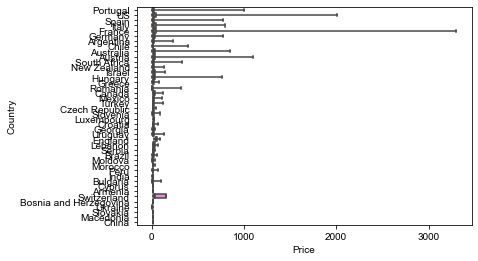

In [9]:
# Displaying boxplot/IQR of prices of wines by country
country = sns.boxplot(y="Country", x="Price", data=df, whis=np.inf)
#country = sns.stripplot(y="Country", x="Price", data=df, color=".3")
country = sns.set(rc={'figure.figsize':(20,80)}, font_scale= 1.5)

In [10]:
#Describing the main data frame
df.describe()

Price        Points
count  96479.000000  96479.000000
mean      34.998642     88.585723
std       43.057234      2.951305
min        4.000000     80.000000
25%       17.000000     87.000000
50%       25.000000     88.000000
75%       40.000000     91.000000
max     3300.000000    100.000000

In [11]:
#Grouping Data by Country
country_group = df.groupby(by= 'Country')
#Finding mean of country data
country_df = country_group.mean()
country_df

Price     Points
Country                                     
Argentina               24.452438  86.707701
Armenia                 14.500000  87.500000
Australia               37.492277  88.805680
Austria                 30.782157  90.204228
Bosnia and Herzegovina  12.500000  86.500000
Brazil                  23.765957  84.659574
Bulgaria                14.645390  87.936170
Canada                  35.636364  89.367589
Chile                   20.869686  86.514286
China                   18.000000  89.000000
Croatia                 25.450704  87.352113
Cyprus                  16.272727  87.181818
Czech Republic          24.250000  87.250000
England                 51.681159  91.550725
France                  41.190528  88.751612
Georgia                 19.321429  87.678571
Germany                 42.452461  89.840420
Greece                  22.364425  87.288503
Hungary                 40.402778  89.166667
India                   13.333333  90.222222
Israel                  31.973140  88.557851
Italy                   41.607450  88.885090
Lebanon                 30.685714  87.685714
Luxembourg              23.333333  88.666667
Macedonia               15.583333  86.833333
Mexico                  27.800000  85.261538
Moldova                 16.745763  87.203390
Morocco                 19.500000  88.571429
New Zealand             27.257480  88.340945
Peru                    18.062500  83.562500
Portugal                26.093429  88.312526
Romania                 15.241667  86.400000
Serbia                  24.500000  87.500000
Slovakia                16.000000  87.000000
Slovenia                24.812500  88.012500
South Africa            25.004918  87.929508
Spain                   28.343063  87.315256
Switzerland             85.285714  88.571429
Turkey                  24.633333  88.088889
US                      36.188451  88.980139
Ukraine                  9.214286  84.071429
Uruguay                 26.403670  86.752294

In [12]:
#Sorting Data by Price(Ascending)
price_df = country_df.sort_values(by= 'Price')
price_df

Price     Points
Country                                     
Ukraine                  9.214286  84.071429
Bosnia and Herzegovina  12.500000  86.500000
India                   13.333333  90.222222
Armenia                 14.500000  87.500000
Bulgaria                14.645390  87.936170
Romania                 15.241667  86.400000
Macedonia               15.583333  86.833333
Slovakia                16.000000  87.000000
Cyprus                  16.272727  87.181818
Moldova                 16.745763  87.203390
China                   18.000000  89.000000
Peru                    18.062500  83.562500
Georgia                 19.321429  87.678571
Morocco                 19.500000  88.571429
Chile                   20.869686  86.514286
Greece                  22.364425  87.288503
Luxembourg              23.333333  88.666667
Brazil                  23.765957  84.659574
Czech Republic          24.250000  87.250000
Argentina               24.452438  86.707701
Serbia                  24.500000  87.500000
Turkey                  24.633333  88.088889
Slovenia                24.812500  88.012500
South Africa            25.004918  87.929508
Croatia                 25.450704  87.352113
Portugal                26.093429  88.312526
Uruguay                 26.403670  86.752294
New Zealand             27.257480  88.340945
Mexico                  27.800000  85.261538
Spain                   28.343063  87.315256
Lebanon                 30.685714  87.685714
Austria                 30.782157  90.204228
Israel                  31.973140  88.557851
Canada                  35.636364  89.367589
US                      36.188451  88.980139
Australia               37.492277  88.805680
Hungary                 40.402778  89.166667
France                  41.190528  88.751612
Italy                   41.607450  88.885090
Germany                 42.452461  89.840420
England                 51.681159  91.550725
Switzerland             85.285714  88.571429

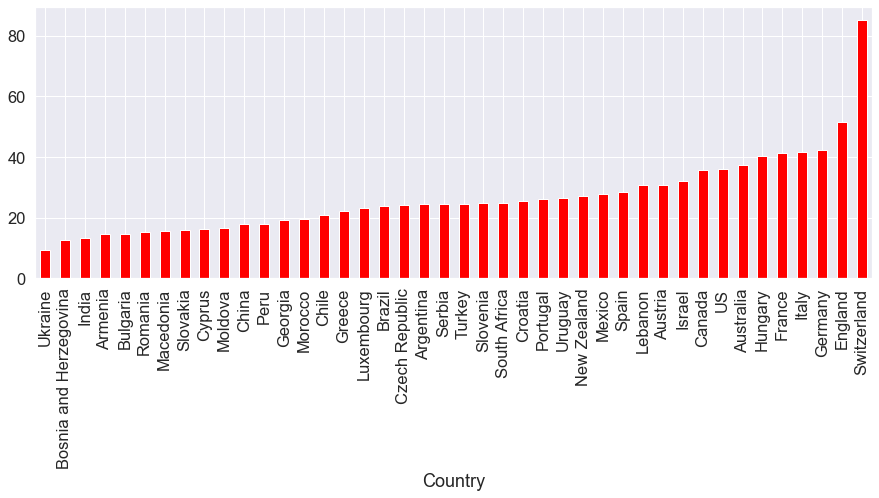

In [13]:
#Visualizing average price of a bottle of reviewed wine per country
price_df["Price"].plot(kind="bar", facecolor="red", figsize=(15,5));

In [14]:
#Examining Switzerland data
swiss_df = df[df['Country'] == 'Switzerland']
swiss_df

Winery  \
Index                         
14187       Robert Gilliard   
21791            Gantenbein   
32423            Gantenbein   
50589                 Delea   
81814            Gantenbein   
83632       Robert Gilliard   
129280  Château d'Auvernier   

                                             Name Of Wine        Grape Type  \
Index                                                                         
14187   Robert Gilliard 2012 Dôle des Monts Pinot Noir...  Pinot Noir-Gamay   
21791            Gantenbein 2011 Pinot Noir (Switzerland)        Pinot Noir   
32423            Gantenbein 2012 Pinot Noir (Switzerland)        Pinot Noir   
50589                   Delea 2004 Carato Merlot (Ticino)            Merlot   
81814            Gantenbein 2012 Pinot Noir (Switzerland)        Pinot Noir   
83632   Robert Gilliard 2012 Les Murettes Chasselas (V...         Chasselas   
129280         Château d'Auvernier 2012 White (Neuchâtel)       White Blend   

            Country     Province Sub-Region  Price  Points      Wine Critic  \
Index                                                                         
14187   Switzerland       Valais        NaN   30.0      90     Jeff Jenssen   
21791   Switzerland  Switzerland        NaN  160.0      89     Jeff Jenssen   
32423   Switzerland  Switzerland        NaN  160.0      89     Jeff Jenssen   
50589   Switzerland       Ticino        NaN   38.0      83  Susan Kostrzewa   
81814   Switzerland  Switzerland        NaN  160.0      89     Jeff Jenssen   
83632   Switzerland       Valais        NaN   28.0      90     Jeff Jenssen   
129280  Switzerland    Neuchâtel        NaN   21.0      90     Jeff Jenssen   

                                              Description  \
Index                                                       
14187   A Swiss blend of Pinot Noir and Gamay, this de...   
21791   This wine is cherry red with soft brown tinges...   
32423   This wine has a bouquet of tart cherry with a ...   
50589   A soft blackberry, vanilla and plum nose is fo...   
81814   This wine has a bouquet of tart cherry with a ...   
83632   Vanilla and lemon curd aromas bring nuance and...   
129280  The bouquet of this wine shows condensed fruit...   

       Additional Designations  
Index                           
14187           Dôle des Monts  
21791                      NaN  
32423                      NaN  
50589                   Carato  
81814                      NaN  
83632             Les Murettes  
129280                     NaN

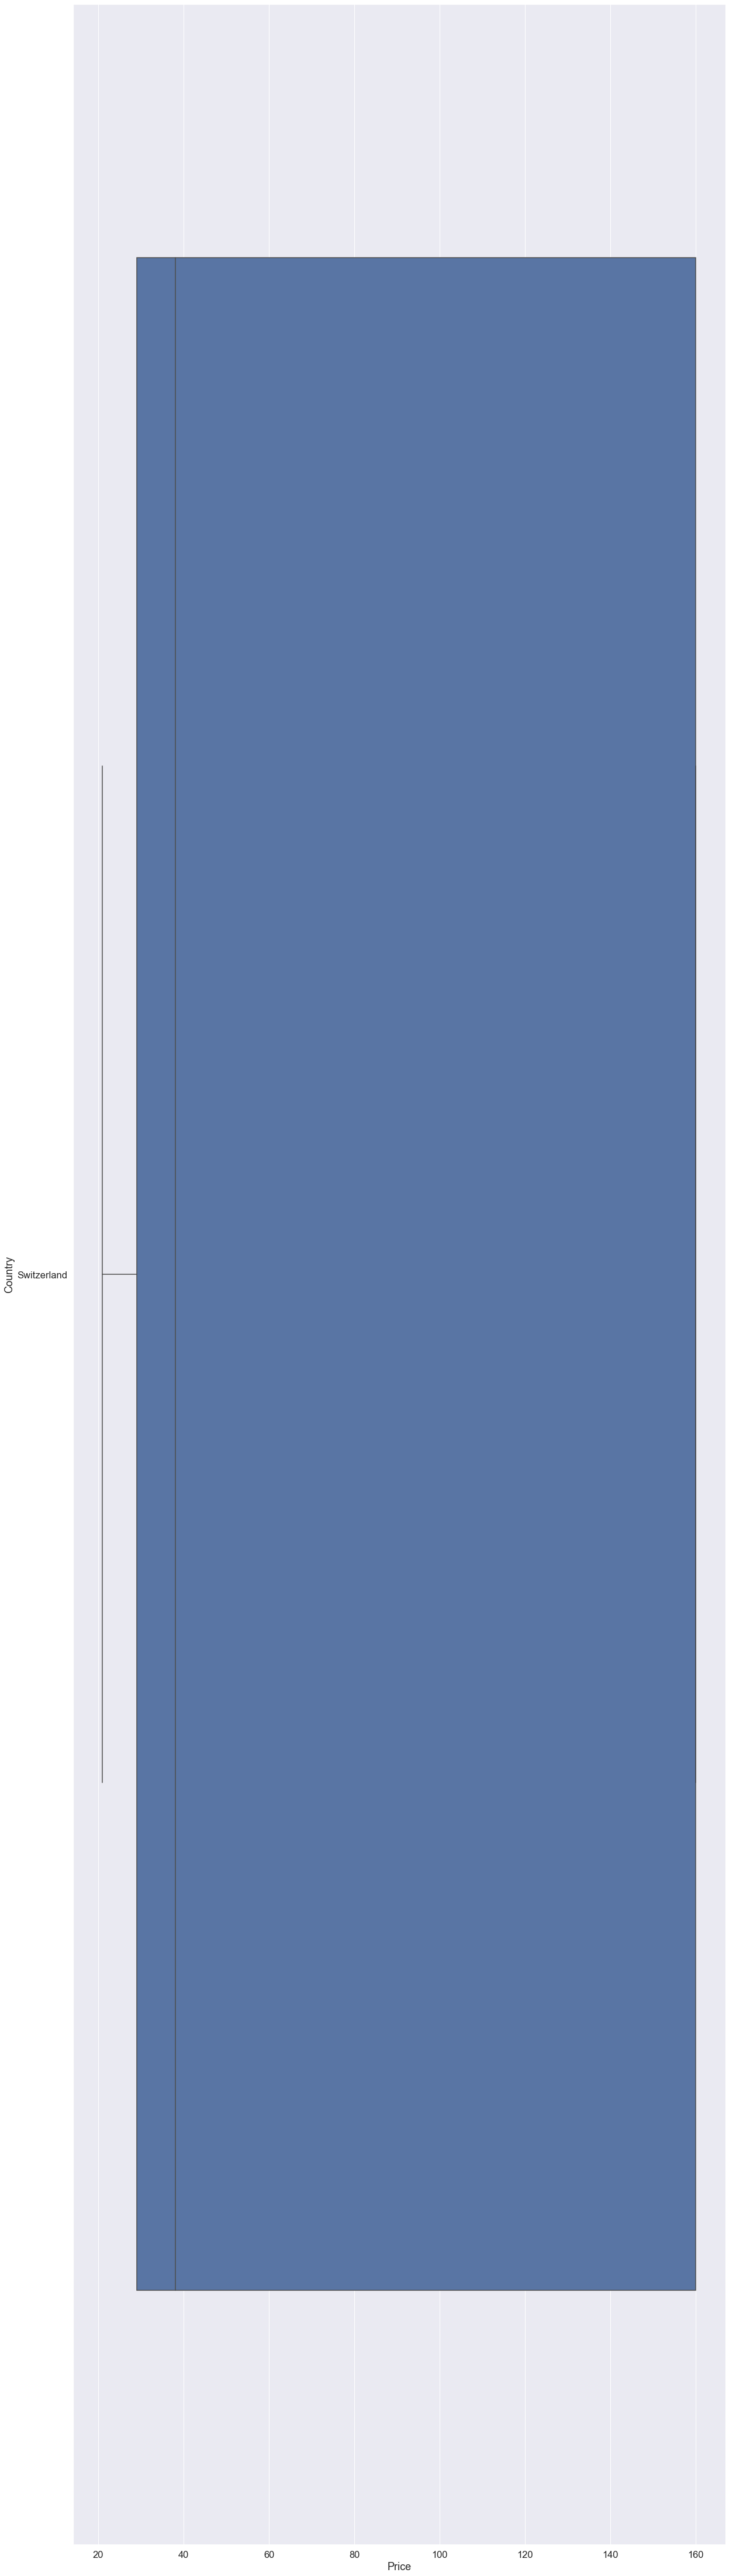

In [15]:
#Boxplot of Switzerland to try and uncover any outliers
#add a box plot + stripchart
swiss = sns.boxplot(x="Price", y="Country", data=swiss_df, whis=np.inf)
#swiss = sns.stripplot(x="Price", y="Country", data=swiss_df, color=".3")

In [16]:
#Describing Swiss Data
swiss_df.describe()

Price     Points
count    7.000000   7.000000
mean    85.285714  88.571429
std     70.063577   2.507133
min     21.000000  83.000000
25%     29.000000  89.000000
50%     38.000000  89.000000
75%    160.000000  90.000000
max    160.000000  90.000000

In [17]:
#Sorting Data by Points(Ascending)
points_df = country_df.sort_values(by= 'Points')
points_df

Price     Points
Country                                     
Peru                    18.062500  83.562500
Ukraine                  9.214286  84.071429
Brazil                  23.765957  84.659574
Mexico                  27.800000  85.261538
Romania                 15.241667  86.400000
Bosnia and Herzegovina  12.500000  86.500000
Chile                   20.869686  86.514286
Argentina               24.452438  86.707701
Uruguay                 26.403670  86.752294
Macedonia               15.583333  86.833333
Slovakia                16.000000  87.000000
Cyprus                  16.272727  87.181818
Moldova                 16.745763  87.203390
Czech Republic          24.250000  87.250000
Greece                  22.364425  87.288503
Spain                   28.343063  87.315256
Croatia                 25.450704  87.352113
Serbia                  24.500000  87.500000
Armenia                 14.500000  87.500000
Georgia                 19.321429  87.678571
Lebanon                 30.685714  87.685714
South Africa            25.004918  87.929508
Bulgaria                14.645390  87.936170
Slovenia                24.812500  88.012500
Turkey                  24.633333  88.088889
Portugal                26.093429  88.312526
New Zealand             27.257480  88.340945
Israel                  31.973140  88.557851
Switzerland             85.285714  88.571429
Morocco                 19.500000  88.571429
Luxembourg              23.333333  88.666667
France                  41.190528  88.751612
Australia               37.492277  88.805680
Italy                   41.607450  88.885090
US                      36.188451  88.980139
China                   18.000000  89.000000
Hungary                 40.402778  89.166667
Canada                  35.636364  89.367589
Germany                 42.452461  89.840420
Austria                 30.782157  90.204228
India                   13.333333  90.222222
England                 51.681159  91.550725

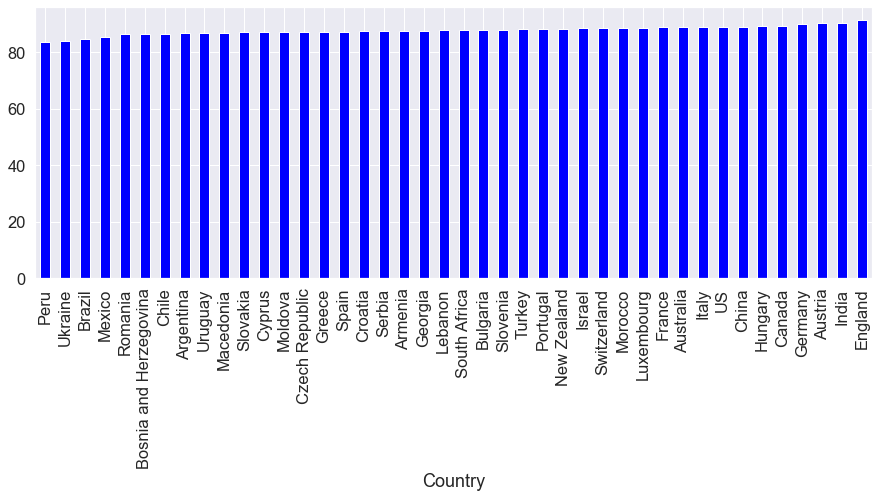

In [18]:
#Plotting bar chart showing avg points given to a btl reviewed wine in each country
points_df["Points"].plot(kind="bar", facecolor="blue", figsize=(15,5));

In [19]:
#Adding new column to uncover the average $ it costs consumers per point rating in each country
country_df['Average Price per Point ($)'] = round(country_df['Price']/country_df['Points'],2)
country_df

Price     Points  Average Price per Point ($)
Country                                                                  
Argentina               24.452438  86.707701                         0.28
Armenia                 14.500000  87.500000                         0.17
Australia               37.492277  88.805680                         0.42
Austria                 30.782157  90.204228                         0.34
Bosnia and Herzegovina  12.500000  86.500000                         0.14
Brazil                  23.765957  84.659574                         0.28
Bulgaria                14.645390  87.936170                         0.17
Canada                  35.636364  89.367589                         0.40
Chile                   20.869686  86.514286                         0.24
China                   18.000000  89.000000                         0.20
Croatia                 25.450704  87.352113                         0.29
Cyprus                  16.272727  87.181818                         0.19
Czech Republic          24.250000  87.250000                         0.28
England                 51.681159  91.550725                         0.56
France                  41.190528  88.751612                         0.46
Georgia                 19.321429  87.678571                         0.22
Germany                 42.452461  89.840420                         0.47
Greece                  22.364425  87.288503                         0.26
Hungary                 40.402778  89.166667                         0.45
India                   13.333333  90.222222                         0.15
Israel                  31.973140  88.557851                         0.36
Italy                   41.607450  88.885090                         0.47
Lebanon                 30.685714  87.685714                         0.35
Luxembourg              23.333333  88.666667                         0.26
Macedonia               15.583333  86.833333                         0.18
Mexico                  27.800000  85.261538                         0.33
Moldova                 16.745763  87.203390                         0.19
Morocco                 19.500000  88.571429                         0.22
New Zealand             27.257480  88.340945                         0.31
Peru                    18.062500  83.562500                         0.22
Portugal                26.093429  88.312526                         0.30
Romania                 15.241667  86.400000                         0.18
Serbia                  24.500000  87.500000                         0.28
Slovakia                16.000000  87.000000                         0.18
Slovenia                24.812500  88.012500                         0.28
South Africa            25.004918  87.929508                         0.28
Spain                   28.343063  87.315256                         0.32
Switzerland             85.285714  88.571429                         0.96
Turkey                  24.633333  88.088889                         0.28
US                      36.188451  88.980139                         0.41
Ukraine                  9.214286  84.071429                         0.11
Uruguay                 26.403670  86.752294                         0.30

In [20]:
#Sorting data by Avg Price per point
ppp_df = country_df.sort_values(by= 'Average Price per Point ($)')
ppp_df

Price     Points  Average Price per Point ($)
Country                                                                  
Ukraine                  9.214286  84.071429                         0.11
Bosnia and Herzegovina  12.500000  86.500000                         0.14
India                   13.333333  90.222222                         0.15
Armenia                 14.500000  87.500000                         0.17
Bulgaria                14.645390  87.936170                         0.17
Romania                 15.241667  86.400000                         0.18
Slovakia                16.000000  87.000000                         0.18
Macedonia               15.583333  86.833333                         0.18
Cyprus                  16.272727  87.181818                         0.19
Moldova                 16.745763  87.203390                         0.19
China                   18.000000  89.000000                         0.20
Georgia                 19.321429  87.678571                         0.22
Peru                    18.062500  83.562500                         0.22
Morocco                 19.500000  88.571429                         0.22
Chile                   20.869686  86.514286                         0.24
Luxembourg              23.333333  88.666667                         0.26
Greece                  22.364425  87.288503                         0.26
Argentina               24.452438  86.707701                         0.28
Slovenia                24.812500  88.012500                         0.28
Brazil                  23.765957  84.659574                         0.28
South Africa            25.004918  87.929508                         0.28
Turkey                  24.633333  88.088889                         0.28
Serbia                  24.500000  87.500000                         0.28
Czech Republic          24.250000  87.250000                         0.28
Croatia                 25.450704  87.352113                         0.29
Portugal                26.093429  88.312526                         0.30
Uruguay                 26.403670  86.752294                         0.30
New Zealand             27.257480  88.340945                         0.31
Spain                   28.343063  87.315256                         0.32
Mexico                  27.800000  85.261538                         0.33
Austria                 30.782157  90.204228                         0.34
Lebanon                 30.685714  87.685714                         0.35
Israel                  31.973140  88.557851                         0.36
Canada                  35.636364  89.367589                         0.40
US                      36.188451  88.980139                         0.41
Australia               37.492277  88.805680                         0.42
Hungary                 40.402778  89.166667                         0.45
France                  41.190528  88.751612                         0.46
Italy                   41.607450  88.885090                         0.47
Germany                 42.452461  89.840420                         0.47
England                 51.681159  91.550725                         0.56
Switzerland             85.285714  88.571429                         0.96

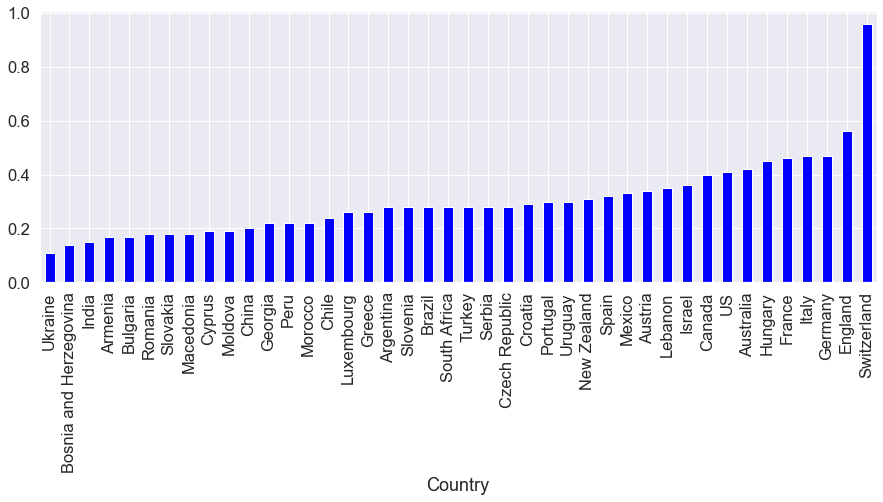

In [21]:
#Plotting Avg PPP data
ppp_df["Average Price per Point ($)"].plot(kind="bar", facecolor="blue", figsize=(15,5));

In [22]:
#Displaying how many wines were reviewed per country
dfg = df.groupby(by= 'Country').count()
dfg = dfg[['Wine Critic']]
dfg = dfg.sort_values(by= 'Wine Critic')
dfg

Wine Critic
Country                            
Slovakia                          1
China                             1
Armenia                           2
Bosnia and Herzegovina            2
Luxembourg                        6
Switzerland                       7
India                             9
Cyprus                           11
Macedonia                        12
Serbia                           12
Czech Republic                   12
Ukraine                          14
Peru                             16
Morocco                          28
Lebanon                          35
Brazil                           47
Moldova                          59
Mexico                           65
England                          69
Croatia                          71
Slovenia                         80
Georgia                          84
Turkey                           90
Uruguay                         109
Romania                         120
Bulgaria                        141
Hungary                         144
Canada                          253
Greece                          461
Israel                          484
South Africa                   1220
New Zealand                    1270
Australia                      2007
Germany                        2093
Austria                        2791
Argentina                      3753
Chile                          4305
Portugal                       4870
Spain                          6509
Italy                         10121
France                        17525
US                            37511

<AxesSubplot:xlabel='Country'>

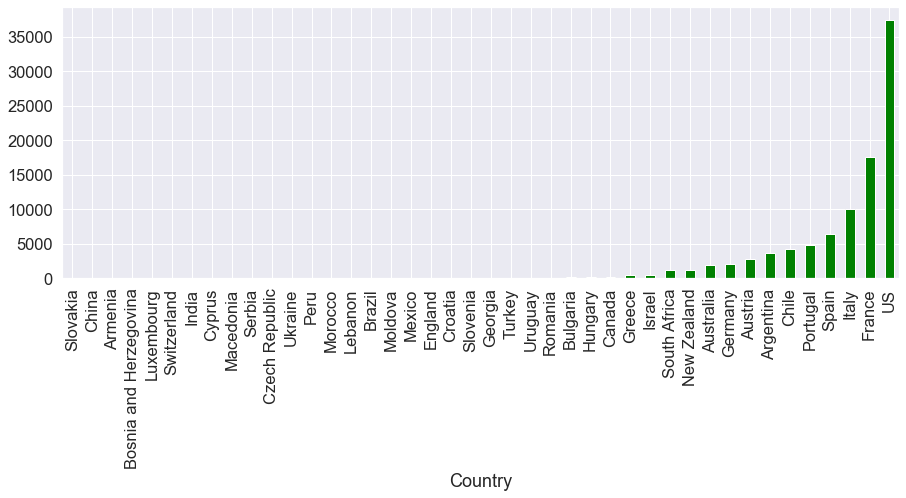

In [23]:
#Plotting in bar chart the amount of reviews per country
dfg['Wine Critic'].plot(kind='bar', facecolor='green', figsize=(15,5))

In [24]:
#Grouping Data by Wine Critic
critic_group = df.groupby(by= 'Wine Critic')

critic_df = critic_group.count()
critic_df

Winery  Name Of Wine  Grape Type  Country  Province  \
Wine Critic                                                               
Alexander Peartree     413           413         413      413       413   
Anna Lee C. Iijima    4369          4369        4369     4369      4369   
Anne Krebiehl MW      3398          3398        3398     3389      3389   
Carrie Dykes           138           138         138      138       138   
Christina Pickard        6             6           6        6         6   
Fiona Adams             27            27          27       27        27   
Jeff Jenssen           491           491         491      469       469   
Jim Gordon            4171          4171        4171     4171      4171   
Joe Czerwinski        5012          5012        5012     5010      5010   
Kerin O’Keefe         9874          9874        9874     9874      9874   
Lauren Buzzeo         1713          1713        1713     1712      1712   
Matt Kettmann         6237          6237        6237     6237      6237   
Michael Schachner    14951         14951       14951    14944     14944   
Mike DeSimone          504           504         504      492       492   
Paul Gregutt          9498          9498        9498     9497      9497   
Roger Voss           20172         20172       20172    20172     20172   
Sean P. Sullivan      4925          4925        4925     4925      4925   
Susan Kostrzewa       1073          1073        1073     1068      1068   
Virginie Boone        9507          9507        9507     9507      9507   

                    Sub-Region  Price  Points  Description  \
Wine Critic                                                  
Alexander Peartree         399    413     413          413   
Anna Lee C. Iijima        2438   4369    4369         4369   
Anne Krebiehl MW          1360   3398    3398         3398   
Carrie Dykes               138    138     138          138   
Christina Pickard            6      6       6            6   
Fiona Adams                 18     27      27           27   
Jeff Jenssen                 0    491     491          491   
Jim Gordon                4165   4171    4171         4171   
Joe Czerwinski            3324   5012    5012         5012   
Kerin O’Keefe             9849   9874    9874         9874   
Lauren Buzzeo              607   1713    1713         1713   
Matt Kettmann             6236   6237    6237         6237   
Michael Schachner        10355  14951   14951        14951   
Mike DeSimone                0    504     504          504   
Paul Gregutt              9453   9498    9498         9498   
Roger Voss               14424  20172   20172        20172   
Sean P. Sullivan          4752   4925    4925         4925   
Susan Kostrzewa            241   1073    1073         1073   
Virginie Boone            9502   9507    9507         9507   

                    Additional Designations  
Wine Critic                                  
Alexander Peartree                      268  
Anna Lee C. Iijima                     3469  
Anne Krebiehl MW                       2894  
Carrie Dykes                             96  
Christina Pickard                         2  
Fiona Adams                              17  
Jeff Jenssen                            383  
Jim Gordon                             2656  
Joe Czerwinski                         3339  
Kerin O’Keefe                          6923  
Lauren Buzzeo                          1151  
Matt Kettmann                          4509  
Michael Schachner                     12113  
Mike DeSimone                           389  
Paul Gregutt                           6460  
Roger Voss                            14368  
Sean P. Sullivan                       3516  
Susan Kostrzewa                         675  
Virginie Boone                         6739

In [25]:
#Counting how many reviews each critic has done
crit_df = critic_df[['Winery']]
crit_df

Winery
Wine Critic               
Alexander Peartree     413
Anna Lee C. Iijima    4369
Anne Krebiehl MW      3398
Carrie Dykes           138
Christina Pickard        6
Fiona Adams             27
Jeff Jenssen           491
Jim Gordon            4171
Joe Czerwinski        5012
Kerin O’Keefe         9874
Lauren Buzzeo         1713
Matt Kettmann         6237
Michael Schachner    14951
Mike DeSimone          504
Paul Gregutt          9498
Roger Voss           20172
Sean P. Sullivan      4925
Susan Kostrzewa       1073
Virginie Boone        9507

In [26]:
#Sorting data in Ascending order
crit_sort = crit_df.sort_values(by= 'Winery')
crit_sort

Winery
Wine Critic               
Christina Pickard        6
Fiona Adams             27
Carrie Dykes           138
Alexander Peartree     413
Jeff Jenssen           491
Mike DeSimone          504
Susan Kostrzewa       1073
Lauren Buzzeo         1713
Anne Krebiehl MW      3398
Jim Gordon            4171
Anna Lee C. Iijima    4369
Sean P. Sullivan      4925
Joe Czerwinski        5012
Matt Kettmann         6237
Paul Gregutt          9498
Virginie Boone        9507
Kerin O’Keefe         9874
Michael Schachner    14951
Roger Voss           20172

<AxesSubplot:xlabel='Wine Critic'>

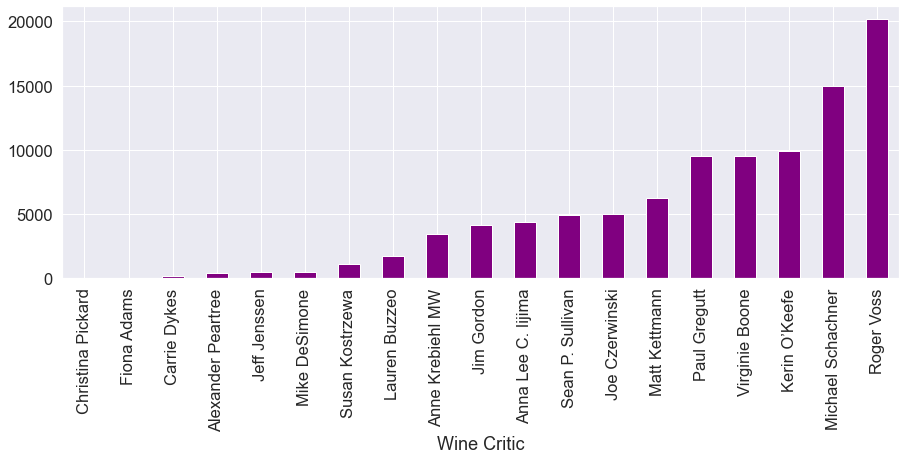

In [27]:
#Plotting bar chart to show how many reviews done per critic
crit_sort['Winery'].plot(kind='bar', facecolor='purple', figsize=(15,5))

In [28]:
#Finding the mean for Price and Points in a Wine Crtic Groupby
crit_mean = critic_group.mean()
crit_mean

Price     Points
Wine Critic                             
Alexander Peartree  29.053269  85.854722
Anna Lee C. Iijima  29.790112  88.405127
Anne Krebiehl MW    31.230135  90.612419
Carrie Dykes        30.753623  86.384058
Christina Pickard   29.333333  87.833333
Fiona Adams         31.148148  86.888889
Jeff Jenssen        22.234216  88.319756
Jim Gordon          26.935507  88.625989
Joe Czerwinski      35.175579  88.539505
Kerin O’Keefe       41.953413  88.908750
Lauren Buzzeo       24.492703  87.564507
Matt Kettmann       38.642136  90.033991
Michael Schachner   25.231155  86.909237
Mike DeSimone       28.164683  89.099206
Paul Gregutt        33.644873  89.087387
Roger Voss          38.649960  88.606137
Sean P. Sullivan    34.085888  88.756751
Susan Kostrzewa     22.908667  86.620690
Virginie Boone      46.621963  89.216998

In [29]:
#Sorting Data by Points in Ascending
crit_points = crit_mean.sort_values(by= 'Points')
crit_points

Price     Points
Wine Critic                             
Alexander Peartree  29.053269  85.854722
Carrie Dykes        30.753623  86.384058
Susan Kostrzewa     22.908667  86.620690
Fiona Adams         31.148148  86.888889
Michael Schachner   25.231155  86.909237
Lauren Buzzeo       24.492703  87.564507
Christina Pickard   29.333333  87.833333
Jeff Jenssen        22.234216  88.319756
Anna Lee C. Iijima  29.790112  88.405127
Joe Czerwinski      35.175579  88.539505
Roger Voss          38.649960  88.606137
Jim Gordon          26.935507  88.625989
Sean P. Sullivan    34.085888  88.756751
Kerin O’Keefe       41.953413  88.908750
Paul Gregutt        33.644873  89.087387
Mike DeSimone       28.164683  89.099206
Virginie Boone      46.621963  89.216998
Matt Kettmann       38.642136  90.033991
Anne Krebiehl MW    31.230135  90.612419

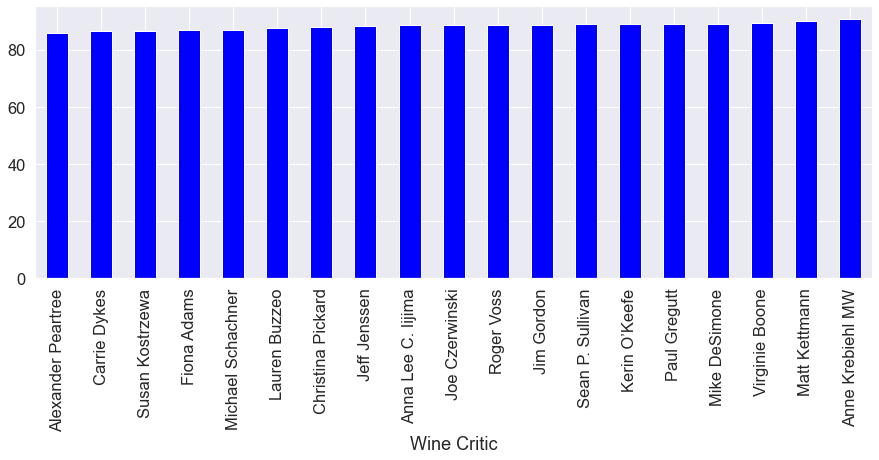

In [30]:
#Plotting mean of points by critic 
crit_points["Points"].plot(kind="bar", facecolor="blue", figsize=(15,5));

In [31]:
#Sorting wine critic data by price in ascending
crit_price = crit_mean.sort_values(by= 'Price')
crit_price

Price     Points
Wine Critic                             
Jeff Jenssen        22.234216  88.319756
Susan Kostrzewa     22.908667  86.620690
Lauren Buzzeo       24.492703  87.564507
Michael Schachner   25.231155  86.909237
Jim Gordon          26.935507  88.625989
Mike DeSimone       28.164683  89.099206
Alexander Peartree  29.053269  85.854722
Christina Pickard   29.333333  87.833333
Anna Lee C. Iijima  29.790112  88.405127
Carrie Dykes        30.753623  86.384058
Fiona Adams         31.148148  86.888889
Anne Krebiehl MW    31.230135  90.612419
Paul Gregutt        33.644873  89.087387
Sean P. Sullivan    34.085888  88.756751
Joe Czerwinski      35.175579  88.539505
Matt Kettmann       38.642136  90.033991
Roger Voss          38.649960  88.606137
Kerin O’Keefe       41.953413  88.908750
Virginie Boone      46.621963  89.216998

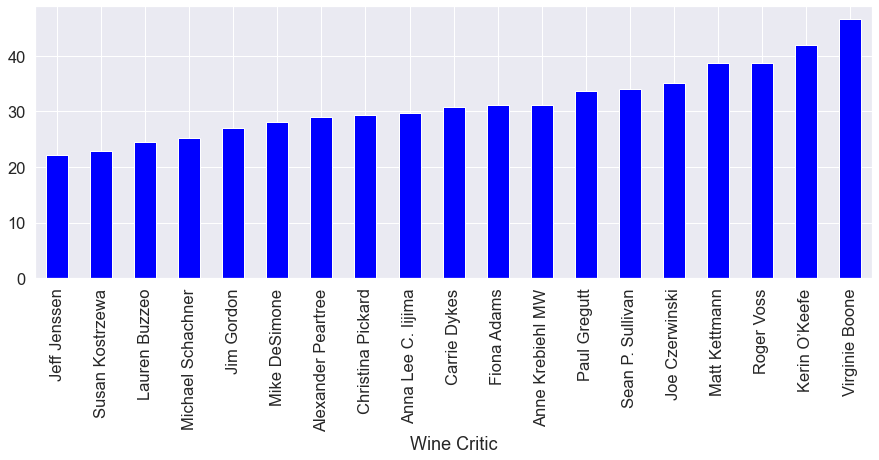

In [32]:
#Plotting bar chart to show avg price of btl reviewed by each critic
crit_price["Price"].plot(kind="bar", facecolor="blue", figsize=(15,5));

In [33]:
#Creating new column calculating the avergae price of the wine per point given by each critic
crit_mean['Average Price per Point ($)'] = round(crit_mean['Price']/crit_mean['Points'],2)
crit_mean

Price     Points  Average Price per Point ($)
Wine Critic                                                          
Alexander Peartree  29.053269  85.854722                         0.34
Anna Lee C. Iijima  29.790112  88.405127                         0.34
Anne Krebiehl MW    31.230135  90.612419                         0.34
Carrie Dykes        30.753623  86.384058                         0.36
Christina Pickard   29.333333  87.833333                         0.33
Fiona Adams         31.148148  86.888889                         0.36
Jeff Jenssen        22.234216  88.319756                         0.25
Jim Gordon          26.935507  88.625989                         0.30
Joe Czerwinski      35.175579  88.539505                         0.40
Kerin O’Keefe       41.953413  88.908750                         0.47
Lauren Buzzeo       24.492703  87.564507                         0.28
Matt Kettmann       38.642136  90.033991                         0.43
Michael Schachner   25.231155  86.909237                         0.29
Mike DeSimone       28.164683  89.099206                         0.32
Paul Gregutt        33.644873  89.087387                         0.38
Roger Voss          38.649960  88.606137                         0.44
Sean P. Sullivan    34.085888  88.756751                         0.38
Susan Kostrzewa     22.908667  86.620690                         0.26
Virginie Boone      46.621963  89.216998                         0.52

In [34]:
#Sorting the new average in ascending
crit_avg = crit_mean.sort_values(by= 'Average Price per Point ($)')
crit_avg

Price     Points  Average Price per Point ($)
Wine Critic                                                          
Jeff Jenssen        22.234216  88.319756                         0.25
Susan Kostrzewa     22.908667  86.620690                         0.26
Lauren Buzzeo       24.492703  87.564507                         0.28
Michael Schachner   25.231155  86.909237                         0.29
Jim Gordon          26.935507  88.625989                         0.30
Mike DeSimone       28.164683  89.099206                         0.32
Christina Pickard   29.333333  87.833333                         0.33
Alexander Peartree  29.053269  85.854722                         0.34
Anna Lee C. Iijima  29.790112  88.405127                         0.34
Anne Krebiehl MW    31.230135  90.612419                         0.34
Carrie Dykes        30.753623  86.384058                         0.36
Fiona Adams         31.148148  86.888889                         0.36
Paul Gregutt        33.644873  89.087387                         0.38
Sean P. Sullivan    34.085888  88.756751                         0.38
Joe Czerwinski      35.175579  88.539505                         0.40
Matt Kettmann       38.642136  90.033991                         0.43
Roger Voss          38.649960  88.606137                         0.44
Kerin O’Keefe       41.953413  88.908750                         0.47
Virginie Boone      46.621963  89.216998                         0.52

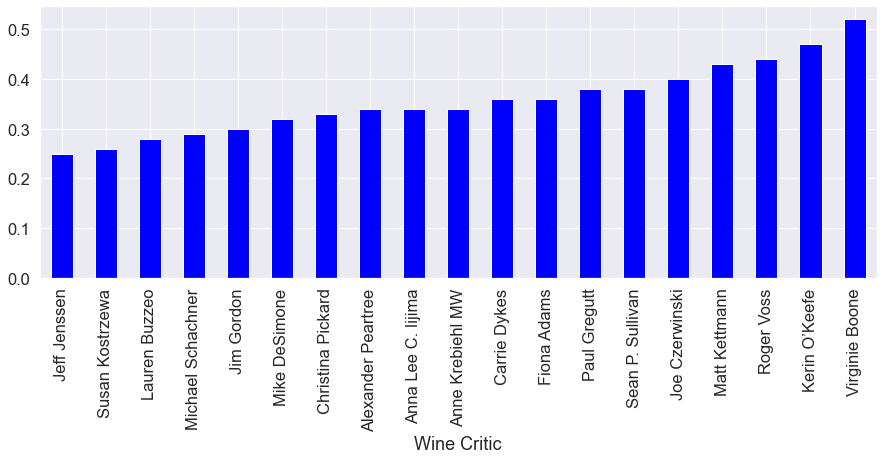

In [35]:
#Plotting bar chart to show the new sorted data
crit_avg["Average Price per Point ($)"].plot(kind="bar", facecolor="blue", figsize=(15,5));

In [53]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



url = f"https://maps.googleapis.com/maps/api/geocode/json?"

params = {'key': g_key}

# location_response = requests.get(url = url, params = params)
# location_data = location_response.json()


# define count of pass throughs
count_one = 0
set_one = 1

In [67]:
country_list =[]
province_list = []

for province in df['Province']:
    province_list.append(province)
    

for country in df['Country']:
    country_list.append(country)

location_list = []
skipped = []

for location in range(len(country_list)):
    print(location)
    try:
        params['address'] = f"{country_list[location]},{province_list[location]}"
        print(params['address'])
        location_response = requests.get(url = url, params = params)
        location_data = location_response.json()
        location = {}
        location['Latitude'] = location_data['results'][0]['geometry']['location']['lat']
        location['Longitude'] = location_data['results'][0]['geometry']['location']['lng']
        location_list.append(location)
        
    except:
        location['Latitude'] = np.nan
        location['Longitude'] = np.nan
        location_list.append(location)
        print('Skipped')
        continue
        
    if location == 10:
        break
        
        



0
Portugal,Douro
1
US,Oregon
2
US,Michigan
3
US,Oregon
4
Spain,Northern Spain
5
Italy,Sicily & Sardinia
6
France,Alsace
7
Germany,Rheinhessen
8
France,Alsace
9
US,California
10
France,Alsace
11
US,California
12
US,California
13
Germany,Mosel
14
Argentina,Other
15
Argentina,Mendoza Province
16
Spain,Northern Spain
17
US,Virginia
18
US,Virginia
19
US,Oregon
20
Italy,Sicily & Sardinia
21
US,California
22
Italy,Sicily & Sardinia
23
US,California
24
Italy,Sicily & Sardinia
25
Italy,Sicily & Sardinia
26
Italy,Sicily & Sardinia
27
US,California
28
US,Oregon
29
Chile,Colchagua Valley
30
US,Oregon
31
France,Beaujolais
32
Chile,Maule Valley
33
France,Beaujolais
34
Chile,Colchagua Valley
35
France,Bordeaux
36
US,California
37
Chile,Maipo Valley
38
US,Washington
39
US,California
40
Italy,Central Italy
41
US,Washington
42
France,Champagne
43
US,California
44
France,Burgundy
45
France,Burgundy
46
US,Washington
47
US,California
48
France,Champagne
49
US,Washington
50
US,California
51
Italy,Southern I

391
US,California
392
US,California
393
US,California
394
US,California
395
US,California
396
US,California
397
US,California
398
Argentina,Mendoza Province
399
US,California
400
US,Washington
401
US,Washington
402
US,California
403
Italy,Piedmont
404
France,Bordeaux
405
France,Rhône Valley
406
France,Bordeaux
407
France,Bordeaux
408
US,New York
409
France,Bordeaux
410
US,California
411
US,Washington
412
US,Washington
413
US,Washington
414
US,California
415
Austria,Kamptal
416
US,Washington
417
Austria,Steiermark
418
Austria,Südsteiermark
419
US,California
420
US,California
421
Austria,Niederösterreich
422
US,Washington
423
Austria,Niederösterreich
424
France,Rhône Valley
425
US,Washington
426
Greece,Crete
427
Austria,Kremstal
428
US,California
429
Mexico,Valle de Guadalupe
430
US,New York
431
Spain,Northern Spain
432
Argentina,Mendoza Province
433
US,Oregon
434
US,Oregon
435
Portugal,Douro
436
US,Oregon
437
Portugal,Vinho Verde
438
Argentina,Mendoza Province
439
US,Idaho
440
US,Idaho


786
Spain,Galicia
787
Argentina,Mendoza Province
788
New Zealand,Hawke's Bay
789
Spain,Northern Spain
790
Austria,Niederösterreich
791
US,Oregon
792
France,Languedoc-Roussillon
793
France,Languedoc-Roussillon
794
Spain,Galicia
795
Spain,Northern Spain
796
Austria,Kremstal
797
Austria,Niederösterreich
798
Chile,Central Valley
799
France,Southwest France
Skipped
800
France,France Other
801
South Africa,Darling
802
Portugal,Port
803
US,California
804
US,California
805
US,Oregon
806
US,Oregon
807
US,Oregon
808
Italy,Piedmont
809
Portugal,Douro
810
Portugal,Port
811
Australia,South Australia
812
US,California
813
France,Loire Valley
814
Italy,Piedmont
815
US,Oregon
816
US,Oregon
817
US,Oregon
818
US,Oregon
819
US,Oregon
820
US,California
821
France,Loire Valley
822
US,California
823
US,Oregon
824
US,California
825
US,Oregon
826
US,California
827
Portugal,Port
828
US,California
829
US,Oregon
830
France,Loire Valley
831
US,Oregon
832
US,California
833
Chile,Maipo Valley
834
US,Washington
835


1164
US,Oregon
1165
Chile,Cachapoal Valley
1166
US,California
1167
Italy,Sicily & Sardinia
1168
Portugal,Alentejano
1169
Portugal,Alentejano
1170
US,California
1171
Spain,Catalonia
1172
Spain,Levante
1173
Spain,Central Spain
1174
US,California
1175
France,Loire Valley
1176
France,Bordeaux
1177
France,Bordeaux
1178
France,Bordeaux
1179
US,California
1180
Spain,Catalonia
1181
Portugal,Lisboa
1182
Portugal,Lisboa
1183
Romania,Jidvei
1184
Italy,Southern Italy
1185
Spain,Catalonia
1186
Chile,Colchagua Valley
1187
Portugal,Lisboa
1188
Chile,Central Valley
1189
Chile,Central Valley
1190
Italy,Veneto
1191
Portugal,Península de Setúbal
1192
Portugal,Alentejo
1193
Italy,Southern Italy
1194
US,California
1195
Portugal,Vinho Verde
1196
US,Washington
1197
France,Bordeaux
1198
France,Bordeaux
1199
US,Washington
1200
France,Bordeaux
1201
France,Bordeaux
1202
France,Bordeaux
1203
France,Bordeaux
1204
France,Bordeaux
1205
France,Bordeaux
1206
France,Bordeaux
1207
France,Bordeaux
1208
France,Bordeaux
12

1532
Argentina,Mendoza Province
1533
France,Alsace
1534
US,Oregon
1535
Portugal,Vinho Espumante
1536
Portugal,Península de Setúbal
1537
France,Alsace
1538
US,California
1539
France,Alsace
1540
France,Alsace
1541
US,California
1542
Argentina,Mendoza Province
1543
France,Alsace
1544
Spain,Northern Spain
1545
France,Alsace
1546
France,Alsace
1547
US,Oregon
1548
Italy,Northeastern Italy
1549
US,Oregon
1550
Chile,Maipo Valley
1551
France,Burgundy
1552
Chile,Maipo Valley
1553
Italy,Northeastern Italy
1554
Italy,Lombardy
1555
Italy,Tuscany
1556
Portugal,Douro
1557
Italy,Veneto
1558
Italy,Northeastern Italy
1559
France,Bordeaux
1560
France,Champagne
1561
Austria,Niederösterreich
1562
Austria,Niederösterreich
1563
Austria,Niederösterreich
1564
France,Champagne
1565
US,Washington
1566
France,Bordeaux
1567
US,Washington
1568
France,Bordeaux
1569
US,Washington
1570
Chile,Casablanca Valley
1571
France,Champagne
1572
Argentina,Mendoza Province
1573
Chile,Maipo Valley
1574
France,Champagne
1575
US,Wa

1912
US,California
1913
US,California
1914
US,California
1915
US,California
1916
US,California
1917
US,California
1918
US,California
1919
US,California
1920
New Zealand,Marlborough
1921
US,California
1922
Italy,Sicily & Sardinia
1923
US,California
1924
US,California
1925
Austria,Burgenland
1926
US,Washington
1927
US,Washington
1928
US,Washington
1929
US,Washington
1930
Italy,Sicily & Sardinia
1931
US,Washington
1932
US,Washington
1933
Italy,Southern Italy
1934
US,Washington
1935
US,California
1936
US,Washington
1937
US,Washington
1938
US,Washington
1939
US,Washington
1940
US,Washington
1941
US,Washington
1942
US,Washington
1943
US,California
1944
France,Bordeaux
1945
France,Bordeaux
1946
Australia,Western Australia
1947
Germany,Pfalz
1948
US,Washington
1949
Italy,Piedmont
1950
Italy,Piedmont
1951
US,Washington
1952
Australia,Western Australia
1953
Israel,Galilee
1954
Germany,Mosel
1955
Australia,Western Australia
1956
Germany,Rheinhessen
1957
Australia,Western Australia
1958
US,Califor

2281
France,Beaujolais
2282
US,Washington
2283
US,Oregon
2284
France,Burgundy
2285
US,Washington
2286
US,Washington
2287
France,Burgundy
2288
France,Burgundy
2289
US,California
2290
France,Burgundy
2291
France,Burgundy
2292
US,Washington
2293
US,California
2294
US,Washington
2295
US,Washington
2296
Australia,South Australia
2297
US,Washington
2298
US,Washington
2299
Australia,Victoria
2300
Chile,Central Valley
2301
France,Alsace
2302
Spain,Central Spain
2303
Australia,South Australia
2304
Chile,Peumo
2305
France,Alsace
2306
Chile,Colchagua Valley
2307
France,Bordeaux
2308
France,Bordeaux
2309
US,Oregon
2310
Argentina,Mendoza Province
2311
Italy,Central Italy
2312
France,Bordeaux
2313
US,California
2314
US,Oregon
2315
US,Oregon
2316
Spain,Northern Spain
2317
Australia,Western Australia
2318
Argentina,Mendoza Province
2319
Austria,Südsteiermark
2320
Austria,Kamptal
2321
Austria,Kamptal
2322
US,Washington
2323
US,Washington
2324
France,Burgundy
2325
US,Washington
2326
Austria,Niederösterr

2664
France,Loire Valley
2665
Israel,Galilee
2666
France,Languedoc-Roussillon
2667
France,Bordeaux
2668
France,Bordeaux
2669
Australia,Australia Other
2670
Australia,Australia Other
2671
US,Washington
2672
France,Bordeaux
2673
Australia,South Australia
2674
US,New York
2675
France,Bordeaux
2676
France,Languedoc-Roussillon
2677
US,Washington
2678
Portugal,Douro
2679
US,Washington
2680
Chile,Colchagua Valley
2681
Portugal,Tejo
2682
Chile,Central Valley
2683
Spain,Northern Spain
2684
France,Languedoc-Roussillon
2685
US,New York
2686
Chile,Maipo Valley
2687
Chile,Central Valley
2688
Portugal,Minho
2689
Chile,Colchagua Valley
2690
US,Oregon
2691
Chile,Leyda Valley
2692
Chile,Central Valley
2693
Chile,Maipo Valley
2694
Chile,Maule Valley
2695
US,Oregon
2696
Chile,Central Valley
2697
Portugal,Vinho Verde
2698
Chile,Maule Valley
2699
France,Bordeaux
2700
Austria,Wachau
2701
Austria,Wachau
2702
US,Washington
2703
Austria,Wachau
2704
US,Washington
2705
Austria,Wachau
2706
Argentina,Mendoza Provi

3024
US,California
3025
US,California
3026
US,California
3027
US,California
3028
Uruguay,Canelones
3029
US,California
3030
US,Oregon
3031
Portugal,Bairrada
3032
Portugal,Douro
3033
Chile,Colchagua Valley
3034
US,California
3035
US,California
3036
US,California
3037
US,California
3038
Germany,Mosel
3039
Germany,Mosel
3040
US,California
3041
US,California
3042
US,California
3043
Germany,Mosel
3044
France,Champagne
3045
France,Champagne
3046
US,California
3047
US,California
3048
Italy,Piedmont
3049
Italy,Lombardy
3050
France,Champagne
3051
France,Champagne
3052
France,Champagne
3053
US,California
3054
France,Bordeaux
3055
US,California
3056
US,Oregon
3057
Portugal,Tejo
3058
France,Champagne
3059
Portugal,Port
3060
Australia,South Australia
3061
France,Champagne
3062
Portugal,Port
3063
US,Oregon
3064
France,Burgundy
3065
France,Burgundy
3066
US,California
3067
Italy,Southern Italy
3068
Portugal,Lisboa
3069
US,California
3070
US,Oregon
3071
US,California
3072
US,California
3073
US,Washingto

3422
France,Bordeaux
3423
Spain,Catalonia
3424
Portugal,Lisboa
3425
Portugal,Douro
3426
Portugal,Douro
3427
US,Oregon
3428
Portugal,Lisboa
3429
Portugal,Bairrada
3430
Spain,Galicia
3431
US,New York
3432
US,New York
3433
Spain,Levante
3434
France,Rhône Valley
3435
France,Rhône Valley
3436
Spain,Northern Spain
3437
Spain,Northern Spain
3438
Spain,Catalonia
3439
US,New York
3440
US,New York
3441
Chile,Lontué Valley
3442
Italy,Piedmont
3443
US,Oregon
3444
US,California
3445
US,California
3446
US,California
3447
New Zealand,Hawke's Bay
3448
Argentina,Mendoza Province
3449
Italy,Piedmont
3450
Italy,Piedmont
3451
Italy,Piedmont
3452
US,Oregon
3453
US,California
3454
Italy,Piedmont
3455
Italy,Piedmont
3456
France,Loire Valley
3457
Argentina,Other
3458
US,California
3459
France,Loire Valley
3460
US,Oregon
3461
US,Oregon
3462
Argentina,Mendoza Province
3463
US,California
3464
US,California
3465
US,California
3466
Portugal,Dão
3467
Portugal,Bairrada
3468
France,Loire Valley
3469
France,Loire Vall

3801
France,Beaujolais
3802
Austria,Kremstal
3803
US,California
3804
US,Washington
3805
US,California
3806
Italy,Tuscany
3807
US,New York
3808
US,California
3809
Chile,Colchagua Valley
3810
Austria,Wagram
3811
US,California
3812
US,California
3813
Austria,Niederösterreich
3814
US,Washington
3815
France,Bordeaux
3816
France,Bordeaux
3817
US,Oregon
3818
Spain,Northern Spain
3819
Australia,South Australia
3820
Australia,South Australia
3821
France,Alsace
3822
US,Oregon
3823
US,Oregon
3824
Spain,Catalonia
3825
US,Oregon
3826
Spain,Northern Spain
3827
US,New York
3828
US,Oregon
3829
Spain,Northern Spain
3830
US,Oregon
3831
Austria,Wachau
3832
New Zealand,Kumeu
3833
US,Oregon
3834
Italy,Tuscany
3835
Italy,Tuscany
3836
Italy,Tuscany
3837
Argentina,Mendoza Province
3838
France,Loire Valley
3839
France,France Other
3840
Italy,Tuscany
3841
Argentina,Mendoza Province
3842
France,Loire Valley
3843
Germany,Mosel
3844
Italy,Tuscany
3845
Italy,Tuscany
3846
Italy,Tuscany
3847
Portugal,Trás-os-Montes
3

4171
Austria,Thermenregion
4172
US,Idaho
4173
US,California
4174
US,California
4175
US,Washington
4176
US,Washington
4177
US,Washington
4178
Austria,Südoststeiermark
4179
Austria,Niederösterreich
4180
France,Champagne
4181
France,Bordeaux
4182
France,Bordeaux
4183
Italy,Tuscany
4184
US,Washington
4185
US,Washington
4186
US,Washington
4187
US,Washington
4188
Austria,Thermenregion
4189
Italy,Piedmont
4190
US,Washington
4191
US,Washington
4192
US,Washington
4193
Austria,Wachau
4194
Argentina,Mendoza Province
4195
Austria,Wachau
4196
US,Washington
4197
Italy,Tuscany
4198
Italy,Tuscany
4199
France,Bordeaux
4200
France,Bordeaux
4201
Italy,Northeastern Italy
4202
US,California
4203
US,California
4204
US,California
4205
Austria,Niederösterreich
4206
Italy,Piedmont
4207
US,California
4208
US,California
4209
US,California
4210
US,Washington
4211
France,Provence
4212
US,California
4213
US,California
4214
France,Provence
4215
France,Provence
4216
France,Provence
4217
Italy,Piedmont
4218
US,Califor

4556
US,California
4557
Portugal,Alentejo
4558
Italy,Piedmont
4559
US,California
4560
France,Burgundy
4561
France,Loire Valley
4562
US,California
4563
Italy,Piedmont
4564
US,California
4565
US,California
4566
US,Oregon
4567
Italy,Piedmont
4568
US,California
4569
US,California
4570
France,Provence
4571
France,Bordeaux
4572
New Zealand,Marlborough
4573
US,Oregon
4574
New Zealand,Marlborough
4575
Australia,Victoria
4576
Chile,Maipo Valley
4577
France,Rhône Valley
4578
France,Bordeaux
4579
France,Bordeaux
4580
US,Oregon
4581
France,Bordeaux
4582
US,Oregon
4583
France,Provence
4584
France,Champagne
4585
US,California
4586
US,Washington
4587
US,New York
4588
Spain,Northern Spain
4589
Italy,Central Italy
4590
US,New York
4591
US,California
4592
France,Beaujolais
4593
France,Languedoc-Roussillon
4594
France,Languedoc-Roussillon
4595
US,California
4596
Spain,Galicia
4597
Spain,Northern Spain
4598
US,California
4599
Spain,Northern Spain
4600
Italy,Central Italy
4601
US,California
4602
US,New Yor

4934
France,Alsace
4935
Italy,Piedmont
4936
US,California
4937
US,California
4938
US,California
4939
Italy,Piedmont
4940
US,California
4941
France,Alsace
4942
US,California
4943
US,Washington
4944
US,California
4945
Italy,Piedmont
4946
US,California
4947
France,Alsace
4948
Italy,Piedmont
4949
US,California
4950
Italy,Piedmont
4951
France,Alsace
4952
Italy,Tuscany
4953
US,California
4954
Spain,Levante
4955
US,California
4956
England,England
4957
US,California
4958
US,Washington
4959
US,California
4960
US,California
4961
Spain,Levante
4962
US,Washington
4963
US,California
4964
Chile,Maule Valley
4965
France,Rhône Valley
4966
France,Bordeaux
4967
US,Washington
4968
Italy,Piedmont
4969
France,Rhône Valley
4970
France,Loire Valley
4971
Italy,Tuscany
4972
US,Washington
4973
US,New York
4974
US,California
4975
US,Washington
4976
US,California
4977
US,California
4978
US,Washington
4979
US,California
4980
Spain,Levante
4981
France,Burgundy
4982
US,Washington
4983
France,Burgundy
4984
France,Bur

5299
Spain,Northern Spain
5300
US,New York
5301
Italy,Sicily & Sardinia
5302
US,New York
5303
South Africa,Stellenbosch
5304
South Africa,Stellenbosch
5305
South Africa,Paarl
5306
Spain,Catalonia
5307
France,Provence
5308
France,Alsace
5309
US,Washington
5310
US,Washington
5311
US,New York
5312
New Zealand,Marlborough
5313
US,Washington
5314
US,Oregon
5315
New Zealand,Marlborough
5316
Portugal,Port
5317
France,Loire Valley
5318
Portugal,Lisboa
5319
France,Loire Valley
5320
France,Loire Valley
5321
France,Loire Valley
5322
US,Oregon
5323
US,Oregon
5324
Argentina,Mendoza Province
5325
Portugal,Tejo
5326
Germany,Mosel
5327
US,Oregon
5328
US,Oregon
5329
France,Loire Valley
5330
France,France Other
5331
US,California
5332
Italy,Sicily & Sardinia
5333
Italy,Piedmont
5334
Italy,Piedmont
5335
Portugal,Port
5336
US,California
5337
US,Oregon
5338
Italy,Piedmont
5339
US,Oregon
5340
France,France Other
5341
US,Oregon
5342
US,California
5343
US,Washington
5344
Spain,Central Spain
5345
Spain,Norther

5676
US,California
5677
Portugal,Bairrada
5678
US,Washington
5679
US,Washington
5680
France,Bordeaux
5681
France,Bordeaux
5682
France,Bordeaux
5683
France,Bordeaux
5684
France,Bordeaux
5685
France,Bordeaux
5686
US,California
5687
France,Beaujolais
5688
Portugal,Douro
5689
Portugal,Douro
5690
US,California
5691
US,Oregon
5692
US,Washington
5693
Germany,Mosel
5694
US,California
5695
Australia,Victoria
5696
France,Beaujolais
5697
US,Oregon
5698
France,Bordeaux
5699
Italy,Lombardy
5700
Portugal,Bairrada
5701
US,Washington
5702
US,California
5703
US,California
5704
Austria,Burgenland
5705
US,California
5706
US,California
5707
US,California
5708
Austria,Traisental
5709
Austria,Traisental
5710
US,Washington
5711
US,California
5712
US,Washington
5713
Italy,Piedmont
5714
US,California
5715
US,Washington
5716
US,Washington
5717
US,California
5718
US,California
5719
US,California
5720
US,Washington
5721
Austria,Thermenregion
5722
US,Washington
5723
Austria,Thermenregion
5724
US,California
5725
Au

6050
Bulgaria,Thracian Valley
6051
Bulgaria,Thracian Valley
6052
US,California
6053
US,Washington
6054
US,Washington
6055
US,Oregon
6056
US,Washington
6057
Chile,Santa Cruz
6058
Austria,Wachau
6059
Chile,Aconcagua Valley
6060
Chile,Aconcagua Valley
6061
France,Champagne
6062
New Zealand,Marlborough
6063
France,Bordeaux
6064
Austria,Wachau
6065
Austria,Wachau
6066
France,Bordeaux
6067
France,Bordeaux
6068
France,Loire Valley
6069
Portugal,Alentejano
6070
US,Oregon
6071
Germany,Mosel
6072
Germany,Rheinhessen
6073
Italy,Tuscany
6074
US,Oregon
6075
Portugal,Lisboa
6076
US,California
6077
Italy,Lombardy
6078
France,Champagne
6079
Canada,Ontario
6080
US,Oregon
6081
Chile,Maipo Valley
6082
Canada,Ontario
6083
Italy,Veneto
6084
Chile,Peumo
6085
US,New York
6086
South Africa,Coastal Region
Skipped
6087
South Africa,Western Cape
6088
US,New York
6089
South Africa,Simonsberg-Stellenbosch
6090
US,California
6091
US,Washington
6092
France,Alsace
6093
France,Provence
6094
Italy,Central Italy
6095
US

6432
US,California
6433
US,New York
6434
US,California
6435
Italy,Piedmont
6436
Austria,Niederösterreich
6437
US,Washington
6438
US,California
6439
Spain,Catalonia
6440
Spain,Northern Spain
6441
US,Washington
6442
US,California
6443
US,California
6444
US,New York
6445
Chile,San Antonio
6446
France,Bordeaux
6447
France,Bordeaux
6448
France,Languedoc-Roussillon
6449
US,Washington
6450
South Africa,Stellenbosch
6451
Germany,Baden
6452
New Zealand,Central Otago
6453
Chile,Casablanca Valley
6454
Chile,Casablanca Valley
6455
US,California
6456
US,California
6457
US,New York
6458
US,New York
6459
US,New York
6460
US,Washington
6461
US,California
6462
US,New York
6463
Italy,Tuscany
6464
Italy,Piedmont
6465
Italy,Tuscany
6466
France,Southwest France
Skipped
6467
France,France Other
6468
France,Southwest France
Skipped
6469
France,Rhône Valley
6470
US,California
6471
France,Southwest France
Skipped
6472
France,Rhône Valley
6473
France,France Other
6474
US,New York
6475
Chile,Aconcagua Valley
647

6814
Chile,Elqui Valley
6815
Chile,Colchagua Valley
6816
Portugal,Tejo
6817
France,Languedoc-Roussillon
6818
Chile,Colchagua Valley
6819
US,Washington
6820
Chile,Colchagua Valley
6821
Chile,Rapel Valley
6822
France,Languedoc-Roussillon
6823
France,Languedoc-Roussillon
6824
Chile,Maule Valley
6825
Spain,Northern Spain
6826
South Africa,Robertson
6827
Spain,Northern Spain
6828
France,Bordeaux
6829
Spain,Andalucia
6830
Germany,Mosel-Saar-Ruwer
6831
South Africa,Stellenbosch
6832
Spain,Northern Spain
6833
Australia,South Australia
6834
France,Bordeaux
6835
US,California
6836
Australia,South Australia
6837
US,California
6838
US,California
6839
France,Alsace
6840
US,California
6841
US,California
6842
US,California
6843
Italy,Tuscany
6844
US,Oregon
6845
Italy,Tuscany
6846
Italy,Tuscany
6847
US,California
6848
France,Alsace
6849
US,California
6850
Australia,South Australia
6851
US,California
6852
US,California
6853
US,California
6854
US,Oregon
6855
US,Oregon
6856
US,California
6857
US,Oregon
6

7182
US,California
7183
Italy,Piedmont
7184
Spain,Northern Spain
7185
Italy,Piedmont
7186
Italy,Piedmont
7187
US,California
7188
Portugal,Douro
7189
US,Oregon
7190
US,Oregon
7191
US,Oregon
7192
Italy,Piedmont
7193
US,California
7194
US,Oregon
7195
US,California
7196
Portugal,Moscatel de Setúbal
7197
Portugal,Península de Setúbal
7198
Spain,Northern Spain
7199
Portugal,Alentejano
7200
Spain,Northern Spain
7201
Israel,Galilee
7202
Israel,Judean Hills
7203
Italy,Piedmont
7204
Italy,Piedmont
7205
Germany,Mosel
7206
US,California
7207
US,California
7208
US,Oregon
7209
Greece,Macedonia
7210
Spain,Northern Spain
7211
Australia,South Australia
7212
Argentina,Mendoza Province
7213
Argentina,Mendoza Province
7214
Argentina,Mendoza Province
7215
Argentina,Mendoza Province
7216
Argentina,Mendoza Province
7217
US,Washington
7218
Spain,Central Spain
7219
Spain,Northern Spain
7220
Spain,Central Spain
7221
US,Washington
7222
Portugal,Douro
7223
Spain,Northern Spain
7224
Spain,Central Spain
7225
Portug

7550
France,Rhône Valley
7551
South Africa,Western Cape
7552
US,California
7553
France,Alsace
7554
US,Washington
7555
South Africa,Swartland
7556
South Africa,Swartland
7557
Australia,South Australia
7558
US,California
7559
Argentina,Mendoza Province
7560
Argentina,Other
7561
US,California
7562
Argentina,Mendoza Province
7563
US,California
7564
Israel,Galilee
7565
US,New York
7566
US,Washington
7567
US,Washington
7568
US,Washington
7569
US,California
7570
Portugal,Alentejano
7571
Chile,Casablanca Valley
7572
Spain,Northern Spain
7573
US,New York
7574
New Zealand,Marlborough
7575
US,California
7576
US,Washington
7577
Spain,Central Spain
7578
Spain,Catalonia
7579
US,California
7580
Portugal,Palmela
7581
Portugal,Douro
7582
US,Oregon
7583
Portugal,Alentejano
7584
Portugal,Alentejano
7585
Italy,Piedmont
7586
Argentina,Mendoza Province
7587
Germany,Rheinhessen
7588
Israel,Galil
7589
Argentina,Mendoza Province
7590
Spain,Northern Spain
7591
Germany,Mosel
7592
Portugal,Douro
7593
US,Californi

7916
US,California
7917
Argentina,Mendoza Province
7918
US,California
7919
Argentina,Mendoza Province
7920
Austria,Vienna
7921
US,California
7922
Spain,Northern Spain
7923
US,California
7924
US,California
7925
US,Washington
7926
US,Washington
7927
US,California
7928
France,Provence
7929
France,Provence
7930
US,California
7931
Italy,Lombardy
7932
US,Washington
7933
France,France Other
7934
Israel,Galilee
7935
New Zealand,Marlborough
7936
US,Washington
7937
Israel,Galilee
7938
US,New York
7939
US,Washington
7940
US,Washington
7941
Spain,Northern Spain
7942
US,California
7943
France,Beaujolais
7944
US,Washington
7945
Spain,Central Spain
7946
France,Bordeaux
7947
Argentina,Other
7948
France,Bordeaux
7949
France,Bordeaux
7950
France,Bordeaux
7951
Spain,Galicia
7952
Spain,Catalonia
7953
Argentina,Other
7954
US,Washington
7955
Spain,Catalonia
7956
US,Washington
7957
Argentina,Mendoza Province
7958
US,Washington
7959
Italy,Veneto
7960
France,Loire Valley
7961
US,Washington
7962
France,Loire Va

8290
US,California
8291
US,California
8292
US,California
8293
France,Burgundy
8294
France,Burgundy
8295
France,Burgundy
8296
France,Burgundy
8297
US,California
8298
US,Washington
8299
US,Washington
8300
Italy,Northeastern Italy
8301
France,Southwest France
Skipped
8302
US,Washington
8303
France,Burgundy
8304
Italy,Northeastern Italy
8305
Germany,Rheinhessen
8306
US,New York
8307
Bulgaria,Thracian Valley
8308
Italy,Northeastern Italy
8309
US,California
8310
Italy,Tuscany
8311
France,Southwest France
Skipped
8312
France,Burgundy
8313
nan,nan
8314
US,California
8315
Hungary,Tokaj
8316
France,Rhône Valley
8317
Germany,Mosel
8318
Germany,Mosel
8319
Israel,Judean Hills
8320
Italy,Northeastern Italy
8321
Argentina,Mendoza Province
8322
Germany,Mosel
8323
US,California
8324
US,Washington
8325
Argentina,Mendoza Province
8326
Argentina,Mendoza Province
8327
US,Virginia
8328
US,Washington
8329
Argentina,Other
8330
US,New Mexico
8331
US,Washington
8332
US,Washington
8333
US,Idaho
8334
Italy,Sicily

8673
Chile,Rapel Valley
8674
France,France Other
8675
France,France Other
8676
US,California
8677
Chile,Central Valley
8678
Chile,Loncomilla Valley
8679
US,California
8680
France,Champagne
8681
Germany,Württemberg
8682
Chile,Puente Alto
8683
Italy,Piedmont
8684
US,California
8685
France,Champagne
8686
France,Champagne
8687
Italy,Tuscany
8688
Chile,Colchagua Valley
8689
Chile,Leyda Valley
8690
US,Idaho
8691
US,California
8692
US,California
8693
France,Burgundy
8694
France,Southwest France
Skipped
8695
Italy,Tuscany
8696
Chile,Maule Valley
8697
France,Rhône Valley
8698
Italy,Tuscany
8699
France,Southwest France
Skipped
8700
Spain,Levante
8701
France,Southwest France
Skipped
8702
Spain,Galicia
8703
Germany,Mosel
8704
Germany,Württemberg
8705
Spain,Northern Spain
8706
France,Southwest France
Skipped
8707
France,Southwest France
Skipped
8708
Spain,Levante
8709
Spain,Northern Spain
8710
France,Rhône Valley
8711
Spain,Catalonia
8712
Portugal,Alentejano
8713
US,California
8714
France,Rhône Val

9044
France,Loire Valley
9045
France,Loire Valley
9046
France,Burgundy
9047
France,Loire Valley
9048
US,Washington
9049
France,Loire Valley
9050
US,New York
9051
France,Loire Valley
9052
Spain,Andalucia
9053
US,Washington
9054
US,California
9055
US,California
9056
Italy,Tuscany
9057
Spain,Northern Spain
9058
Romania,Dealu Mare
9059
France,Bordeaux
9060
Chile,Central Valley
9061
Chile,Colchagua Valley
9062
US,Washington
9063
Argentina,Other
9064
France,Bordeaux
9065
Greece,Pageon
9066
Chile,Maule Valley
9067
Italy,Tuscany
9068
US,California
9069
US,New York
9070
US,New York
9071
France,Provence
9072
Austria,Niederösterreich
9073
US,California
9074
Italy,Tuscany
9075
US,Washington
9076
France,Provence
9077
Italy,Tuscany
9078
France,Provence
9079
France,Provence
9080
France,Provence
9081
South Africa,Robertson
9082
US,Colorado
9083
US,Virginia
9084
New Zealand,Wairarapa
9085
New Zealand,Central Otago
9086
US,California
9087
Argentina,Mendoza Province
9088
US,Virginia
9089
US,California
90

9410
Italy,Northeastern Italy
9411
Chile,Maule Valley
9412
US,California
9413
Italy,Northeastern Italy
9414
Portugal,Tejo
9415
Portugal,Douro
9416
US,Washington
9417
Chile,Casablanca Valley
9418
Australia,Australia Other
9419
US,California
9420
US,Washington
9421
US,California
9422
France,Bordeaux
9423
France,Bordeaux
9424
Chile,Central Valley
9425
Chile,Elqui Valley
9426
Chile,Cachapoal Valley
9427
US,California
9428
France,Languedoc-Roussillon
9429
US,California
9430
Portugal,Douro
9431
Spain,Central Spain
9432
Portugal,Vinho Verde
9433
France,Languedoc-Roussillon
9434
Australia,Australia Other
9435
New Zealand,Central Otago
9436
Spain,Northern Spain
9437
New Zealand,Martinborough
9438
New Zealand,Marlborough
9439
US,Oregon
9440
Spain,Northern Spain
9441
France,Bordeaux
9442
France,Bordeaux
9443
US,California
9444
Argentina,Mendoza Province
9445
Italy,Tuscany
9446
US,California
9447
US,Colorado
9448
US,New York
9449
US,New York
9450
US,California
9451
Austria,Niederösterreich
9452
US

9782
Chile,Colchagua Valley
9783
US,Washington
9784
France,Bordeaux
9785
Israel,Galilee
9786
Austria,Kremstal
9787
Austria,Kremstal
9788
US,Washington
9789
Germany,Mosel
9790
US,California
9791
Italy,Piedmont
9792
US,Washington
9793
US,New York
9794
US,New York
9795
France,Bordeaux
9796
France,Bordeaux
9797
France,Rhône Valley
9798
Italy,Tuscany
9799
Italy,Tuscany
9800
Italy,Tuscany
9801
US,Washington
9802
France,Bordeaux
9803
Israel,Galilee
9804
Italy,Tuscany
9805
US,New York
9806
Italy,Tuscany
9807
Italy,Tuscany
9808
US,Washington
9809
US,Washington
9810
Italy,Tuscany
9811
US,California
9812
Italy,Tuscany
9813
US,California
9814
US,Washington
9815
Austria,Mittelburgenland
9816
Austria,Südsteiermark
9817
New Zealand,Central Otago
9818
US,Washington
9819
US,Washington
9820
Spain,Northern Spain
9821
Italy,Tuscany
9822
US,California
9823
Italy,Tuscany
9824
US,California
9825
US,California
9826
US,California
9827
Chile,Colchagua Valley
9828
US,California
9829
France,Rhône Valley
9830
US,C

10143
US,Washington
10144
US,California
10145
Italy,Piedmont
10146
US,Washington
10147
US,California
10148
France,Loire Valley
10149
US,California
10150
Italy,Southern Italy
10151
Chile,Maipo Valley
10152
US,California
10153
Australia,Australia Other
10154
US,California
10155
Italy,Southern Italy
10156
Chile,Curicó Valley
10157
Chile,Aconcagua Costa
10158
Chile,Malleco
10159
Chile,Central Valley
10160
US,California
10161
Chile,Central Valley
10162
Chile,San Antonio
10163
Australia,Australia Other
10164
Chile,Colchagua Valley
10165
Canada,British Columbia
10166
Italy,Southern Italy
10167
Chile,Maule Valley
10168
Chile,Leyda Valley
10169
Chile,Casablanca Valley
10170
Chile,Rapel Valley
10171
Chile,Colchagua Valley
10172
Chile,Central Valley
10173
Chile,Colchagua Valley
10174
Chile,Rapel Valley
10175
Chile,Chile
10176
Chile,Casablanca Valley
10177
Austria,Wagram
10178
US,New York
10179
US,Washington
10180
US,Washington
10181
US,Washington
10182
France,Bordeaux
10183
France,Bordeaux
10184


10500
US,Oregon
10501
Chile,Aconcagua Valley
10502
Austria,Kamptal
10503
Austria,Österreichischer Sekt
10504
France,Beaujolais
10505
US,Oregon
10506
Chile,Casablanca Valley
10507
US,California
10508
France,Beaujolais
10509
Chile,Rapel Valley
10510
France,Southwest France
Skipped
10511
France,Bordeaux
10512
France,Southwest France
Skipped
10513
US,Oregon
10514
US,Oregon
10515
US,Oregon
10516
US,California
10517
US,Oregon
10518
US,California
10519
France,Bordeaux
10520
Chile,Colchagua Valley
10521
Chile,Maule Valley
10522
Chile,Maipo Valley
10523
Chile,Maipo Valley
10524
US,California
10525
France,Bordeaux
10526
Chile,Central Valley
10527
Chile,Limarí Valley
10528
Chile,Choapa Valley
10529
France,Southwest France
Skipped
10530
France,Beaujolais
10531
France,Southwest France
Skipped
10532
France,Beaujolais
10533
France,Southwest France
Skipped
10534
Spain,Catalonia
10535
US,Oregon
10536
France,Bordeaux
10537
France,Bordeaux
10538
France,Bordeaux
10539
Argentina,Mendoza Province
10540
Spai

10857
US,Oregon
10858
Italy,Southern Italy
10859
US,Oregon
10860
Spain,Galicia
10861
France,Champagne
10862
Germany,Germany
10863
US,Oregon
10864
Australia,South Australia
10865
Chile,Curicó Valley
10866
US,California
10867
US,California
10868
US,Washington
10869
Spain,Spain Other
10870
Uruguay,Juanico
10871
Uruguay,San Jose
10872
Spain,Northern Spain
10873
Brazil,Serra Gaúcha
10874
Peru,Ica
10875
Spain,Northern Spain
10876
Peru,Ica
10877
Spain,Northern Spain
10878
Brazil,Vale dos Vinhedos
10879
Spain,Northern Spain
10880
Brazil,Vale dos Vinhedos
10881
Italy,Northeastern Italy
10882
France,Alsace
10883
US,California
10884
US,Oregon
10885
Portugal,Lisboa
10886
Georgia,Kakheti
10887
France,Alsace
10888
Portugal,Dão
10889
Portugal,Minho
10890
US,Oregon
10891
France,Alsace
10892
US,Oregon
10893
US,Washington
10894
US,Oregon
10895
US,Oregon
10896
US,Washington
10897
Georgia,Georgia
10898
US,California
10899
US,California
10900
US,Oregon
10901
Chile,Peumo
10902
Spain,Catalonia
10903
Turkey,A

11213
Italy,Tuscany
11214
US,California
11215
France,Southwest France
Skipped
11216
US,California
11217
US,California
11218
France,Southwest France
Skipped
11219
US,California
11220
US,California
11221
US,California
11222
US,California
11223
US,California
11224
France,Southwest France
Skipped
11225
Italy,Tuscany
11226
Australia,South Australia
11227
Germany,Mittelrhein
11228
Germany,Rheingau
11229
US,California
11230
US,California
11231
Australia,Western Australia
11232
France,Southwest France
Skipped
11233
US,Oregon
11234
Portugal,Alentejo
11235
France,Burgundy
11236
US,New York
11237
US,New York
11238
Spain,Central Spain
11239
US,Washington
11240
US,California
11241
France,Burgundy
11242
Spain,Northern Spain
11243
US,New York
11244
Spain,Levante
11245
Spain,Northern Spain
11246
Portugal,Douro
11247
Portugal,Douro
11248
Portugal,Douro
11249
Italy,Piedmont
11250
France,Champagne
11251
US,California
11252
France,Alsace
11253
US,Oregon
11254
US,California
11255
US,Oregon
11256
France,Cha

11581
US,Washington
11582
Italy,Veneto
11583
US,Washington
11584
US,Washington
11585
Italy,Veneto
11586
France,Southwest France
Skipped
11587
France,Languedoc-Roussillon
11588
Portugal,Port
11589
US,Washington
11590
US,Washington
11591
US,Washington
11592
US,Washington
11593
Italy,Veneto
11594
US,Washington
11595
Argentina,Mendoza Province
11596
US,Washington
11597
Italy,Veneto
11598
Italy,Veneto
11599
France,Champagne
11600
France,Champagne
11601
US,California
11602
France,Champagne
11603
France,Champagne
11604
France,Champagne
11605
US,California
11606
France,Alsace
11607
France,Alsace
11608
France,Alsace
11609
France,Alsace
11610
US,California
11611
France,Alsace
11612
US,California
11613
France,Champagne
11614
France,Alsace
11615
France,Champagne
11616
France,Alsace
11617
France,Alsace
11618
US,California
11619
US,California
11620
US,California
11621
France,Alsace
11622
France,Alsace
11623
US,California
11624
Spain,Northern Spain
11625
US,California
11626
France,Alsace
11627
France

11955
US,California
11956
US,California
11957
US,Oregon
11958
Italy,Italy Other
11959
US,California
11960
US,California
11961
US,California
11962
France,Bordeaux
11963
Italy,Italy Other
11964
Portugal,Península de Setúbal
11965
Spain,Northern Spain
11966
Spain,Northern Spain
11967
Portugal,Douro
11968
Portugal,Bairrada
11969
Argentina,Mendoza Province
11970
Argentina,Mendoza Province
11971
Spain,Northern Spain
11972
Argentina,Mendoza Province
11973
Spain,Northern Spain
11974
Argentina,Mendoza Province
11975
South Africa,Western Cape
11976
US,California
11977
France,Bordeaux
11978
Argentina,Mendoza Province
11979
US,Washington
11980
Argentina,Other
11981
Portugal,Douro
11982
France,Bordeaux
11983
Portugal,Lisboa
11984
France,Bordeaux
11985
France,Bordeaux
11986
US,Washington
11987
US,Washington
11988
France,Loire Valley
11989
US,Washington
11990
France,Champagne
11991
France,Champagne
11992
France,Loire Valley
11993
Chile,Aconcagua Valley
11994
Chile,Maule Valley
11995
US,Washington
119

12313
France,Loire Valley
12314
Portugal,Port
12315
Italy,Piedmont
12316
US,Oregon
12317
US,Oregon
12318
Portugal,Port
12319
Australia,South Australia
12320
Portugal,Alentejano
12321
Portugal,Port
12322
US,California
12323
US,Iowa
12324
US,New York
12325
France,Bordeaux
12326
Spain,Northern Spain
12327
France,Bordeaux
12328
Spain,Central Spain
12329
France,Bordeaux
12330
US,California
12331
Spain,Central Spain
12332
Chile,Limarí Valley
12333
France,Bordeaux
12334
Chile,Casablanca Valley
12335
Spain,Catalonia
12336
US,New York
12337
US,New York
12338
France,Bordeaux
12339
France,Champagne
12340
US,Washington
12341
Spain,Northern Spain
12342
US,Washington
12343
US,Washington
12344
US,Washington
12345
US,Washington
12346
US,Washington
12347
Spain,Catalonia
12348
US,Washington
12349
US,Washington
12350
US,Washington
12351
Austria,Wachau
12352
US,Washington
12353
US,Washington
12354
US,Washington
12355
US,Washington
12356
Spain,Northern Spain
12357
US,California
12358
Italy,Tuscany
12359
It

12671
Portugal,Alentejano
12672
US,Oregon
12673
Argentina,Mendoza Province
12674
Italy,Lombardy
12675
France,Champagne
12676
Argentina,Mendoza Province
12677
Italy,Veneto
12678
Canada,Ontario
12679
US,California
12680
US,California
12681
US,California
12682
Australia,Victoria
12683
US,California
12684
France,Alsace
12685
US,California
12686
Spain,Levante
12687
US,California
12688
Portugal,Douro
12689
France,Champagne
12690
Spain,Catalonia
12691
US,California
12692
US,California
12693
US,California
12694
US,California
12695
France,Champagne
12696
Portugal,Port
12697
France,Alsace
12698
Spain,Northern Spain
12699
US,California
12700
US,California
12701
US,California
12702
US,Washington
12703
Spain,Levante
12704
France,Provence
12705
France,Bordeaux
12706
Spain,Northern Spain
12707
Spain,Northern Spain
12708
US,California
12709
Spain,Northern Spain
12710
US,California
12711
US,California
12712
Chile,Maipo Valley
12713
Chile,Maule Valley
12714
Chile,Cachapoal Valley
12715
France,Bordeaux
1

13027
France,Beaujolais
13028
Spain,Levante
13029
Australia,Victoria
13030
France,Beaujolais
13031
Italy,Veneto
13032
Italy,Italy Other
13033
Spain,Levante
13034
US,California
13035
US,California
13036
Argentina,Mendoza Province
13037
US,California
13038
US,California
13039
US,California
13040
US,California
13041
France,Alsace
13042
US,California
13043
Portugal,Lisboa
13044
Italy,Veneto
13045
Portugal,Bairrada
13046
Portugal,Dão
13047
Chile,Leyda Valley
13048
France,Provence
13049
France,Southwest France
Skipped
13050
Chile,Maipo Valley
13051
Spain,Northern Spain
13052
US,California
13053
France,Alsace
13054
US,New York
13055
France,Languedoc-Roussillon
13056
France,Alsace
13057
Italy,Tuscany
13058
US,California
13059
Chile,Leyda Valley
13060
France,Alsace
13061
France,Beaujolais
13062
Greece,Drama
13063
France,Beaujolais
13064
France,Beaujolais
13065
France,Alsace
13066
France,Alsace
13067
France,Beaujolais
13068
France,Beaujolais
13069
Spain,Catalonia
13070
US,New York
13071
US,New Y

13388
US,Oregon
13389
US,California
13390
Chile,Peumo
13391
France,Burgundy
13392
US,California
13393
US,California
13394
Germany,Rheingau
13395
US,California
13396
US,Oregon
13397
US,California
13398
France,Alsace
13399
US,California
13400
Spain,Northern Spain
13401
Italy,Southern Italy
13402
Italy,Sicily & Sardinia
13403
France,Burgundy
13404
Slovenia,Goriska Brda
13405
Italy,Sicily & Sardinia
13406
Italy,Sicily & Sardinia
13407
France,Alsace
13408
nan,nan
13409
US,Oregon
13410
Chile,Maipo Valley
13411
US,Oregon
13412
US,Oregon
13413
US,California
13414
US,Oregon
13415
US,Washington
13416
France,Southwest France
Skipped
13417
France,Southwest France
Skipped
13418
US,Washington
13419
US,Washington
13420
Portugal,Port
13421
Portugal,Port
13422
France,Southwest France
Skipped
13423
France,Southwest France
Skipped
13424
South Africa,Durbanville
13425
France,Southwest France
Skipped
13426
US,Washington
13427
Portugal,Port
13428
US,Washington
13429
Argentina,Mendoza Province
13430
France,L

13742
New Zealand,New Zealand
13743
New Zealand,New Zealand
13744
US,Washington
13745
France,Beaujolais
13746
Italy,Tuscany
13747
US,California
13748
US,Washington
13749
US,California
13750
US,California
13751
Austria,Österreichischer Sekt
13752
US,California
13753
US,Washington
13754
US,Washington
13755
US,Washington
13756
US,Washington
13757
Italy,Tuscany
13758
Italy,Tuscany
13759
US,California
13760
Chile,Casablanca Valley
13761
Austria,Österreichischer Sekt
13762
US,Washington
13763
Italy,Tuscany
13764
Portugal,Douro
13765
US,Colorado
13766
Portugal,Setubal
13767
Portugal,Douro
13768
Chile,Casablanca Valley
13769
Australia,Australia Other
13770
Chile,Leyda Valley
13771
Chile,Maule Valley
13772
Chile,Maule Valley
13773
Chile,Cachapoal Valley
13774
Chile,Cachapoal Valley
13775
France,Rhône Valley
13776
New Zealand,Marlborough
13777
Romania,Recas
13778
France,Burgundy
13779
New Zealand,Marlborough
13780
Portugal,Tejo
13781
Israel,Galilee
13782
Greece,Naoussa
13783
Bulgaria,Thracian Va

14090
US,California
14091
US,California
14092
US,California
14093
France,Bordeaux
14094
France,Bordeaux
14095
France,Bordeaux
14096
France,Bordeaux
14097
France,Bordeaux
14098
US,California
14099
US,California
14100
US,California
14101
US,New York
14102
US,California
14103
US,California
14104
France,Burgundy
14105
US,California
14106
France,Burgundy
14107
France,Burgundy
14108
France,Burgundy
14109
Spain,Northern Spain
14110
US,California
14111
US,California
14112
US,California
14113
US,California
14114
US,California
14115
France,Burgundy
14116
France,Burgundy
14117
US,California
14118
US,California
14119
US,California
14120
US,Washington
14121
US,California
14122
US,Washington
14123
France,Burgundy
14124
France,Burgundy
14125
US,Washington
14126
France,Burgundy
14127
US,California
14128
France,Burgundy
14129
US,California
14130
US,California
14131
Argentina,Mendoza Province
14132
Australia,South Australia
14133
Chile,Maipo Valley
14134
Chile,Casablanca Valley
14135
Chile,Curicó Valley

14447
Portugal,Vinho Verde
14448
Portugal,Douro
14449
France,Alsace
14450
Spain,Spanish Islands
14451
Germany,Rheinhessen
14452
US,Oregon
14453
Israel,Israel
14454
US,Oregon
14455
Israel,Haut-Judeé
Skipped
14456
Spain,Northern Spain
14457
US,New York
14458
Spain,Central Spain
14459
Spain,Northern Spain
14460
France,France Other
14461
Argentina,Mendoza Province
14462
Argentina,Mendoza Province
14463
US,California
14464
Argentina,Mendoza Province
14465
US,California
14466
US,New York
14467
France,Loire Valley
14468
US,California
14469
Uruguay,Canelones
14470
Uruguay,Canelones
14471
Argentina,Mendoza Province
14472
Italy,Tuscany
14473
France,Burgundy
14474
Spain,Andalucia
14475
Argentina,Mendoza Province
14476
France,France Other
14477
US,California
14478
Argentina,Mendoza Province
14479
US,California
14480
Argentina,Other
14481
Argentina,Mendoza Province
14482
South Africa,Western Cape
14483
Argentina,Mendoza Province
14484
US,California
14485
Moldova,Moldova
14486
Spain,Northern Spain
1

14798
US,Oregon
14799
Australia,South Australia
14800
Portugal,Alentejano
14801
France,Bordeaux
14802
France,Bordeaux
14803
Germany,Pfalz
14804
Spain,Northern Spain
14805
Portugal,Douro
14806
Argentina,Mendoza Province
14807
Argentina,Mendoza Province
14808
Argentina,Mendoza Province
14809
US,Oregon
14810
US,Colorado
14811
Argentina,Mendoza Province
14812
France,Burgundy
14813
US,Virginia
14814
Australia,South Australia
14815
Argentina,Other
14816
US,Virginia
14817
US,Virginia
14818
US,Oregon
14819
France,Languedoc-Roussillon
14820
US,California
14821
US,California
14822
US,California
14823
US,Oregon
14824
Italy,Piedmont
14825
US,Oregon
14826
US,California
14827
US,California
14828
France,Loire Valley
14829
France,Loire Valley
14830
Italy,Sicily & Sardinia
14831
US,Oregon
14832
US,Oregon
14833
US,Oregon
14834
US,Oregon
14835
France,Loire Valley
14836
Australia,South Australia
14837
US,California
14838
Germany,Mosel
14839
New Zealand,Marlborough
14840
Argentina,Mendoza Province
14841
US

15164
France,Loire Valley
15165
US,California
15166
Italy,Piedmont
15167
Austria,Burgenland
15168
Chile,Maule Valley
15169
US,California
15170
Chile,San Antonio
15171
US,Oregon
15172
US,California
15173
Portugal,Alentejano
15174
France,Southwest France
Skipped
15175
Spain,Central Spain
15176
US,Oregon
15177
US,California
15178
Spain,Northern Spain
15179
Greece,Nemea
15180
France,Rhône Valley
15181
Chile,Leyda Valley
15182
Spain,Northern Spain
15183
France,Southwest France
Skipped
15184
France,Southwest France
Skipped
15185
France,Southwest France
Skipped
15186
Chile,Leyda Valley
15187
Spain,Northern Spain
15188
France,Southwest France
Skipped
15189
France,Southwest France
Skipped
15190
France,Southwest France
Skipped
15191
France,Southwest France
Skipped
15192
US,California
15193
US,California
15194
Chile,Maule Valley
15195
Chile,Chile
15196
Portugal,Alentejano
15197
Italy,Tuscany
15198
Portugal,Alentejano
15199
France,Southwest France
Skipped
15200
France,Southwest France
Skipped
1520

15507
Italy,Lombardy
15508
US,California
15509
France,Bordeaux
15510
Italy,Piedmont
15511
Argentina,Mendoza Province
15512
Italy,Piedmont
15513
Bulgaria,Thracian Valley
15514
US,California
15515
Italy,Piedmont
15516
US,California
15517
US,California
15518
Portugal,Alentejano
15519
US,California
15520
Italy,Piedmont
15521
Italy,Piedmont
15522
Spain,Northern Spain
15523
US,California
15524
US,California
15525
Argentina,Mendoza Province
15526
France,Southwest France
Skipped
15527
US,Washington
15528
Australia,Western Australia
15529
US,Washington
15530
Australia,Victoria
15531
US,California
15532
France,Languedoc-Roussillon
15533
Austria,Burgenland
15534
US,Washington
15535
France,Bordeaux
15536
France,Languedoc-Roussillon
15537
Chile,Central Valley
15538
Austria,Burgenland
15539
Germany,Mosel-Saar-Ruwer
15540
Germany,Mosel-Saar-Ruwer
15541
Italy,Veneto
15542
US,California
15543
Uruguay,Canelones
15544
Portugal,Alentejano
15545
US,Virginia
15546
France,Bordeaux
15547
France,Bordeaux
15548

15857
US,New York
15858
Italy,Tuscany
15859
Chile,Leyda Valley
15860
Chile,Maule Valley
15861
US,Washington
15862
US,California
15863
Italy,Tuscany
15864
Italy,Tuscany
15865
France,Beaujolais
15866
Italy,Tuscany
15867
Italy,Tuscany
15868
US,California
15869
US,California
15870
US,California
15871
Australia,South Australia
15872
Portugal,Lisboa
15873
Italy,Tuscany
15874
Germany,Mosel
15875
Germany,Mosel
15876
US,California
15877
US,California
15878
Germany,Rheinhessen
15879
US,California
15880
US,California
15881
France,Southwest France
Skipped
15882
Germany,Württemberg
15883
Australia,Western Australia
15884
US,California
15885
Italy,Tuscany
15886
US,California
15887
US,California
15888
US,California
15889
US,Oregon
15890
France,Southwest France
Skipped
15891
US,California
15892
Germany,Mosel
15893
Germany,Mosel
15894
US,California
15895
Italy,Tuscany
15896
US,Oregon
15897
Chile,Puente Alto
15898
US,California
15899
US,California
15900
Chile,Maule Valley
15901
US,Washington
15902
Spain

16206
France,Beaujolais
16207
France,Alsace
16208
France,Alsace
16209
Spain,Levante
16210
US,California
16211
Portugal,Alentejano
16212
Spain,Northern Spain
16213
Italy,Veneto
16214
Australia,Tasmania
16215
France,Champagne
16216
France,Champagne
16217
France,Champagne
16218
Portugal,Tejo
16219
Spain,Levante
16220
Spain,Northern Spain
16221
Spain,Central Spain
16222
Spain,Northern Spain
16223
Chile,Colchagua Valley
16224
US,Oregon
16225
Portugal,Vinho Verde
16226
France,Bordeaux
16227
France,Bordeaux
16228
Spain,Northern Spain
16229
Chile,Maipo Valley
16230
US,Oregon
16231
Chile,Maipo Valley
16232
Hungary,Eger
16233
Portugal,Tejo
16234
Portugal,Península de Setúbal
16235
Italy,Northeastern Italy
16236
US,California
16237
US,California
16238
Georgia,Georgia
16239
France,Bordeaux
16240
Chile,Lolol Valley
16241
US,California
16242
US,California
16243
Italy,Northeastern Italy
16244
US,California
16245
Portugal,Alentejano
16246
Portugal,Vinho Verde
16247
France,Alsace
16248
France,Burgundy


16569
US,California
16570
France,Burgundy
16571
Portugal,Alentejano
16572
Italy,Lombardy
16573
US,Oregon
16574
US,California
16575
Italy,Lombardy
16576
France,Alsace
16577
France,Alsace
16578
France,Alsace
16579
US,California
16580
Italy,Southern Italy
16581
US,California
16582
Germany,Pfalz
16583
Germany,Pfalz
16584
France,Burgundy
16585
US,California
16586
Germany,Rheingau
16587
US,California
16588
US,Oregon
16589
US,California
16590
US,California
16591
France,Burgundy
16592
US,California
16593
Italy,Sicily & Sardinia
16594
US,Oregon
16595
France,Burgundy
16596
US,Oregon
16597
Germany,Rheingau
16598
Germany,Baden
16599
France,Burgundy
16600
US,California
16601
US,Oregon
16602
US,California
16603
US,California
16604
France,Burgundy
16605
US,California
16606
US,California
16607
US,Oregon
16608
Italy,Central Italy
16609
France,Rhône Valley
16610
US,California
16611
US,California
16612
France,Rhône Valley
16613
France,Bordeaux
16614
Germany,Mosel
16615
Italy,Lombardy
16616
Germany,Rheinh

16944
Georgia,Kakheti
16945
France,Languedoc-Roussillon
16946
Chile,Colchagua Valley
16947
Italy,Central Italy
16948
US,Oregon
16949
US,California
16950
Italy,Central Italy
16951
Argentina,Mendoza Province
16952
US,California
16953
France,Rhône Valley
16954
Argentina,Mendoza Province
16955
Spain,Northern Spain
16956
US,Oregon
16957
US,California
16958
US,California
16959
US,Oregon
16960
US,Oregon
16961
Italy,Central Italy
16962
US,California
16963
US,California
16964
Germany,Baden
16965
US,California
16966
US,California
16967
US,California
16968
US,California
16969
US,California
16970
Germany,Mosel
16971
US,California
16972
US,California
16973
US,California
16974
Argentina,Mendoza Province
16975
US,California
16976
US,Oregon
16977
US,Washington
16978
US,California
16979
France,Burgundy
16980
France,Languedoc-Roussillon
16981
Spain,Levante
16982
France,Languedoc-Roussillon
16983
France,Burgundy
16984
France,Languedoc-Roussillon
16985
US,Washington
16986
US,California
16987
Spain,Catalon

17300
Spain,Northern Spain
17301
US,California
17302
Spain,Northern Spain
17303
Spain,Northern Spain
17304
Australia,Victoria
17305
US,Oregon
17306
US,California
17307
Italy,Tuscany
17308
Italy,Tuscany
17309
US,California
17310
Italy,Tuscany
17311
US,California
17312
France,Alsace
17313
Italy,Tuscany
17314
Italy,Tuscany
17315
US,California
17316
Italy,Tuscany
17317
Italy,Tuscany
17318
US,California
17319
US,Michigan
17320
US,Texas
17321
Chile,Casablanca Valley
17322
US,California
17323
Chile,Aconcagua Valley
17324
US,California
17325
Chile,Colchagua Valley
17326
US,Washington
17327
Chile,Curicó Valley
17328
US,California
17329
US,California
17330
France,Provence
17331
US,California
17332
US,Texas
17333
Chile,Casablanca Valley
17334
US,California
17335
US,California
17336
US,California
17337
US,Washington
17338
US,California
17339
US,California
17340
Peru,Ica
17341
US,Virginia
17342
France,Alsace
17343
US,California
17344
France,Burgundy
17345
France,Burgundy
17346
US,Arizona
17347
US,T

17659
Germany,Rheingau
17660
Germany,Rheingau
17661
Portugal,Douro
17662
New Zealand,Nelson
17663
US,Oregon
17664
Germany,Rheingau
17665
France,Loire Valley
17666
France,Loire Valley
17667
Italy,Tuscany
17668
Portugal,Lisboa
17669
Australia,South Australia
17670
US,Washington
17671
US,Washington
17672
Austria,Traisental
17673
Austria,Kremstal
17674
Spain,Catalonia
17675
Austria,Vienna
17676
Austria,Kremstal
17677
Austria,Burgenland
17678
France,Provence
17679
Austria,Wachau
17680
Austria,Burgenland
17681
US,Washington
17682
France,Rhône Valley
17683
Spain,Northern Spain
17684
US,California
17685
Austria,Kremstal
17686
Austria,Kremstal
17687
Austria,Kamptal
17688
Spain,Galicia
17689
US,New York
17690
US,Washington
17691
US,California
17692
Italy,Piedmont
17693
US,Washington
17694
France,Loire Valley
17695
France,Loire Valley
17696
US,California
17697
France,Bordeaux
17698
US,New York
17699
US,New York
17700
US,New York
17701
US,Washington
17702
Spain,Northern Spain
17703
US,Washington
1

18011
US,California
18012
US,Oregon
18013
US,Washington
18014
Australia,Western Australia
18015
US,California
18016
US,California
18017
US,California
18018
US,California
18019
Australia,South Australia
18020
Italy,Piedmont
18021
Australia,South Australia
18022
US,California
18023
US,California
18024
US,California
18025
US,California
18026
US,California
18027
Italy,Tuscany
18028
France,Loire Valley
18029
US,California
18030
US,California
18031
US,California
18032
US,California
18033
US,California
18034
US,California
18035
Spain,Northern Spain
18036
Spain,Andalucia
18037
France,Rhône Valley
18038
US,Washington
18039
US,Washington
18040
Italy,Tuscany
18041
US,California
18042
France,Loire Valley
18043
US,California
18044
US,California
18045
Italy,Tuscany
18046
France,Burgundy
18047
US,California
18048
France,Loire Valley
18049
Canada,British Columbia
18050
Italy,Tuscany
18051
Spain,Catalonia
18052
Israel,Galilee
18053
France,Burgundy
18054
US,California
18055
US,Washington
18056
New Zeala

18380
US,Washington
18381
US,New York
18382
Austria,Wachau
18383
France,Bordeaux
18384
Chile,Santa Cruz
18385
Chile,Aconcagua Valley
18386
Austria,Wachau
18387
France,Beaujolais
18388
New Zealand,Marlborough
18389
Italy,Tuscany
18390
US,New York
18391
France,Rhône Valley
18392
Italy,Piedmont
18393
US,California
18394
Chile,Casablanca Valley
18395
Chile,Maipo Valley
18396
France,Beaujolais
18397
Italy,Tuscany
18398
Italy,Tuscany
18399
France,Beaujolais
18400
France,Beaujolais
18401
France,Beaujolais
18402
Austria,Österreichischer Sekt
18403
US,California
18404
US,Washington
18405
Spain,Catalonia
18406
US,Washington
18407
US,Washington
18408
US,California
18409
Spain,Catalonia
18410
US,Washington
18411
US,California
18412
US,California
18413
Italy,Tuscany
18414
France,Southwest France
Skipped
18415
US,California
18416
France,Rhône Valley
18417
France,Southwest France
Skipped
18418
US,California
18419
Portugal,Tejo
18420
Portugal,Tejo
18421
US,California
18422
Portugal,Vinho Verde
18423
U

18728
US,California
18729
Croatia,Korčula
18730
Argentina,Other
18731
US,Oregon
18732
US,California
18733
France,Loire Valley
18734
Portugal,Alentejano
18735
Portugal,Alentejano
18736
France,Loire Valley
18737
Argentina,Other
18738
Spain,Central Spain
18739
Italy,Piedmont
18740
Spain,Northern Spain
18741
Argentina,Mendoza Province
18742
US,California
18743
Spain,Northern Spain
18744
Argentina,Other
18745
US,California
18746
US,California
18747
Spain,Northern Spain
18748
France,Bordeaux
18749
France,Bordeaux
18750
US,California
18751
US,California
18752
Spain,Catalonia
18753
Spain,Catalonia
18754
US,California
18755
US,California
18756
Italy,Piedmont
18757
France,Burgundy
18758
US,California
18759
US,California
18760
US,California
18761
US,California
18762
US,California
18763
France,Beaujolais
18764
France,Burgundy
18765
France,Provence
18766
US,California
18767
US,California
18768
US,California
18769
US,California
18770
US,Washington
18771
France,Beaujolais
18772
France,Burgundy
18773


19087
Germany,Mosel
19088
Argentina,Mendoza Province
19089
Italy,Central Italy
19090
US,California
19091
US,California
19092
Spain,Northern Spain
19093
Spain,Northern Spain
19094
France,Rhône Valley
19095
Germany,Baden
19096
US,California
19097
US,Oregon
19098
France,Bordeaux
19099
France,Bordeaux
19100
US,California
19101
US,California
19102
Spain,Levante
19103
Italy,Northeastern Italy
19104
US,California
19105
US,California
19106
US,California
19107
US,California
19108
France,Loire Valley
19109
US,California
19110
Italy,Veneto
19111
US,California
19112
US,Washington
19113
France,Loire Valley
19114
Israel,Judean Hills
19115
US,California
19116
US,California
19117
US,California
19118
France,Burgundy
19119
France,Burgundy
19120
US,California
19121
US,California
19122
France,France Other
19123
US,California
19124
US,Washington
19125
US,California
19126
US,Washington
19127
US,California
19128
US,California
19129
US,Washington
19130
Spain,Catalonia
19131
Italy,Veneto
19132
Spain,Andalucia


19460
Italy,Piedmont
19461
US,California
19462
US,California
19463
Spain,Northern Spain
19464
Australia,Victoria
19465
US,California
19466
US,Oregon
19467
US,California
19468
US,California
19469
US,Washington
19470
US,Washington
19471
US,Oregon
19472
US,California
19473
Australia,South Australia
19474
US,Washington
19475
US,California
19476
US,California
19477
France,Beaujolais
19478
US,California
19479
Spain,Catalonia
19480
US,Oregon
19481
Italy,Piedmont
19482
Argentina,Mendoza Province
19483
US,California
19484
Germany,Nahe
19485
Germany,Mosel
19486
Australia,Western Australia
19487
US,California
19488
US,California
19489
US,Washington
19490
France,Bordeaux
19491
France,Bordeaux
19492
Austria,Kamptal
19493
Austria,Eisenberg
19494
US,California
19495
US,California
19496
US,California
19497
Italy,Sicily & Sardinia
19498
US,California
19499
US,California
19500
Austria,Carnuntum
19501
US,California
19502
US,California
19503
New Zealand,Hawke's Bay
19504
Italy,Sicily & Sardinia
19505
Chil

19833
Italy,Central Italy
19834
US,Washington
19835
Chile,Leyda Valley-Maipo Valley
19836
Austria,Burgenland
19837
US,Washington
19838
Italy,Central Italy
19839
France,Alsace
19840
US,Washington
19841
France,Alsace
19842
US,Washington
19843
US,Washington
19844
US,Washington
19845
US,Washington
19846
US,Washington
19847
Chile,Maipo Valley
19848
US,New York
19849
US,Washington
19850
Austria,Leithaberg
19851
US,Oregon
19852
US,California
19853
US,California
19854
Italy,Lombardy
19855
US,New York
19856
US,New York
19857
Italy,Sicily & Sardinia
19858
Italy,Northeastern Italy
19859
Italy,Sicily & Sardinia
19860
US,California
19861
US,California
19862
US,California
19863
US,California
19864
Italy,Northeastern Italy
19865
Italy,Northeastern Italy
19866
France,Provence
19867
France,Provence
19868
France,Southwest France
Skipped
19869
France,Provence
19870
Italy,Veneto
19871
US,Washington
19872
Italy,Southern Italy
19873
France,Provence
19874
Italy,Southern Italy
19875
US,Washington
19876
US,Cal

20187
US,California
20188
Argentina,Mendoza Province
20189
Spain,Spain Other
20190
France,Provence
20191
France,Provence
20192
US,California
20193
US,California
20194
US,California
20195
Argentina,Mendoza Province
20196
US,California
20197
France,France Other
20198
France,Provence
20199
France,Provence
20200
Italy,Piedmont
20201
Argentina,Mendoza Province
20202
Argentina,Mendoza Province
20203
Italy,Piedmont
20204
Spain,Northern Spain
20205
France,France Other
20206
Italy,Piedmont
20207
US,California
20208
US,Washington
20209
US,California
20210
France,Provence
20211
France,France Other
20212
US,California
20213
Argentina,Mendoza Province
20214
US,California
20215
Spain,Northern Spain
20216
Austria,Niederösterreich
20217
New Zealand,Marlborough
20218
US,California
20219
US,California
20220
US,New York
20221
US,Washington
20222
Austria,Burgenland
20223
New Zealand,Marlborough
20224
Italy,Northeastern Italy
20225
US,New York
20226
New Zealand,Marlborough
20227
Austria,Niederösterreich
20

20539
US,California
20540
US,California
20541
US,California
20542
US,California
20543
US,California
20544
US,California
20545
US,California
20546
US,California
20547
US,California
20548
France,Alsace
20549
US,Washington
20550
US,California
20551
US,California
20552
France,Burgundy
20553
Chile,Cachapoal Valley
20554
US,California
20555
US,California
20556
US,California
20557
US,California
20558
US,California
20559
US,California
20560
US,California
20561
Italy,Veneto
20562
US,Washington
20563
US,California
20564
US,California
20565
France,Provence
20566
US,California
20567
US,California
20568
US,California
20569
Argentina,Mendoza Province
20570
Argentina,Other
20571
US,California
20572
US,California
20573
US,California
20574
US,California
20575
US,California
20576
US,California
20577
US,Washington
20578
US,Washington
20579
Portugal,Douro
20580
France,Burgundy
20581
Portugal,Tejo
20582
Portugal,Douro
20583
US,California
20584
US,California
20585
US,California
20586
South Africa,Stellenbos

20896
Croatia,Middle and South Dalmatia
20897
Argentina,Mendoza Province
20898
France,Burgundy
20899
Argentina,Other
20900
Argentina,Mendoza Province
20901
Argentina,Mendoza Province
20902
Argentina,Other
20903
US,Oregon
20904
US,Oregon
20905
Austria,Kremstal
20906
Austria,Kremstal
20907
Italy,Northeastern Italy
20908
US,Oregon
20909
US,California
20910
US,California
20911
Austria,Niederösterreich
20912
US,California
20913
Portugal,Tejo
20914
US,California
20915
US,California
20916
Austria,Niederösterreich
20917
Austria,Niederösterreich
20918
Portugal,Alentejo
20919
Austria,Burgenland
20920
Germany,Rheingau
20921
Chile,Casablanca Valley
20922
Italy,Northeastern Italy
20923
US,California
20924
US,California
20925
US,Oregon
20926
Italy,Northeastern Italy
20927
Italy,Northeastern Italy
20928
US,California
20929
Austria,Wagram-Donauland
20930
US,California
20931
Austria,Kremstal
20932
US,California
20933
Italy,Tuscany
20934
Italy,Tuscany
20935
Italy,Tuscany
20936
US,California
20937
Italy,

21260
Chile,Central Valley
21261
US,California
21262
Chile,Central Valley
21263
Chile,Colchagua Valley
21264
Chile,Casablanca Valley
21265
Spain,Catalonia
21266
Spain,Central Spain
21267
Spain,Northern Spain
21268
Portugal,Douro
21269
US,Washington
21270
US,New York
21271
Spain,Northern Spain
21272
Chile,Curicó Valley
21273
Spain,Northern Spain
21274
Spain,Northern Spain
21275
France,Alsace
21276
Germany,Mosel
21277
US,Oregon
21278
US,California
21279
US,California
21280
US,California
21281
US,California
21282
US,California
21283
US,California
21284
US,California
21285
US,California
21286
US,Oregon
21287
Italy,Sicily & Sardinia
21288
Italy,Sicily & Sardinia
21289
US,California
21290
Spain,Northern Spain
21291
US,Oregon
21292
US,Oregon
21293
France,Alsace
21294
US,Oregon
21295
Germany,Rheingau
21296
France,Alsace
21297
Germany,Mosel
21298
US,California
21299
US,California
21300
US,California
21301
Chile,Cachapoal Valley
21302
Spain,Northern Spain
21303
Portugal,Tejo
21304
Argentina,Mend

21630
Italy,Tuscany
21631
US,California
21632
Italy,Tuscany
21633
US,California
21634
US,Washington
21635
US,Washington
21636
US,California
21637
US,California
21638
Canada,British Columbia
21639
US,California
21640
US,California
21641
US,California
21642
US,California
21643
US,California
21644
US,California
21645
US,California
21646
US,California
21647
US,California
21648
US,Washington
21649
US,Washington
21650
US,California
21651
France,Burgundy
21652
US,California
21653
Spain,Andalucia
21654
Italy,Italy Other
21655
US,California
21656
US,California
21657
France,Alsace
21658
France,Alsace
21659
US,California
21660
Italy,Northeastern Italy
21661
Spain,Northern Spain
21662
US,Oregon
21663
Italy,Lombardy
21664
Italy,Piedmont
21665
Italy,Piedmont
21666
Spain,Northern Spain
21667
France,Champagne
21668
France,Champagne
21669
US,California
21670
US,California
21671
France,Bordeaux
21672
France,Bordeaux
21673
France,Bordeaux
21674
France,Bordeaux
21675
France,Bordeaux
21676
France,Bordeaux


21986
Australia,South Australia
21987
Austria,Kremstal
21988
France,Bordeaux
21989
Israel,Galilee
21990
Germany,Baden
21991
Germany,Pfalz
21992
Italy,Piedmont
21993
US,Washington
21994
Chile,Colchagua Valley
21995
Australia,Western Australia
21996
Australia,Western Australia
21997
Austria,Carnuntum
21998
Austria,Burgenland
21999
Austria,Leithaberg
22000
US,California
22001
Austria,Thermenregion
22002
US,California
22003
France,Bordeaux
22004
US,California
22005
US,California
22006
US,California
22007
Austria,Wachau
22008
Austria,Kamptal
22009
Austria,Wachau
22010
US,Washington
22011
Austria,Leithaberg
22012
Austria,Burgenland
22013
Austria,Niederösterreich
22014
Austria,Kremstal
22015
France,Bordeaux
22016
US,Washington
22017
France,Bordeaux
22018
Italy,Sicily & Sardinia
22019
Italy,Sicily & Sardinia
22020
France,Bordeaux
22021
US,California
22022
Austria,Wagram
22023
Austria,Burgenland
22024
Portugal,Douro
22025
Portugal,Douro
22026
Italy,Central Italy
22027
Italy,Central Italy
22028


22348
US,California
22349
US,Washington
22350
US,Washington
22351
US,Washington
22352
France,Burgundy
22353
US,Washington
22354
Chile,Limarí Valley
22355
New Zealand,Marlborough
22356
Chile,Maule Valley
22357
US,California
22358
US,New York
22359
South Africa,Stellenbosch
22360
Italy,Southern Italy
22361
Italy,Southern Italy
22362
Italy,Southern Italy
22363
Chile,Colchagua Valley
22364
US,New York
22365
South Africa,Western Cape
22366
US,Washington
22367
Chile,Leyda Valley
22368
US,California
22369
Italy,Southern Italy
22370
Italy,Southern Italy
22371
Chile,Casablanca Valley
22372
US,California
22373
Italy,Southern Italy
22374
US,California
22375
US,California
22376
Italy,Southern Italy
22377
US,California
22378
US,California
22379
South Africa,Western Cape
22380
Australia,South Australia
22381
US,California
22382
Chile,Colchagua Valley
22383
Italy,Southern Italy
22384
US,Washington
22385
Austria,Niederösterreich
22386
Portugal,Lisboa
22387
Portugal,Lisboa
22388
Portugal,Douro
22389
US

22698
Portugal,Dão
22699
Italy,Tuscany
22700
US,Oregon
22701
US,Oregon
22702
US,Oregon
22703
Italy,Tuscany
22704
US,Oregon
22705
US,Oregon
22706
US,Oregon
22707
Italy,Tuscany
22708
Italy,Tuscany
22709
US,Oregon
22710
US,Oregon
22711
Italy,Tuscany
22712
US,Oregon
22713
New Zealand,Gisborne
22714
Italy,Tuscany
22715
Spain,Northern Spain
22716
Spain,Catalonia
22717
Spain,Galicia
22718
Argentina,Mendoza Province
22719
Spain,Central Spain
22720
Argentina,Mendoza Province
22721
Spain,Northern Spain
22722
Spain,Galicia
22723
Argentina,Mendoza Province
22724
Spain,Central Spain
22725
Argentina,Mendoza Province
22726
US,California
22727
Argentina,Mendoza Province
22728
Argentina,Other
22729
Spain,Northern Spain
22730
Spain,Northern Spain
22731
Spain,Northern Spain
22732
US,California
22733
France,Bordeaux
22734
Italy,Tuscany
22735
Italy,Tuscany
22736
Italy,Tuscany
22737
Germany,Rheingau
22738
Australia,New South Wales
22739
Australia,South Australia
22740
France,Loire Valley
22741
France,Loire 

23070
Portugal,Douro
23071
Austria,Niederösterreich
23072
US,Oregon
23073
US,California
23074
US,California
23075
US,California
23076
Portugal,Douro
23077
Chile,Maule Valley
23078
US,Oregon
23079
US,California
23080
Germany,Mosel
23081
US,California
23082
Germany,Rheingau
23083
France,Champagne
23084
US,California
23085
France,Burgundy
23086
Germany,Mosel
23087
US,Oregon
23088
US,California
23089
Germany,Mosel
23090
US,Oregon
23091
France,Champagne
23092
France,Champagne
23093
US,Oregon
23094
Portugal,Madeira
23095
US,California
23096
US,California
23097
US,Oregon
23098
US,Oregon
23099
US,California
23100
US,California
23101
US,California
23102
Portugal,Madeira
23103
Portugal,Alentejo
23104
France,Champagne
23105
France,Champagne
23106
Germany,Mosel
23107
US,California
23108
France,Champagne
23109
US,Oregon
23110
US,California
23111
France,Bordeaux
23112
US,California
23113
Spain,Northern Spain
23114
Spain,Northern Spain
23115
US,California
23116
US,California
23117
US,California
23118

23440
Portugal,Península de Setúbal
23441
France,Alsace
23442
Spain,Northern Spain
23443
Argentina,Mendoza Province
23444
France,Loire Valley
23445
Portugal,Alentejano
23446
Italy,Tuscany
23447
France,Alsace
23448
Argentina,Mendoza Province
23449
Italy,Tuscany
23450
Spain,Northern Spain
23451
Spain,Northern Spain
23452
Italy,Tuscany
23453
Spain,Northern Spain
23454
US,New York
23455
US,California
23456
US,Washington
23457
US,Washington
23458
Israel,Judean Hills
23459
Israel,Galilee
23460
US,New York
23461
US,California
23462
US,California
23463
US,California
23464
New Zealand,Marlborough
23465
Chile,Colchagua Valley
23466
Argentina,Mendoza Province
23467
Chile,Maipo Valley
23468
Australia,South Australia
23469
Argentina,Mendoza Province
23470
Argentina,Mendoza Province
23471
France,Bordeaux
23472
France,Bordeaux
23473
Argentina,Other
23474
South Africa,Swartland
23475
US,California
23476
US,California
23477
US,California
23478
South Africa,Western Cape
23479
US,Washington
23480
Portuga

23808
France,Bordeaux
23809
France,Bordeaux
23810
France,Bordeaux
23811
France,Bordeaux
23812
France,Bordeaux
23813
France,Bordeaux
23814
France,Bordeaux
23815
France,Bordeaux
23816
France,Bordeaux
23817
France,Bordeaux
23818
Spain,Levante
23819
US,California
23820
France,Champagne
23821
France,Alsace
23822
Germany,Mosel
23823
France,Bordeaux
23824
US,California
23825
US,California
23826
US,California
23827
Portugal,Douro
23828
Spain,Northern Spain
23829
Germany,Rheinhessen
23830
Germany,Nahe
23831
Italy,Italy Other
23832
US,California
23833
Spain,Catalonia
23834
US,California
23835
Germany,Rheinhessen
23836
US,California
23837
Italy,Northeastern Italy
23838
Portugal,Douro
23839
Portugal,Alentejano
23840
Portugal,Douro
23841
Germany,Baden
23842
Portugal,Dão
23843
US,California
23844
US,California
23845
US,California
23846
Argentina,Mendoza Province
23847
US,Washington
23848
Italy,Northeastern Italy
23849
US,California
23850
US,California
23851
US,California
23852
France,Burgundy
23853


24168
Italy,Italy Other
24169
US,California
24170
France,Champagne
24171
France,Champagne
24172
Portugal,Beira Interior
24173
France,Champagne
24174
US,Oregon
24175
US,California
24176
US,Washington
24177
US,Washington
24178
France,Burgundy
24179
Austria,Kamptal
24180
Austria,Kamptal
24181
France,Burgundy
24182
Germany,Mosel-Saar-Ruwer
24183
Argentina,Mendoza Province
24184
Greece,Mantinia
24185
US,Washington
24186
Austria,Burgenland
24187
Austria,Burgenland
24188
Argentina,Mendoza Province
24189
US,Washington
24190
US,Washington
24191
Australia,South Australia
24192
Argentina,Mendoza Province
24193
Spain,Northern Spain
24194
Austria,Burgenland
24195
Austria,Burgenland
24196
Australia,South Australia
24197
US,Washington
24198
France,Burgundy
24199
Austria,Wachau
24200
US,Washington
24201
US,Washington
24202
US,Washington
24203
France,Loire Valley
24204
Austria,Wachau
24205
US,Washington
24206
Austria,Wachau
24207
Austria,Wachau
24208
Argentina,Mendoza Province
24209
Austria,Wachau
2421

24513
France,Southwest France
Skipped
24514
Italy,Tuscany
24515
US,California
24516
Italy,Tuscany
24517
US,California
24518
Spain,Northern Spain
24519
Spain,Andalucia
24520
US,Oregon
24521
Italy,Tuscany
24522
US,Oregon
24523
Italy,Tuscany
24524
Italy,Tuscany
24525
US,California
24526
Portugal,Península de Setúbal
24527
Italy,Tuscany
24528
US,California
24529
Germany,Rheinhessen
24530
Spain,Central Spain
24531
Chile,Cachapoal Valley
24532
Italy,Tuscany
24533
France,Southwest France
Skipped
24534
Chile,Maule Valley
24535
Austria,Burgenland
24536
France,Rhône Valley
24537
Spain,Central Spain
24538
Australia,Western Australia
24539
France,Provence
24540
Spain,Catalonia
24541
Spain,Northern Spain
24542
US,New Mexico
24543
Spain,Catalonia
24544
US,Connecticut
24545
US,Iowa
24546
Spain,Northern Spain
24547
Spain,Northern Spain
24548
Argentina,Mendoza Province
24549
Spain,Levante
24550
Argentina,Mendoza Province
24551
Spain,Northern Spain
24552
Spain,Northern Spain
24553
Greece,Santorini
24554

24876
US,California
24877
Spain,Northern Spain
24878
Austria,Burgenland
24879
Spain,Catalonia
24880
France,Bordeaux
24881
Spain,Catalonia
24882
France,Bordeaux
24883
Spain,Catalonia
24884
US,California
24885
US,Washington
24886
France,Burgundy
24887
US,Washington
24888
France,Burgundy
24889
Spain,Catalonia
24890
US,California
24891
US,California
24892
Italy,Central Italy
24893
US,California
24894
US,California
24895
Italy,Piedmont
24896
US,Washington
24897
US,Washington
24898
US,Washington
24899
Italy,Piedmont
24900
US,Washington
24901
Spain,Catalonia
24902
US,New York
24903
US,Washington
24904
Chile,Colchagua Valley
24905
US,California
24906
US,California
24907
US,New York
24908
Spain,Northern Spain
24909
Spain,Northern Spain
24910
US,California
24911
Spain,Levante
24912
US,California
24913
US,California
24914
France,Provence
24915
US,California
24916
US,Oregon
24917
Italy,Veneto
24918
US,Oregon
24919
New Zealand,Kumeu
24920
Spain,Andalucia
24921
Austria,Burgenland
24922
US,Oregon
249

25250
Spain,Catalonia
25251
US,California
25252
France,Alsace
25253
Spain,Northern Spain
25254
US,California
25255
France,Alsace
25256
France,Alsace
25257
US,California
25258
US,California
25259
US,California
25260
US,California
25261
Italy,Tuscany
25262
US,California
25263
Australia,South Australia
25264
US,California
25265
US,California
25266
US,California
25267
France,Alsace
25268
France,Bordeaux
25269
France,Bordeaux
25270
France,Bordeaux
25271
Greece,Nemea
25272
Greece,Agioritikos
25273
US,Washington
25274
France,Alsace
25275
Italy,Central Italy
25276
Chile,Colchagua Valley
25277
Chile,Maule Valley
25278
Greece,Nemea
25279
Chile,Colchagua Valley
25280
Italy,Central Italy
25281
Italy,Central Italy
25282
Chile,Maipo Valley
25283
France,Alsace
25284
Chile,Cachapoal Valley
25285
Chile,Leyda Valley
25286
Italy,Central Italy
25287
US,Washington
25288
France,Alsace
25289
Chile,Cachapoal Valley
25290
France,Alsace
25291
Italy,Central Italy
25292
US,New York
25293
US,New York
25294
France,

25607
France,Languedoc-Roussillon
25608
Portugal,Bairrada
25609
US,California
25610
US,Oregon
25611
US,Oregon
25612
US,California
25613
US,Oregon
25614
Italy,Northeastern Italy
25615
Germany,Rheingau
25616
Italy,Northeastern Italy
25617
Portugal,Dão
25618
Chile,Rapel Valley
25619
Chile,Colchagua Valley
25620
US,California
25621
Spain,Northern Spain
25622
US,California
25623
France,Alsace
25624
France,Alsace
25625
France,Alsace
25626
US,Oregon
25627
Spain,Northern Spain
25628
US,California
25629
US,California
25630
Germany,Pfalz
25631
Argentina,Mendoza Province
25632
Italy,Sicily & Sardinia
25633
Portugal,Douro
25634
France,Alsace
25635
US,California
25636
Israel,Judean Hills
25637
Italy,Sicily & Sardinia
25638
Portugal,Alentejano
25639
US,California
25640
US,California
25641
US,Oregon
25642
France,Alsace
25643
Italy,Sicily & Sardinia
25644
Germany,Mosel
25645
Italy,Sicily & Sardinia
25646
Argentina,Mendoza Province
25647
Italy,Sicily & Sardinia
25648
Italy,Sicily & Sardinia
25649
Italy

25964
US,California
25965
US,California
25966
Spain,Catalonia
25967
Portugal,Lisboa
25968
US,California
25969
US,Oregon
25970
Spain,Central Spain
25971
US,Michigan
25972
Spain,Catalonia
25973
US,Michigan
25974
Spain,Catalonia
25975
Spain,Northern Spain
25976
US,California
25977
Argentina,Mendoza Province
25978
Argentina,Mendoza Province
25979
US,New York
25980
France,Bordeaux
25981
France,Bordeaux
25982
France,Bordeaux
25983
France,Bordeaux
25984
France,Bordeaux
25985
Spain,Northern Spain
25986
Spain,Catalonia
25987
Argentina,Other
25988
France,Bordeaux
25989
France,Bordeaux
25990
US,California
25991
Spain,Catalonia
25992
US,California
25993
Spain,Catalonia
25994
Germany,Rheinhessen
25995
Argentina,Mendoza Province
25996
US,California
25997
France,Rhône Valley
25998
Spain,Levante
25999
US,California
26000
US,California
26001
Argentina,Mendoza Province
26002
US,California
26003
US,California
26004
Italy,Central Italy
26005
France,Bordeaux
26006
France,Bordeaux
26007
France,Bordeaux
2600

26329
US,California
26330
France,Alsace
26331
US,Washington
26332
Portugal,Península de Setúbal
26333
Chile,Casablanca Valley
26334
US,California
26335
US,Washington
26336
Chile,Leyda Valley
26337
US,California
26338
US,California
26339
Australia,Victoria
26340
US,California
26341
Australia,Victoria
26342
Portugal,Douro
26343
US,California
26344
US,California
26345
US,Oregon
26346
US,California
26347
US,California
26348
France,Burgundy
26349
France,Burgundy
26350
France,Burgundy
26351
Germany,Mosel
26352
US,California
26353
Portugal,Tejo
26354
US,California
26355
US,California
26356
Italy,Piedmont
26357
US,Oregon
26358
Italy,Piedmont
26359
US,Oregon
26360
Argentina,Mendoza Province
26361
Italy,Piedmont
26362
Australia,New South Wales
26363
US,Oregon
26364
France,Burgundy
26365
Argentina,Mendoza Province
26366
US,California
26367
US,Oregon
26368
Australia,Western Australia
26369
US,New York
26370
US,New York
26371
US,New York
26372
Spain,Northern Spain
26373
Portugal,Bairrada
26374
Port

26690
US,California
26691
US,California
26692
US,California
26693
Spain,Catalonia
26694
Germany,Mosel
26695
Italy,Tuscany
26696
France,Southwest France
Skipped
26697
France,Southwest France
Skipped
26698
US,California
26699
US,California
26700
France,Rhône Valley
26701
Chile,Marchigue
26702
Portugal,Douro
26703
US,California
26704
US,California
26705
US,California
26706
Germany,Rheingau
26707
US,California
26708
Italy,Tuscany
26709
US,Oregon
26710
US,Oregon
26711
US,California
26712
US,California
26713
US,California
26714
France,Bordeaux
26715
France,Bordeaux
26716
Germany,Mosel-Saar-Ruwer
26717
Chile,Leyda Valley
26718
US,Washington
26719
South Africa,Stellenbosch
26720
Chile,Leyda Valley
26721
Chile,Casablanca Valley
26722
France,Bordeaux
26723
US,Washington
26724
South Africa,Western Cape
26725
Chile,Maule Valley
26726
South Africa,Swartland
26727
South Africa,Swartland
26728
Austria,Burgenland
26729
New Zealand,Marlborough
26730
Austria,Kremstal
26731
US,California
26732
Italy,Tusc

27056
France,Burgundy
27057
US,Oregon
27058
Argentina,Mendoza Province
27059
Argentina,Mendoza Province
27060
Argentina,Mendoza Province
27061
Germany,Mosel
27062
Germany,Mosel
27063
US,California
27064
US,California
27065
Italy,Piedmont
27066
Italy,Piedmont
27067
Argentina,Mendoza Province
27068
Italy,Piedmont
27069
Italy,Piedmont
27070
France,Burgundy
27071
US,Oregon
27072
US,California
27073
Australia,Victoria
27074
US,California
27075
US,California
27076
Hungary,Eger
27077
Italy,Piedmont
27078
France,Burgundy
27079
US,Oregon
27080
Israel,Upper Galilee
27081
Argentina,Mendoza Province
27082
Germany,Rheingau
27083
US,Oregon
27084
Portugal,Douro
27085
Argentina,Mendoza Province
27086
US,Washington
27087
Spain,Northern Spain
27088
Spain,Northern Spain
27089
Spain,Northern Spain
27090
Argentina,Mendoza Province
27091
Austria,Burgenland
27092
Argentina,Mendoza Province
27093
Argentina,Mendoza Province
27094
Greece,Amindeo
27095
Argentina,Mendoza Province
27096
Australia,Australia Other
2

27416
Italy,Sicily & Sardinia
27417
France,Bordeaux
27418
France,Bordeaux
27419
France,Bordeaux
27420
France,Bordeaux
27421
France,Bordeaux
27422
France,Bordeaux
27423
France,Bordeaux
27424
Chile,Maule Valley
27425
France,Bordeaux
27426
Chile,Chile
27427
Spain,Levante
27428
France,Bordeaux
27429
France,Bordeaux
27430
Germany,Mosel
27431
Australia,South Australia
27432
Argentina,Mendoza Province
27433
Germany,Rheinhessen
27434
US,Oregon
27435
Italy,Central Italy
27436
Spain,Northern Spain
27437
US,Washington
27438
US,California
27439
France,Loire Valley
27440
US,California
27441
Spain,Northern Spain
27442
US,California
27443
US,Washington
27444
US,Washington
27445
US,Washington
27446
US,Washington
27447
Italy,Sicily & Sardinia
27448
US,California
27449
US,California
27450
Italy,Piedmont
27451
Italy,Piedmont
27452
Austria,Vienna
27453
Spain,Northern Spain
27454
US,Washington
27455
Austria,Carnuntum
27456
Austria,Austria
27457
Italy,Piedmont
27458
US,New York
27459
US,Washington
27460
US,

27780
US,California
27781
Spain,Catalonia
27782
Spain,Catalonia
27783
US,New York
27784
Chile,San Antonio
27785
US,Washington
27786
US,California
27787
Italy,Piedmont
27788
Italy,Tuscany
27789
France,Southwest France
Skipped
27790
US,Washington
27791
New Zealand,Marlborough
27792
France,Champagne
27793
US,Washington
27794
US,Washington
27795
Austria,Niederösterreich
27796
Austria,Kremstal
27797
US,Washington
27798
France,Champagne
27799
US,Washington
27800
US,Washington
27801
US,Washington
27802
France,Bordeaux
27803
France,Rhône Valley
27804
Germany,Baden
27805
Argentina,Mendoza Province
27806
France,Bordeaux
27807
US,Washington
27808
Spain,Northern Spain
27809
Spain,Northern Spain
27810
France,Bordeaux
27811
Chile,Colchagua Valley
27812
Portugal,Douro
27813
Chile,Colchagua Valley
27814
Portugal,Douro
27815
US,Washington
27816
US,Washington
27817
Portugal,Dão
27818
New Zealand,Marlborough
27819
US,Oregon
27820
US,California
27821
US,California
27822
Argentina,Mendoza Province
27823
Ne

28144
US,California
28145
US,California
28146
US,Washington
28147
US,Washington
28148
US,New York
28149
Argentina,Mendoza Province
28150
France,Languedoc-Roussillon
28151
Spain,Northern Spain
28152
US,California
28153
France,Champagne
28154
South Africa,Stellenbosch
28155
US,California
28156
South Africa,Stellenbosch
28157
Italy,Northeastern Italy
28158
US,Oregon
28159
US,Oregon
28160
France,Champagne
28161
France,Champagne
28162
US,California
28163
US,California
28164
US,California
28165
Portugal,Douro
28166
US,California
28167
France,Champagne
28168
Portugal,Alentejo
28169
France,Champagne
28170
US,California
28171
Spain,Spain Other
28172
France,Champagne
28173
Canada,British Columbia
28174
US,California
28175
US,California
28176
US,California
28177
US,California
28178
France,Champagne
28179
US,Oregon
28180
France,Burgundy
28181
Chile,Colchagua Valley
28182
Argentina,Mendoza Province
28183
Chile,Leyda Valley
28184
Australia,Victoria
28185
US,California
28186
nan,nan
28187
US,Californ

28511
US,California
28512
US,California
28513
US,Washington
28514
Chile,Colchagua Valley
28515
US,New York
28516
US,California
28517
US,California
28518
US,California
28519
France,Languedoc-Roussillon
28520
US,California
28521
France,Languedoc-Roussillon
28522
US,Washington
28523
US,Washington
28524
France,Alsace
28525
France,Alsace
28526
US,California
28527
Argentina,Mendoza Province
28528
France,Burgundy
28529
US,California
28530
US,California
28531
US,California
28532
Argentina,Mendoza Province
28533
Argentina,Mendoza Province
28534
Italy,Piedmont
28535
Italy,Sicily & Sardinia
28536
US,Oregon
28537
Portugal,Dão
28538
France,Burgundy
28539
US,California
28540
Italy,Piedmont
28541
Italy,Piedmont
28542
France,Burgundy
28543
France,Burgundy
28544
Italy,Piedmont
28545
Australia,Victoria
28546
Italy,Piedmont
28547
US,California
28548
Italy,Sicily & Sardinia
28549
Argentina,Mendoza Province
28550
US,California
28551
France,Beaujolais
28552
France,Beaujolais
28553
US,Michigan
28554
US,Misso

28880
US,Washington
28881
US,California
28882
France,Alsace
28883
France,Loire Valley
28884
US,California
28885
Australia,Tasmania
28886
France,Alsace
28887
France,Alsace
28888
France,Alsace
28889
France,Alsace
28890
Chile,Curicó Valley
28891
US,California
28892
US,California
28893
Australia,South Australia
28894
Spain,Northern Spain
28895
Chile,Maipo Valley
28896
Italy,Northeastern Italy
28897
Italy,Northeastern Italy
28898
Germany,Rheinhessen
28899
US,California
28900
France,Alsace
28901
US,California
28902
US,California
28903
Spain,Northern Spain
28904
Portugal,Vinho Verde
28905
US,California
28906
US,California
28907
France,Burgundy
28908
Argentina,Other
28909
Spain,Northern Spain
28910
Australia,Victoria
28911
Canada,British Columbia
28912
Italy,Italy Other
28913
US,California
28914
Italy,Veneto
28915
US,California
28916
France,Beaujolais
28917
US,California
28918
France,Champagne
28919
Italy,Veneto
28920
France,Champagne
28921
France,Champagne
28922
US,Oregon
28923
Italy,Veneto
2

29237
US,Washington
29238
Chile,Maule Valley
29239
Germany,Mosel
29240
Chile,Leyda Valley
29241
US,California
29242
Portugal,Alentejano
29243
US,California
29244
US,California
29245
Portugal,Alentejano
29246
France,Champagne
29247
Romania,Murfatlar
29248
Portugal,Douro
29249
France,Champagne
29250
US,Oregon
29251
Georgia,Kakheti
29252
Hungary,Tokaji
29253
France,Champagne
29254
France,Languedoc-Roussillon
29255
US,Oregon
29256
US,California
29257
US,California
29258
Portugal,Douro
29259
US,California
29260
US,California
29261
US,California
29262
France,Southwest France
Skipped
29263
France,Beaujolais
29264
US,California
29265
US,California
29266
Spain,Northern Spain
29267
France,Southwest France
Skipped
29268
Australia,South Australia
29269
US,California
29270
US,California
29271
US,California
29272
US,California
29273
US,California
29274
US,Oregon
29275
Spain,Spain Other
29276
Portugal,Lisboa
29277
Italy,Tuscany
29278
France,Southwest France
Skipped
29279
US,California
29280
US,Califo

29602
US,Washington
29603
US,Washington
29604
Italy,Veneto
29605
US,Washington
29606
US,Washington
29607
France,Loire Valley
29608
Italy,Veneto
29609
France,Loire Valley
29610
Italy,Veneto
29611
US,Oregon
29612
Italy,Veneto
29613
Argentina,Mendoza Province
29614
US,California
29615
Argentina,Mendoza Province
29616
US,California
29617
Spain,Catalonia
29618
Canada,British Columbia
29619
US,California
29620
France,Bordeaux
29621
France,Bordeaux
29622
US,Washington
29623
US,Oregon
29624
Portugal,Douro
29625
Portugal,Douro
29626
US,Oregon
29627
US,Washington
29628
US,California
29629
Australia,Western Australia
29630
US,Oregon
29631
US,California
29632
US,Oregon
29633
US,Oregon
29634
Australia,South Australia
29635
Italy,Lombardy
29636
Argentina,Mendoza Province
29637
Argentina,Mendoza Province
29638
Argentina,Mendoza Province
29639
US,California
29640
Germany,Rheingau
29641
Australia,Victoria
29642
Australia,Western Australia
29643
Spain,Catalonia
29644
US,California
29645
US,Oregon
29646


29961
US,Washington
29962
US,California
29963
US,Washington
29964
US,California
29965
US,Washington
29966
France,Burgundy
29967
US,Washington
29968
US,California
29969
France,Burgundy
29970
US,California
29971
France,Burgundy
29972
Turkey,Thrace
29973
Italy,Southern Italy
29974
US,California
29975
US,Washington
29976
Spain,Northern Spain
29977
US,California
29978
Spain,Northern Spain
29979
Australia,South Australia
29980
Italy,Tuscany
29981
Australia,South Australia
29982
Australia,South Australia
29983
US,Virginia
29984
Italy,Tuscany
29985
France,Bordeaux
29986
US,California
29987
France,Alsace
29988
France,Alsace
29989
France,Alsace
29990
Italy,Tuscany
29991
France,Alsace
29992
Italy,Tuscany
29993
France,Bordeaux
29994
France,Alsace
29995
France,Alsace
29996
Italy,Tuscany
29997
Italy,Tuscany
29998
US,California
29999
Spain,Northern Spain
30000
US,California
30001
Spain,Catalonia
30002
Italy,Tuscany
30003
US,Washington
30004
US,Washington
30005
Portugal,Port
30006
Portugal,Port
30007


30321
Greece,Peloponnese
30322
South Africa,Northern Cape
30323
South Africa,Western Cape
30324
South Africa,Coastal Region
Skipped
30325
Greece,Pageon
30326
South Africa,Tulbagh
30327
Argentina,Mendoza Province
30328
Argentina,Mendoza Province
30329
Argentina,Mendoza Province
30330
Argentina,Mendoza Province
30331
France,Southwest France
Skipped
30332
France,Southwest France
Skipped
30333
South Africa,Stellenbosch
30334
Argentina,Mendoza Province
30335
France,Burgundy
30336
France,Alsace
30337
France,Alsace
30338
France,Alsace
30339
US,Washington
30340
US,California
30341
Italy,Veneto
30342
US,Washington
30343
US,California
30344
France,Alsace
30345
US,California
30346
US,California
30347
US,California
30348
US,California
30349
US,California
30350
Chile,Curicó Valley
30351
France,Alsace
30352
France,Alsace
30353
US,California
30354
Italy,Northeastern Italy
30355
Chile,Colchagua Valley
30356
France,Languedoc-Roussillon
30357
US,California
30358
US,California
30359
US,Washington
30360
F

30679
France,Bordeaux
30680
France,Bordeaux
30681
France,Southwest France
Skipped
30682
France,Bordeaux
30683
France,Southwest France
Skipped
30684
France,Bordeaux
30685
France,Bordeaux
30686
France,Bordeaux
30687
France,Bordeaux
30688
France,Bordeaux
30689
France,Bordeaux
30690
France,Bordeaux
30691
Italy,Tuscany
30692
US,Oregon
30693
US,Oregon
30694
US,Oregon
30695
US,Oregon
30696
US,California
30697
Italy,Tuscany
30698
US,California
30699
Australia,Australia Other
30700
US,America
30701
US,America
30702
Spain,Northern Spain
30703
France,Alsace
30704
US,California
30705
Italy,Tuscany
30706
US,Oregon
30707
US,Virginia
30708
US,California
30709
Italy,Tuscany
30710
France,Bordeaux
30711
France,Bordeaux
30712
France,Bordeaux
30713
Italy,Tuscany
30714
US,California
30715
US,Virginia
30716
US,California
30717
Australia,South Australia
30718
US,California
30719
Portugal,Vinho Verde
30720
US,Oregon
30721
Mexico,San Vicente
30722
Spain,Catalonia
30723
France,Rhône Valley
30724
Spain,Catalonia

31050
Italy,Veneto
31051
Italy,Veneto
31052
US,California
31053
US,California
31054
US,Oregon
31055
Portugal,Tejo
31056
Portugal,Douro
31057
France,Champagne
31058
Spain,Catalonia
31059
US,Oregon
31060
Argentina,Mendoza Province
31061
US,Oregon
31062
Portugal,Tejo
31063
Portugal,Dão
31064
South Africa,Stellenbosch
31065
Portugal,Douro
31066
Chile,Central Valley
31067
Chile,Maipo Valley
31068
Chile,Maipo Valley
31069
Chile,Maipo Valley
31070
South Africa,Stellenbosch
31071
Chile,Colchagua Valley
31072
Chile,Colchagua Valley
31073
South Africa,Stellenbosch
31074
US,Oregon
31075
Greece,Greece
31076
Greece,Pangeon
31077
South Africa,Coastal Region
Skipped
31078
France,Beaujolais
31079
France,Bordeaux
31080
France,Bordeaux
31081
France,Bordeaux
31082
France,Burgundy
31083
France,Provence
31084
US,Oregon
31085
France,Burgundy
31086
France,Champagne
31087
Italy,Piedmont
31088
US,California
31089
Portugal,Tejo
31090
Portugal,Douro
31091
Italy,Tuscany
31092
Germany,Mosel
31093
US,California
310

31415
Argentina,Other
31416
Portugal,Tejo
31417
US,Oregon
31418
France,Burgundy
31419
Portugal,Alentejano
31420
US,Oregon
31421
US,Oregon
31422
US,Oregon
31423
Portugal,Douro
31424
France,Rhône Valley
31425
Portugal,Alentejano
31426
US,New York
31427
US,California
31428
Mexico,Valle de Guadalupe
31429
Argentina,Mendoza Province
31430
US,New York
31431
US,America
31432
US,New York
31433
Argentina,Mendoza Province
31434
France,Burgundy
31435
Portugal,Alentejano
31436
US,Idaho
31437
US,Idaho
31438
France,Burgundy
31439
France,Burgundy
31440
Spain,Galicia
31441
US,Oregon
31442
US,California
31443
Portugal,Península de Setúbal
31444
US,Washington
31445
US,Washington
31446
Spain,Northern Spain
31447
Spain,Northern Spain
31448
Austria,Kamptal
31449
US,Washington
31450
US,Washington
31451
Austria,Kremstal
31452
South Africa,Elgin
31453
US,Washington
31454
US,Washington
31455
US,Washington
31456
France,Provence
31457
France,Provence
31458
US,New York
31459
US,Connecticut
31460
Portugal,Ribateja

31777
Austria,Burgenland
31778
US,California
31779
US,Oregon
31780
Argentina,Mendoza Province
31781
US,California
31782
Germany,Pfalz
31783
US,Oregon
31784
Spain,Northern Spain
31785
Italy,Northeastern Italy
31786
Italy,Northeastern Italy
31787
US,Oregon
31788
Italy,Northeastern Italy
31789
Portugal,Beira Interior
31790
Portugal,Douro
31791
Portugal,Douro
31792
US,California
31793
US,Michigan
31794
Portugal,Lisboa
31795
Italy,Northeastern Italy
31796
Italy,Northeastern Italy
31797
Italy,Northeastern Italy
31798
US,Oregon
31799
South Africa,Coastal Region
Skipped
31800
Italy,Northeastern Italy
31801
US,California
31802
Germany,Nahe
31803
Italy,Northeastern Italy
31804
Italy,Northeastern Italy
31805
Portugal,Lisboa
31806
Italy,Northeastern Italy
31807
Italy,Northeastern Italy
31808
France,Alsace
31809
Spain,Northern Spain
31810
US,California
31811
US,Michigan
31812
Italy,Northeastern Italy
31813
France,Bordeaux
31814
France,Bordeaux
31815
France,Rhône Valley
31816
US,Washington
31817
US,

32130
US,California
32131
US,California
32132
US,California
32133
US,California
32134
US,New York
32135
Italy,Tuscany
32136
US,California
32137
Italy,Piedmont
32138
US,California
32139
Italy,Piedmont
32140
Italy,Tuscany
32141
US,Washington
32142
US,Washington
32143
US,Washington
32144
US,Washington
32145
US,California
32146
US,California
32147
France,Bordeaux
32148
France,Rhône Valley
32149
France,Provence
32150
France,Provence
32151
France,Burgundy
32152
US,California
32153
US,Virginia
32154
US,California
32155
US,Washington
32156
France,Burgundy
32157
France,Burgundy
32158
US,Virginia
32159
France,Provence
32160
France,Provence
32161
US,Washington
32162
Italy,Tuscany
32163
Argentina,Mendoza Province
32164
France,Burgundy
32165
US,New York
32166
US,California
32167
France,Burgundy
32168
France,Provence
32169
France,Provence
32170
Italy,Central Italy
32171
Argentina,Mendoza Province
32172
US,Virginia
32173
France,Provence
32174
US,California
32175
France,Provence
32176
US,California
32

32485
US,Washington
32486
Spain,Northern Spain
32487
US,Pennsylvania
32488
Portugal,Alentejano
32489
Israel,Upper Galilee
32490
Spain,Central Spain
32491
Spain,Central Spain
32492
Spain,Northern Spain
32493
Spain,Central Spain
32494
Argentina,Mendoza Province
32495
France,Burgundy
32496
France,Burgundy
32497
Argentina,Other
32498
Argentina,Other
32499
Argentina,Mendoza Province
32500
Argentina,Mendoza Province
32501
Argentina,Other
32502
US,Oregon
32503
US,Oregon
32504
Portugal,Setubal
32505
US,California
32506
Argentina,Mendoza Province
32507
US,Washington
32508
US,Washington
32509
US,California
32510
US,Washington
32511
US,Washington
32512
US,Washington
32513
US,Washington
32514
US,Washington
32515
US,Idaho
32516
US,Idaho
32517
US,Washington
32518
US,Washington
32519
US,California
32520
Australia,South Australia
32521
US,Washington
32522
US,Washington
32523
Australia,South Australia
32524
US,Washington
32525
US,Idaho
32526
US,Oregon
32527
France,Bordeaux
32528
France,Southwest France

32849
Italy,Piedmont
32850
Italy,Central Italy
32851
US,Washington
32852
US,California
32853
Spain,Northern Spain
32854
Spain,Northern Spain
32855
Italy,Veneto
32856
US,California
32857
US,California
32858
Austria,Niederösterreich
32859
US,California
32860
US,California
32861
Spain,Northern Spain
32862
US,New York
32863
Austria,Burgenland
32864
Austria,Burgenland
32865
Italy,Lombardy
32866
Italy,Piedmont
32867
Portugal,Dão
32868
Israel,Galilee
32869
US,Oregon
32870
Portugal,Douro
32871
US,Oregon
32872
US,California
32873
US,California
32874
Israel,Galilee
32875
Portugal,Lisboa
32876
Argentina,Mendoza Province
32877
US,California
32878
Italy,Northeastern Italy
32879
US,California
32880
France,Alsace
32881
Germany,Mosel
32882
Spain,Northern Spain
32883
US,California
32884
US,California
32885
US,California
32886
Australia,South Australia
32887
US,Oregon
32888
Portugal,Port
32889
France,Alsace
32890
US,Oregon
32891
US,California
32892
France,Alsace
32893
Australia,South Australia
32894
Aus

33219
Australia,Western Australia
33220
Austria,Burgenland
33221
Germany,Mosel-Saar-Ruwer
33222
Austria,Kamptal
33223
France,Burgundy
33224
France,Burgundy
33225
Portugal,Alentejano
33226
France,Burgundy
33227
Argentina,Mendoza Province
33228
Argentina,Mendoza Province
33229
US,California
33230
Argentina,Mendoza Province
33231
Argentina,Other
33232
US,California
33233
Spain,Catalonia
33234
US,California
33235
Spain,Levante
33236
France,Bordeaux
33237
Chile,Elqui Valley
33238
France,Bordeaux
33239
France,Bordeaux
33240
France,Bordeaux
33241
Spain,Levante
33242
Chile,Colchagua Valley
33243
Spain,Catalonia
33244
Spain,Catalonia
33245
Italy,Piedmont
33246
France,Burgundy
33247
France,Burgundy
33248
France,Burgundy
33249
France,Burgundy
33250
Italy,Piedmont
33251
Portugal,Madeira
33252
France,Burgundy
33253
Italy,Piedmont
33254
France,Burgundy
33255
Italy,Piedmont
33256
France,Burgundy
33257
Italy,Piedmont
33258
France,Burgundy
33259
France,Burgundy
33260
Portugal,Port
33261
South Africa,Sw

33577
US,California
33578
US,California
33579
US,Oregon
33580
US,California
33581
Italy,Piedmont
33582
Italy,Piedmont
33583
US,Washington
33584
US,Washington
33585
France,Bordeaux
33586
France,Bordeaux
33587
US,California
33588
Portugal,Douro
33589
US,California
33590
US,Oregon
33591
US,California
33592
Australia,Victoria
33593
Germany,Mosel
33594
Spain,Northern Spain
33595
Argentina,Mendoza Province
33596
Australia,Victoria
33597
Germany,Mosel
33598
Australia,Western Australia
33599
US,Washington
33600
France,Beaujolais
33601
US,California
33602
US,California
33603
Germany,Mosel
33604
US,California
33605
US,California
33606
US,California
33607
US,New York
33608
US,California
33609
US,Washington
33610
Georgia,Kakheti
33611
Uruguay,Canelones
33612
Georgia,Kakheti
33613
France,France Other
33614
US,New York
33615
Spain,Northern Spain
33616
US,California
33617
US,California
33618
US,Washington
33619
US,Washington
33620
US,Washington
33621
France,France Other
33622
US,California
33623
US,C

33935
France,Languedoc-Roussillon
33936
France,Southwest France
Skipped
33937
US,Washington
33938
France,Beaujolais
33939
US,California
33940
US,California
33941
France,Alsace
33942
France,Alsace
33943
France,Alsace
33944
France,Alsace
33945
Chile,Elqui Valley
33946
US,California
33947
US,California
33948
US,California
33949
US,California
33950
US,California
33951
Chile,Colchagua Valley
33952
Portugal,Península de Setúbal
33953
Chile,Peumo
33954
France,Alsace
33955
France,Southwest France
Skipped
33956
US,New York
33957
Chile,Maipo Valley
33958
US,Washington
33959
Portugal,Alentejano
33960
US,New York
33961
US,Washington
33962
France,Alsace
33963
France,Bordeaux
33964
France,Bordeaux
33965
France,Bordeaux
33966
France,Bordeaux
33967
France,Rhône Valley
33968
Portugal,Port
33969
Australia,South Australia
33970
Germany,Rheingau
33971
Germany,Mosel
33972
Germany,Baden
33973
France,Rhône Valley
33974
Germany,Rheingau
33975
US,Washington
33976
Argentina,Mendoza Province
33977
US,Washington


34293
Italy,Piedmont
34294
Germany,Rheinhessen
34295
US,California
34296
nan,nan
34297
US,California
34298
US,California
34299
US,California
34300
Portugal,Port
34301
US,Washington
34302
France,Bordeaux
34303
France,Bordeaux
34304
France,Bordeaux
34305
France,Bordeaux
34306
France,Bordeaux
34307
France,Bordeaux
34308
France,Bordeaux
34309
US,California
34310
Chile,Cachapoal Valley
34311
US,California
34312
Portugal,Alentejano
34313
US,California
34314
US,Washington
34315
France,Southwest France
Skipped
34316
Israel,Galil
34317
US,California
34318
US,California
34319
US,California
34320
Uruguay,Canelones
34321
US,California
34322
US,California
34323
Italy,Piedmont
34324
US,Washington
34325
Chile,Central Valley
34326
Argentina,Other
34327
Chile,Curicó Valley
34328
US,Washington
34329
France,Loire Valley
34330
New Zealand,Central Otago
34331
Chile,Colchagua Valley
34332
Argentina,Other
34333
New Zealand,Marlborough
34334
Australia,Australia Other
34335
Chile,Aconcagua Valley
34336
Argenti

34650
France,Champagne
34651
US,California
34652
US,California
34653
France,Champagne
34654
France,Champagne
34655
US,California
34656
US,California
34657
Australia,Western Australia
34658
US,Oregon
34659
Germany,Mosel
34660
US,California
34661
Argentina,Mendoza Province
34662
US,California
34663
France,Beaujolais
34664
US,Washington
34665
US,California
34666
US,Washington
34667
Germany,Rheinhessen
34668
US,Washington
34669
US,Washington
34670
US,California
34671
France,Bordeaux
34672
US,California
34673
Italy,Piedmont
34674
Germany,Rheingau
34675
Germany,Mosel
34676
US,California
34677
US,California
34678
Australia,Tasmania
34679
Germany,Mosel
34680
Germany,Rheingau
34681
Italy,Lombardy
34682
US,California
34683
Spain,Northern Spain
34684
Spain,Levante
34685
Australia,South Australia
34686
Argentina,Mendoza Province
34687
Argentina,Mendoza Province
34688
Argentina,Other
34689
Spain,Central Spain
34690
Spain,Catalonia
34691
US,California
34692
Germany,Mosel
34693
Italy,Piedmont
34694
G

35006
US,California
35007
France,Southwest France
Skipped
35008
France,Provence
35009
France,Provence
35010
Spain,Northern Spain
35011
Italy,Northeastern Italy
35012
France,Provence
35013
US,California
35014
France,Bordeaux
35015
Italy,Tuscany
35016
Austria,Wiener Gemischter Satz
35017
Italy,Tuscany
35018
US,Washington
35019
US,California
35020
France,Bordeaux
35021
France,Bordeaux
35022
France,Bordeaux
35023
US,California
35024
Argentina,Mendoza Province
35025
US,California
35026
Argentina,Mendoza Province
35027
Spain,Northern Spain
35028
US,Washington
35029
Italy,Tuscany
35030
Italy,Veneto
35031
Italy,Italy Other
35032
France,Champagne
35033
US,California
35034
Spain,Northern Spain
35035
Italy,Lombardy
35036
France,Burgundy
35037
Italy,Lombardy
35038
Portugal,Lisboa
35039
US,Oregon
35040
US,Oregon
35041
US,Oregon
35042
US,Oregon
35043
US,Oregon
35044
US,California
35045
Germany,Mosel
35046
Germany,Mosel
35047
US,Oregon
35048
Spain,Northern Spain
35049
US,California
35050
Portugal,Por

35377
Spain,Northern Spain
35378
Italy,Tuscany
35379
Spain,Northern Spain
35380
US,California
35381
US,California
35382
France,Champagne
35383
France,Champagne
35384
France,Champagne
35385
US,California
35386
France,Champagne
35387
Portugal,Alentejano
35388
France,Champagne
35389
Italy,Piedmont
35390
US,California
35391
US,California
35392
US,California
35393
US,California
35394
Portugal,Douro
35395
US,California
35396
France,Alsace
35397
Italy,Piedmont
35398
France,Champagne
35399
US,California
35400
US,California
35401
Australia,South Australia
35402
US,Oregon
35403
France,Champagne
35404
France,Champagne
35405
France,Champagne
35406
Portugal,Port
35407
Portugal,Dão
35408
France,Champagne
35409
Italy,Piedmont
35410
France,Burgundy
35411
US,Washington
35412
Argentina,Mendoza Province
35413
France,Burgundy
35414
US,Washington
35415
France,Burgundy
35416
US,New York
35417
France,Burgundy
35418
France,Burgundy
35419
US,New York
35420
Spain,Andalucia
35421
Spain,Levante
35422
France,Burgu

35753
US,California
35754
US,Washington
35755
US,Washington
35756
US,Washington
35757
US,Washington
35758
Italy,Tuscany
35759
Spain,Galicia
35760
Italy,Tuscany
35761
US,Washington
35762
US,Washington
35763
US,Washington
35764
US,Washington
35765
New Zealand,Marlborough
35766
Italy,Tuscany
35767
US,California
35768
Italy,Tuscany
35769
US,New Mexico
35770
Argentina,Mendoza Province
35771
Spain,Central Spain
35772
Spain,Northern Spain
35773
US,Oregon
35774
Spain,Catalonia
35775
Argentina,Mendoza Province
35776
US,Oregon
35777
US,California
35778
Italy,Piedmont
35779
US,Oregon
35780
US,Oregon
35781
US,Oregon
35782
France,Champagne
35783
US,Oregon
35784
Germany,Rheinhessen
35785
Portugal,Alentejo
35786
Italy,Piedmont
35787
Italy,Piedmont
35788
Italy,Piedmont
35789
France,Burgundy
35790
Italy,Piedmont
35791
France,Burgundy
35792
Italy,Piedmont
35793
Italy,Piedmont
35794
Italy,Piedmont
35795
US,California
35796
France,Champagne
35797
Italy,Piedmont
35798
Italy,Piedmont
35799
US,Oregon
35800
I

36107
Italy,Northeastern Italy
36108
Portugal,Tejo
36109
US,Oregon
36110
France,Bordeaux
36111
France,Bordeaux
36112
Italy,Piedmont
36113
Italy,Piedmont
36114
Austria,Leithaberg
36115
Italy,Piedmont
36116
US,Washington
36117
Italy,Piedmont
36118
Israel,Galilee
36119
Italy,Piedmont
36120
Israel,Judean Hills
36121
US,Washington
36122
Australia,Western Australia
36123
Australia,Western Australia
36124
US,Washington
36125
US,Washington
36126
Austria,Traisental
36127
Austria,Carnuntum
36128
Austria,Burgenland
36129
Germany,Rheingau
36130
US,Oregon
36131
Germany,Mosel
36132
US,California
36133
US,Oregon
36134
Australia,South Australia
36135
Italy,Piedmont
36136
US,California
36137
US,California
36138
Italy,Sicily & Sardinia
36139
US,California
36140
Argentina,Mendoza Province
36141
US,Oregon
36142
Argentina,Mendoza Province
36143
US,California
36144
US,California
36145
US,California
36146
US,California
36147
US,California
36148
US,California
36149
US,California
36150
US,Oregon
36151
US,Calif

36460
US,California
36461
US,California
36462
Austria,Kremstal
36463
US,Washington
36464
US,Washington
36465
New Zealand,Marlborough
36466
Austria,Niederösterreich
36467
France,Burgundy
36468
France,Burgundy
36469
Hungary,Tokaji
36470
Australia,South Australia
36471
US,Washington
36472
Germany,Rheinhessen
36473
Spain,Catalonia
36474
US,California
36475
US,California
36476
US,Oregon
36477
US,California
36478
Italy,Central Italy
36479
Spain,Northern Spain
36480
US,California
36481
Italy,Veneto
36482
Italy,Veneto
36483
Argentina,Mendoza Province
36484
US,California
36485
US,Oregon
36486
US,California
36487
Italy,Central Italy
36488
Italy,Central Italy
36489
Germany,Rheinhessen
36490
Italy,Central Italy
36491
Italy,Central Italy
36492
Italy,Central Italy
36493
Germany,Mosel
36494
Germany,Mosel
36495
Italy,Central Italy
36496
Italy,Central Italy
36497
Spain,Northern Spain
36498
Spain,Northern Spain
36499
US,Washington
36500
Spain,Northern Spain
36501
Spain,Catalonia
36502
US,Virginia
36503


36814
France,Bordeaux
36815
Italy,Tuscany
36816
US,California
36817
US,California
36818
France,Alsace
36819
France,Alsace
36820
France,Alsace
36821
US,California
36822
US,California
36823
US,Washington
36824
Chile,Casablanca Valley
36825
Chile,Cachapoal Valley
36826
France,Southwest France
Skipped
36827
Australia,South Australia
36828
South Africa,Western Cape
36829
Chile,Curicó Valley
36830
Israel,Upper Galilee
36831
France,Southwest France
Skipped
36832
Australia,South Australia
36833
Chile,Maule Valley
36834
Australia,South Australia
36835
US,Washington
36836
Australia,Western Australia
36837
Chile,Colchagua Valley
36838
Chile,Colchagua Valley
36839
Chile,Colchagua Valley
36840
France,Bordeaux
36841
US,Idaho
36842
Chile,Casablanca Valley
36843
US,California
36844
France,Provence
36845
France,Burgundy
36846
Canada,Ontario
36847
France,Burgundy
36848
US,Oregon
36849
Italy,Piedmont
36850
Italy,Piedmont
36851
US,Oregon
36852
New Zealand,Marlborough
36853
US,Washington
36854
US,Washingto

37167
France,Burgundy
37168
Portugal,Península de Setúbal
37169
Argentina,Mendoza Province
37170
US,California
37171
Argentina,Mendoza Province
37172
Spain,Northern Spain
37173
Argentina,Mendoza Province
37174
Portugal,Port
37175
US,California
37176
Argentina,Mendoza Province
37177
US,Washington
37178
France,Provence
37179
US,Washington
37180
Spain,Northern Spain
37181
Spain,Northern Spain
37182
France,Provence
37183
Argentina,Other
37184
US,Washington
37185
New Zealand,Nelson
37186
US,Washington
37187
US,Washington
37188
Spain,Northern Spain
37189
US,New York
37190
New Zealand,Marlborough
37191
Italy,Southern Italy
37192
Spain,Northern Spain
37193
Argentina,Mendoza Province
37194
New Zealand,Marlborough
37195
New Zealand,Marlborough
37196
US,Washington
37197
US,California
37198
US,California
37199
Portugal,Douro
37200
Italy,Tuscany
37201
France,Southwest France
Skipped
37202
US,California
37203
France,Burgundy
37204
US,California
37205
France,Burgundy
37206
US,Washington
37207
US,Cali

37513
US,California
37514
US,California
37515
Spain,Catalonia
37516
Spain,Northern Spain
37517
France,Bordeaux
37518
France,Bordeaux
37519
France,Burgundy
37520
France,Burgundy
37521
France,Burgundy
37522
France,Burgundy
37523
France,Burgundy
37524
France,Burgundy
37525
France,Burgundy
37526
France,Burgundy
37527
US,Washington
37528
Spain,Northern Spain
37529
US,Oregon
37530
US,New York
37531
US,New York
37532
US,Oregon
37533
US,New York
37534
US,Oregon
37535
Chile,Elqui Valley
37536
US,Oregon
37537
Chile,Curicó Valley
37538
Chile,Maipo Valley
37539
Chile,Colchagua Valley
37540
US,Oregon
37541
Chile,Curicó Valley
37542
Chile,Central Valley
37543
Chile,Maule Valley
37544
Chile,Casablanca Valley
37545
US,Oregon
37546
Chile,Molina
37547
Italy,Northeastern Italy
37548
Italy,Northeastern Italy
37549
Italy,Northeastern Italy
37550
US,California
37551
Austria,Burgenland
37552
US,New York
37553
Italy,Northeastern Italy
37554
US,California
37555
US,California
37556
Austria,Vienna
37557
US,Calif

37871
France,Burgundy
37872
US,California
37873
US,California
37874
US,Washington
37875
US,Washington
37876
US,California
37877
US,California
37878
US,New York
37879
Argentina,Mendoza Province
37880
France,Loire Valley
37881
South Africa,Swartland
37882
France,Burgundy
37883
France,Loire Valley
37884
US,California
37885
Italy,Veneto
37886
France,Burgundy
37887
France,Burgundy
37888
France,Burgundy
37889
France,Burgundy
37890
France,Burgundy
37891
US,California
37892
US,Washington
37893
France,Burgundy
37894
US,California
37895
France,Burgundy
37896
US,California
37897
France,Loire Valley
37898
US,Washington
37899
Chile,Colchagua Valley
37900
Australia,South Australia
37901
Greece,Mavrodaphne of Patras
37902
France,Bordeaux
37903
Israel,Galilee
37904
France,Bordeaux
37905
France,Bordeaux
37906
France,Bordeaux
37907
France,Bordeaux
37908
France,Bordeaux
37909
Chile,Curicó Valley
37910
Macedonia,Tikves
37911
US,California
37912
US,Idaho
37913
Italy,Tuscany
37914
Italy,Tuscany
37915
US,Was

38235
US,California
38236
Spain,Northern Spain
38237
Hungary,Villány
38238
Lebanon,Bekaa Valley
38239
US,California
38240
Morocco,Zenata
38241
Italy,Tuscany
38242
Italy,Tuscany
38243
France,Loire Valley
38244
Italy,Tuscany
38245
Italy,Tuscany
38246
Italy,Sicily & Sardinia
38247
US,Oregon
38248
France,Alsace
38249
Israel,Judean Hills
38250
Italy,Sicily & Sardinia
38251
US,California
38252
US,Oregon
38253
US,California
38254
France,Alsace
38255
US,California
38256
US,Oregon
38257
US,California
38258
Argentina,Mendoza Province
38259
US,California
38260
France,Alsace
38261
US,Oregon
38262
Portugal,Port
38263
Italy,Sicily & Sardinia
38264
Israel,Samson
38265
New Zealand,Kumeu
38266
France,Alsace
38267
US,California
38268
Spain,Northern Spain
38269
Italy,Sicily & Sardinia
38270
US,Oregon
38271
US,California
38272
Argentina,Mendoza Province
38273
Italy,Sicily & Sardinia
38274
Italy,Tuscany
38275
Italy,Tuscany
38276
France,Alsace
38277
Argentina,Mendoza Province
38278
Spain,Northern Spain
3827

38588
Chile,Colchagua Valley
38589
US,California
38590
US,Washington
38591
US,California
38592
France,Loire Valley
38593
France,Loire Valley
38594
France,Loire Valley
38595
US,Washington
38596
US,Washington
38597
Italy,Veneto
38598
France,Burgundy
38599
Italy,Tuscany
38600
France,Burgundy
38601
US,Washington
38602
US,California
38603
France,Burgundy
38604
Italy,Veneto
38605
France,Burgundy
38606
France,Burgundy
38607
US,Washington
38608
France,Burgundy
38609
France,Burgundy
38610
Italy,Veneto
38611
US,California
38612
Argentina,Mendoza Province
38613
US,New York
38614
France,France Other
38615
US,Washington
38616
France,Loire Valley
38617
Italy,Veneto
38618
US,New York
38619
US,California
38620
Chile,Maipo Valley
38621
Italy,Tuscany
38622
US,Washington
38623
Italy,Tuscany
38624
New Zealand,Hawke's Bay
38625
US,Washington
38626
France,Southwest France
Skipped
38627
France,Southwest France
Skipped
38628
France,Southwest France
Skipped
38629
France,Beaujolais
38630
US,Washington
38631
Fra

38939
Italy,Central Italy
38940
France,Bordeaux
38941
France,Bordeaux
38942
US,Washington
38943
France,Rhône Valley
38944
US,California
38945
US,California
38946
US,California
38947
Australia,Western Australia
38948
US,Oregon
38949
US,California
38950
Germany,Franken
38951
US,California
38952
US,California
38953
Germany,Rheingau
38954
Germany,Mosel
38955
US,Oregon
38956
Spain,Northern Spain
38957
Germany,Mosel
38958
US,Washington
38959
France,Alsace
38960
US,California
38961
Portugal,Minho
38962
US,California
38963
Portugal,Douro
38964
US,Washington
38965
US,California
38966
US,Oregon
38967
Chile,Cachapoal Valley
38968
Spain,Northern Spain
38969
US,Washington
38970
Portugal,Vinho Verde
38971
US,California
38972
US,Washington
38973
US,California
38974
France,Burgundy
38975
Italy,Northeastern Italy
38976
US,California
38977
France,Burgundy
38978
France,Burgundy
38979
US,California
38980
France,Burgundy
38981
US,California
38982
France,Burgundy
38983
US,California
38984
France,Burgundy
38

39307
US,California
39308
Portugal,Vinho Verde
39309
US,California
39310
US,Oregon
39311
Portugal,Douro
39312
Portugal,Douro
39313
Chile,Cachapoal Valley
39314
US,Oregon
39315
US,California
39316
Georgia,Kakheti
39317
US,California
39318
Slovenia,Goriska Brda
39319
US,California
39320
Chile,Casablanca Valley
39321
South Africa,Western Cape
39322
Argentina,Mendoza Province
39323
Argentina,Mendoza Province
39324
Austria,Niederösterreich
39325
Argentina,Mendoza Province
39326
Argentina,Mendoza Province
39327
France,Languedoc-Roussillon
39328
US,Oregon
39329
France,Bordeaux
39330
France,Bordeaux
39331
Greece,Pangeon
39332
Greece,Nemea
39333
Spain,Northern Spain
39334
US,Oregon
39335
France,Rhône Valley
39336
Spain,Northern Spain
39337
France,Rhône Valley
39338
Israel,Judean Hills
39339
France,Rhône Valley
39340
Portugal,Douro
39341
France,Bordeaux
39342
France,Languedoc-Roussillon
39343
France,Bordeaux
39344
France,Bordeaux
39345
France,Bordeaux
39346
Australia,South Australia
39347
Spain,

39666
France,Loire Valley
39667
France,Bordeaux
39668
France,Bordeaux
39669
France,Bordeaux
39670
France,Bordeaux
39671
France,Bordeaux
39672
France,Bordeaux
39673
France,Loire Valley
39674
France,Rhône Valley
39675
Spain,Catalonia
39676
US,Oregon
39677
Spain,Northern Spain
39678
France,Southwest France
Skipped
39679
Portugal,Douro
39680
France,Rhône Valley
39681
US,California
39682
Italy,Tuscany
39683
Chile,Limarí Valley
39684
Spain,Northern Spain
39685
US,California
39686
Chile,Colchagua Valley
39687
Chile,Colchagua Valley
39688
Italy,Tuscany
39689
France,Southwest France
Skipped
39690
France,Southwest France
Skipped
39691
France,Southwest France
Skipped
39692
France,Southwest France
Skipped
39693
France,Southwest France
Skipped
39694
Chile,Central Valley
39695
Spain,Northern Spain
39696
US,Oregon
39697
Spain,Northern Spain
39698
Chile,Central Valley
39699
US,California
39700
US,California
39701
Spain,Galicia
39702
US,California
39703
US,California
39704
Portugal,Vinho Verde
39705
US

40017
US,Virginia
40018
France,Burgundy
40019
US,Virginia
40020
Spain,Catalonia
40021
Portugal,Port
40022
Portugal,Port
40023
Portugal,Port
40024
US,California
40025
US,Washington
40026
Portugal,Port
40027
Portugal,Port
40028
Portugal,Port
40029
Portugal,Port
40030
Portugal,Port
40031
US,California
40032
US,Washington
40033
Italy,Veneto
40034
Italy,Veneto
40035
US,Washington
40036
US,Washington
40037
US,California
40038
US,Washington
40039
US,California
40040
Portugal,Douro
40041
Italy,Tuscany
40042
Spain,Catalonia
40043
Portugal,Dão
40044
US,Oregon
40045
Spain,Catalonia
40046
US,Oregon
40047
France,Alsace
40048
France,Alsace
40049
Spain,Central Spain
40050
Spain,Central Spain
40051
Argentina,Mendoza Province
40052
Spain,Northern Spain
40053
Argentina,Mendoza Province
40054
Spain,Central Spain
40055
US,California
40056
France,Bordeaux
40057
Italy,Southern Italy
40058
Austria,Thermenregion
40059
Austria,Kamptal
40060
Austria,Kamptal
40061
France,Bordeaux
40062
Austria,Wachau
40063
Franc

40366
Australia,Victoria
40367
Spain,Northern Spain
40368
Spain,Central Spain
40369
Spain,Central Spain
40370
Spain,Spain Other
40371
France,Southwest France
Skipped
40372
France,Rhône Valley
40373
US,Washington
40374
US,Washington
40375
Spain,Northern Spain
40376
Spain,Northern Spain
40377
Argentina,Mendoza Province
40378
France,Rhône Valley
40379
US,Washington
40380
US,California
40381
US,Washington
40382
Austria,Wagram
40383
US,California
40384
US,Washington
40385
Spain,Galicia
40386
Italy,Tuscany
40387
Austria,Niederösterreich
40388
Italy,Tuscany
40389
US,New York
40390
US,Washington
40391
France,Rhône Valley
40392
Italy,Tuscany
40393
US,California
40394
US,California
40395
US,California
40396
Italy,Tuscany
40397
Italy,Tuscany
40398
France,Bordeaux
40399
France,Bordeaux
40400
US,California
40401
New Zealand,Martinborough
40402
Israel,Galilee
40403
Italy,Tuscany
40404
Italy,Tuscany
40405
Italy,Tuscany
40406
US,Washington
40407
US,California
40408
US,California
40409
US,Oregon
40410


40721
Chile,Central Valley
40722
Chile,Casablanca Valley
40723
Chile,Curicó Valley
40724
France,Bordeaux
40725
France,Bordeaux
40726
France,Bordeaux
40727
France,Bordeaux
40728
France,Bordeaux
40729
France,Bordeaux
40730
France,Bordeaux
40731
US,Washington
40732
US,Washington
40733
US,California
40734
Spain,Catalonia
40735
US,Washington
40736
US,Washington
40737
France,Rhône Valley
40738
US,Washington
40739
US,Washington
40740
US,Washington
40741
Argentina,Mendoza Province
40742
Argentina,Mendoza Province
40743
Australia,South Australia
40744
US,Washington
40745
US,California
40746
Spain,Central Spain
40747
Argentina,Other
40748
Spain,Spanish Islands
40749
Spain,Central Spain
40750
Spain,Northern Spain
40751
France,Southwest France
Skipped
40752
US,Washington
40753
US,Washington
40754
Argentina,Mendoza Province
40755
France,Beaujolais
40756
Argentina,Other
40757
US,Washington
40758
France,Burgundy
40759
Australia,South Australia
40760
Portugal,Tejo
40761
Australia,Victoria
40762
Italy,

41071
France,Beaujolais
41072
US,Oregon
41073
US,California
41074
Portugal,Douro
41075
Italy,Lombardy
41076
France,Bordeaux
41077
France,Bordeaux
41078
US,Washington
41079
Germany,Rheinhessen
41080
Germany,Rheingau
41081
Australia,South Australia
41082
Argentina,Mendoza Province
41083
Spain,Levante
41084
US,California
41085
Argentina,Mendoza Province
41086
France,France Other
41087
Italy,Piedmont
41088
US,Oregon
41089
US,California
41090
Hungary,Szekszárd
41091
France,Loire Valley
41092
US,California
41093
US,California
41094
France,Loire Valley
41095
Portugal,Port
41096
US,California
41097
Portugal,Douro
41098
France,Loire Valley
41099
France,Loire Valley
41100
France,Loire Valley
41101
Italy,Piedmont
41102
Argentina,Mendoza Province
41103
Italy,Piedmont
41104
Portugal,Tejo
41105
Portugal,Tejo
41106
Argentina,Other
41107
Portugal,Douro
41108
US,Oregon
41109
US,Oregon
41110
US,Oregon
41111
Italy,Piedmont
41112
US,Virginia
41113
US,Oregon
41114
US,Oregon
41115
Austria,Wagram-Donauland
4

41435
US,California
41436
US,California
41437
US,California
41438
Portugal,Dão
41439
France,Bordeaux
41440
France,Bordeaux
41441
France,Bordeaux
41442
France,Bordeaux
41443
France,Bordeaux
41444
US,Idaho
41445
US,California
41446
US,California
41447
Chile,Colchagua Valley
41448
Portugal,Alentejano
41449
US,California
41450
Portugal,Vinho Verde
41451
US,California
41452
US,California
41453
US,California
41454
US,California
41455
Chile,Maipo Valley
41456
US,California
41457
Greece,Santorini
41458
France,Bordeaux
41459
France,Bordeaux
41460
France,Loire Valley
41461
France,Bordeaux
41462
Chile,Maule Valley
41463
France,Loire Valley
41464
US,Washington
41465
US,California
41466
Italy,Tuscany
41467
Portugal,Dão
41468
Canada,Ontario
41469
France,Champagne
41470
Germany,Mosel
41471
Uruguay,Juanico
41472
France,Champagne
41473
Germany,Baden
41474
US,Oregon
41475
Italy,Lombardy
41476
Italy,Piedmont
41477
Italy,Tuscany
41478
US,California
41479
France,Burgundy
41480
Portugal,Vinho Verde
41481
Fr

41810
Chile,San Antonio
41811
US,California
41812
US,California
41813
US,California
41814
US,California
41815
Austria,Südoststeiermark
41816
Austria,Südoststeiermark
41817
New Zealand,Waipara
41818
France,Champagne
41819
US,Oregon
41820
Austria,Wachau
41821
France,Bordeaux
41822
New Zealand,Marlborough
41823
France,Provence
41824
France,Bordeaux
41825
France,Bordeaux
41826
Chile,Aconcagua Valley
41827
US,Oregon
41828
Argentina,Mendoza Province
41829
South Africa,Stellenbosch
41830
US,Washington
41831
Argentina,Mendoza Province
41832
Portugal,Douro
41833
Argentina,Mendoza Province
41834
Argentina,Mendoza Province
41835
France,Burgundy
41836
France,Burgundy
41837
France,Burgundy
41838
Spain,Levante
41839
France,Champagne
41840
Chile,Peumo
41841
US,Washington
41842
US,Washington
41843
US,Washington
41844
France,Bordeaux
41845
France,Bordeaux
41846
France,Bordeaux
41847
US,Oregon
41848
US,California
41849
Spain,Northern Spain
41850
Spain,Northern Spain
41851
Italy,Piedmont
41852
US,Califor

42163
US,California
42164
Italy,Piedmont
42165
Italy,Central Italy
42166
France,Bordeaux
42167
France,Bordeaux
42168
France,Bordeaux
42169
France,Bordeaux
42170
France,Bordeaux
42171
France,Bordeaux
42172
France,Bordeaux
42173
US,Washington
42174
US,Washington
42175
US,California
42176
Italy,Piedmont
42177
France,Rhône Valley
42178
France,Bordeaux
42179
US,Washington
42180
US,New York
42181
Italy,Piedmont
42182
Austria,Burgenland
42183
Italy,Piedmont
42184
Spain,Northern Spain
42185
US,Washington
42186
Austria,Carnuntum
42187
US,Washington
42188
Austria,Wagram
42189
US,Washington
42190
US,California
42191
France,Languedoc-Roussillon
42192
US,Washington
42193
Georgia,Georgia
42194
Argentina,Other
42195
Argentina,Mendoza Province
42196
Spain,Northern Spain
42197
Croatia,North Dalmatia
42198
Argentina,Mendoza Province
42199
Bulgaria,Bulgaria
42200
Hungary,Tokaji
42201
US,California
42202
Argentina,Mendoza Province
42203
Argentina,Mendoza Province
42204
Slovenia,Štajerska
42205
Argentina,M

42524
Argentina,Mendoza Province
42525
US,Oregon
42526
South Africa,Simonsberg-Stellenbosch
42527
US,Oregon
42528
US,Oregon
42529
Argentina,Mendoza Province
42530
France,Southwest France
Skipped
42531
Germany,Mosel
42532
US,Oregon
42533
South Africa,Robertson
42534
South Africa,Hemel en Aarde
42535
Austria,Leithaberg
42536
Portugal,Bairrada
42537
US,Washington
42538
US,California
42539
Chile,Limarí Valley
42540
US,California
42541
US,California
42542
US,California
42543
Chile,Colchagua Valley
42544
US,California
42545
Italy,Tuscany
42546
US,California
42547
Italy,Southern Italy
42548
US,Oregon
42549
Portugal,Tejo
42550
US,Washington
42551
US,California
42552
US,Washington
42553
Australia,South Australia
42554
US,California
42555
US,California
42556
US,California
42557
US,California
42558
US,California
42559
US,California
42560
US,California
42561
US,California
42562
US,Washington
42563
France,Champagne
42564
South Africa,Western Cape
42565
US,Washington
42566
US,Washington
42567
France

42892
US,California
42893
Chile,Maule Valley
42894
US,Michigan
42895
US,California
42896
US,New York
42897
US,Washington
42898
Chile,Colchagua Valley
42899
US,Washington
42900
US,Washington
42901
Italy,Veneto
42902
US,California
42903
Australia,South Australia
42904
US,Washington
42905
Austria,Kremstal
42906
US,Washington
42907
US,Washington
42908
Hungary,Tokaj
42909
Australia,South Australia
42910
US,Washington
42911
New Zealand,Hawke's Bay
42912
France,Burgundy
42913
US,Washington
42914
Australia,South Australia
42915
US,Washington
42916
Chile,Maipo Valley
42917
Chile,Colchagua Valley
42918
US,Washington
42919
Australia,South Australia
42920
Hungary,Hungary
42921
US,Washington
42922
Germany,Rheingau
42923
US,Washington
42924
US,Washington
42925
US,Washington
42926
US,Washington
42927
Germany,Nahe
42928
Mexico,Valle de Guadalupe
42929
US,Oregon
42930
US,Idaho
42931
France,Burgundy
42932
US,Idaho
42933
US,California
42934
France,Burgundy
42935
Portugal,Tejo
42936
Spain,Northern Spain
4

43247
France,Bordeaux
43248
Italy,Tuscany
43249
Australia,South Australia
43250
US,California
43251
US,California
43252
US,America
43253
France,Alsace
43254
US,Virginia
43255
US,Oregon
43256
US,California
43257
Spain,Levante
43258
France,Bordeaux
43259
France,Bordeaux
43260
Spain,Northern Spain
43261
US,California
43262
Italy,Tuscany
43263
US,California
43264
US,California
43265
US,California
43266
US,Oregon
43267
US,California
43268
US,California
43269
US,Washington
43270
US,California
43271
US,California
43272
US,California
43273
US,Washington
43274
US,California
43275
US,California
43276
Portugal,Alentejano
43277
Portugal,Dão
43278
US,Washington
43279
England,England
43280
US,Washington
43281
US,California
43282
Spain,Galicia
43283
US,Washington
43284
England,England
43285
US,Washington
43286
US,Washington
43287
US,California
43288
France,Alsace
43289
France,Alsace
43290
France,Alsace
43291
US,California
43292
US,Washington
43293
US,Washington
43294
US,Washington
43295
US,California

43607
Spain,Northern Spain
43608
Italy,Piedmont
43609
Portugal,Dão
43610
Portugal,Dão
43611
Portugal,Douro
43612
Italy,Tuscany
43613
France,Bordeaux
43614
Italy,Tuscany
43615
France,Provence
43616
Chile,Maipo Valley
43617
France,Bordeaux
43618
US,Oregon
43619
France,Burgundy
43620
Portugal,Tejo
43621
Italy,Lombardy
43622
Uruguay,Canelones
43623
Italy,Veneto
43624
US,Oregon
43625
US,Oregon
43626
Portugal,Vinho Verde
43627
Portugal,Douro
43628
Chile,Cachapoal Valley
43629
Germany,Mosel
43630
US,Oregon
43631
France,Languedoc-Roussillon
43632
US,Oregon
43633
US,Oregon
43634
France,France Other
43635
Chile,Leyda Valley
43636
Chile,Maule Valley
43637
Chile,Cachapoal Valley
43638
US,Idaho
43639
France,Southwest France
Skipped
43640
France,Bordeaux
43641
US,California
43642
Italy,Piedmont
43643
France,Loire Valley
43644
Italy,Piedmont
43645
Spain,Northern Spain
43646
Spain,Northern Spain
43647
France,Loire Valley
43648
Austria,Burgenland
43649
Austria,Niederösterreich
43650
France,Bordeaux
436

43961
US,California
43962
US,California
43963
US,California
43964
US,California
43965
Austria,Kamptal
43966
US,California
43967
US,California
43968
Austria,Traisental
43969
Austria,Traisental
43970
US,California
43971
US,California
43972
US,California
43973
Austria,Wagram
43974
France,Beaujolais
43975
US,Washington
43976
US,Washington
43977
Austria,Niederösterreich
43978
US,California
43979
US,California
43980
US,California
43981
US,California
43982
US,California
43983
France,Rhône Valley
43984
France,Rhône Valley
43985
Australia,South Australia
43986
Australia,South Australia
43987
US,Washington
43988
Spain,Galicia
43989
US,Washington
43990
US,California
43991
Spain,Northern Spain
43992
US,Washington
43993
US,Washington
43994
US,Washington
43995
Portugal,Douro
43996
Portugal,Port
43997
US,California
43998
Italy,Northeastern Italy
43999
US,California
44000
US,California
44001
Italy,Northeastern Italy
44002
Italy,Northeastern Italy
44003
US,Michigan
44004
Italy,Northeastern Italy
44005


44319
US,California
44320
Italy,Sicily & Sardinia
44321
US,Oregon
44322
US,Virginia
44323
Portugal,Port
44324
Spain,Central Spain
44325
Australia,Western Australia
44326
Argentina,Other
44327
Argentina,Other
44328
Argentina,Mendoza Province
44329
France,Southwest France
Skipped
44330
France,Southwest France
Skipped
44331
Argentina,Mendoza Province
44332
France,Bordeaux
44333
France,Bordeaux
44334
France,Bordeaux
44335
France,Loire Valley
44336
France,Loire Valley
44337
US,Washington
44338
US,Washington
44339
US,California
44340
Spain,Northern Spain
44341
Austria,Niederösterreich
44342
Spain,Galicia
44343
US,California
44344
Austria,Niederösterreich
44345
US,Washington
44346
US,New York
44347
US,New York
44348
France,Rhône Valley
44349
France,Bordeaux
44350
Spain,Northern Spain
44351
France,Rhône Valley
44352
US,Washington
44353
US,Washington
44354
US,New York
44355
US,Washington
44356
Italy,Piedmont
44357
Italy,Piedmont
44358
US,Washington
44359
Austria,Thermenregion
44360
US,Washingto

44682
Italy,Southern Italy
44683
France,Champagne
44684
US,California
44685
South Africa,Elgin
44686
Austria,Carnuntum
44687
US,Washington
44688
Austria,Kremstal
44689
Chile,Cachapoal Valley
44690
Austria,Niederösterreich
44691
Italy,Southern Italy
44692
US,California
44693
Portugal,Península de Setúbal
44694
Portugal,Douro
44695
Spain,Northern Spain
44696
US,California
44697
Spain,Northern Spain
44698
US,Washington
44699
US,California
44700
Portugal,Lisboa
44701
Greece,Drama
44702
France,Southwest France
Skipped
44703
US,California
44704
Chile,Maule Valley
44705
US,New York
44706
US,California
44707
France,Southwest France
Skipped
44708
France,Beaujolais
44709
Portugal,Alentejano
44710
Portugal,Alentejano
44711
Portugal,Tejo
44712
France,Languedoc-Roussillon
44713
Chile,Limarí Valley
44714
US,California
44715
nan,nan
44716
France,Languedoc-Roussillon
44717
US,California
44718
Spain,Catalonia
44719
Spain,Catalonia
44720
US,Washington
44721
Israel,Galilee
44722
Spain,Northern Spain
4472

45033
Italy,Tuscany
45034
Austria,Wachau
45035
Italy,Central Italy
45036
Italy,Central Italy
45037
Italy,Central Italy
45038
Italy,Central Italy
45039
France,Bordeaux
45040
Italy,Central Italy
45041
Austria,Niederösterreich
45042
Spain,Levante
45043
Austria,Niederösterreich
45044
Italy,Tuscany
45045
Italy,Tuscany
45046
US,California
45047
US,California
45048
Bulgaria,Thracian Valley
45049
France,Burgundy
45050
France,Loire Valley
45051
Spain,Andalucia
45052
Spain,Andalucia
45053
US,California
45054
Italy,Tuscany
45055
France,Rhône Valley
45056
Italy,Tuscany
45057
Italy,Tuscany
45058
US,California
45059
US,Washington
45060
US,Idaho
45061
US,California
45062
US,Washington
45063
France,Loire Valley
45064
US,California
45065
Italy,Tuscany
45066
US,California
45067
France,Rhône Valley
45068
US,California
45069
US,New York
45070
US,California
45071
France,Burgundy
45072
France,Beaujolais
45073
Chile,Pirque
45074
US,California
45075
Chile,Maule Valley
45076
US,Oregon
45077
France,Southwest Fr

45392
Italy,Veneto
45393
Spain,Catalonia
45394
Spain,Levante
45395
US,California
45396
Australia,Victoria
45397
Portugal,Port
45398
Spain,Levante
45399
Spain,Levante
45400
Italy,Veneto
45401
Spain,Levante
45402
France,Champagne
45403
US,California
45404
France,Champagne
45405
France,Champagne
45406
France,Beaujolais
45407
France,Beaujolais
45408
Italy,Veneto
45409
France,Beaujolais
45410
US,California
45411
Chile,Cachapoal Valley
45412
US,New York
45413
France,Bordeaux
45414
France,Provence
45415
Chile,Aconcagua Valley
45416
Chile,Maule Valley
45417
Italy,Veneto
45418
US,California
45419
Germany,Mosel
45420
France,Burgundy
45421
US,California
45422
US,California
45423
France,Burgundy
45424
US,California
45425
France,Champagne
45426
Portugal,Douro
45427
France,Champagne
45428
US,California
45429
Germany,Mosel
45430
France,Champagne
45431
Italy,Lombardy
45432
Argentina,Mendoza Province
45433
Italy,Veneto
45434
US,California
45435
France,Champagne
45436
US,California
45437
France,Champagn

45746
France,Bordeaux
45747
Chile,Colchagua Valley
45748
Chile,Maule Valley
45749
US,Washington
45750
France,Bordeaux
45751
US,California
45752
US,California
45753
US,California
45754
France,Bordeaux
45755
US,New York
45756
Italy,Sicily & Sardinia
45757
Chile,Maipo Valley
45758
US,California
45759
Canada,British Columbia
45760
Portugal,Port
45761
Australia,Victoria
45762
US,California
45763
US,California
45764
US,Oregon
45765
France,Alsace
45766
France,Beaujolais
45767
Spain,Catalonia
45768
Argentina,Mendoza Province
45769
Spain,Levante
45770
Portugal,Alentejano
45771
France,Beaujolais
45772
Spain,Levante
45773
France,Beaujolais
45774
Italy,Veneto
45775
Italy,Veneto
45776
Argentina,Mendoza Province
45777
Spain,Northern Spain
45778
US,Oregon
45779
France,Champagne
45780
US,California
45781
France,Beaujolais
45782
Argentina,Other
45783
France,Beaujolais
45784
Argentina,Mendoza Province
45785
Germany,Mosel
45786
Germany,Mosel
45787
South Africa,Simonsberg-Stellenbosch
45788
Germany,Mosel


46110
France,Languedoc-Roussillon
46111
US,California
46112
US,California
46113
Greece,Lakonia
46114
US,California
46115
US,California
46116
US,Washington
46117
US,Washington
46118
US,Washington
46119
Greece,Markopoulo
46120
Greece,Attica
46121
US,California
46122
Portugal,Duriense
46123
US,California
46124
France,Alsace
46125
US,California
46126
US,California
46127
Argentina,Mendoza Province
46128
Spain,Northern Spain
46129
Spain,Northern Spain
46130
Spain,Northern Spain
46131
US,Oregon
46132
Spain,Levante
46133
Morocco,Zenata
46134
France,Loire Valley
46135
Portugal,Vinho Verde
46136
Portugal,Douro
46137
France,Loire Valley
46138
US,California
46139
Germany,Mosel
46140
Spain,Northern Spain
46141
Argentina,Mendoza Province
46142
Germany,Rheinhessen
46143
France,Loire Valley
46144
Italy,Tuscany
46145
Portugal,Alentejano
46146
Portugal,Port
46147
Germany,Mosel
46148
Portugal,Port
46149
Argentina,Mendoza Province
46150
Italy,Veneto
46151
Argentina,Mendoza Province
46152
Spain,Northern Sp

46466
US,California
46467
US,New York
46468
Spain,Catalonia
46469
Spain,Northern Spain
46470
US,New York
46471
Spain,Northern Spain
46472
US,New York
46473
Spain,Galicia
46474
US,Oregon
46475
US,New York
46476
Spain,Catalonia
46477
US,Oregon
46478
US,Oregon
46479
Portugal,Alentejano
46480
US,New York
46481
France,Southwest France
Skipped
46482
France,Rhône Valley
46483
Argentina,Mendoza Province
46484
Portugal,Lisboa
46485
France,Rhône Valley
46486
Portugal,Beiras
46487
Portugal,Douro
46488
US,California
46489
US,California
46490
US,California
46491
US,California
46492
France,Alsace
46493
US,California
46494
US,Oregon
46495
US,California
46496
US,Oregon
46497
Germany,Rheinhessen
46498
US,California
46499
US,California
46500
US,California
46501
Italy,Sicily & Sardinia
46502
US,California
46503
Spain,Northern Spain
46504
France,Languedoc-Roussillon
46505
France,Burgundy
46506
US,California
46507
France,Burgundy
46508
France,Alsace
46509
France,France Other
46510
Italy,Southern Italy
4651

46833
US,California
46834
Italy,Piedmont
46835
US,Oregon
46836
US,California
46837
Argentina,Other
46838
New Zealand,Martinborough
46839
France,Loire Valley
46840
US,California
46841
US,California
46842
US,Oregon
46843
Portugal,Alentejo
46844
Portugal,Alentejano
46845
Portugal,Lisboa
46846
Portugal,Algarve
46847
US,California
46848
Portugal,Douro
46849
US,Oregon
46850
Portugal,Península de Setúbal
46851
Portugal,Lisboa
46852
France,Loire Valley
46853
France,Loire Valley
46854
France,Loire Valley
46855
France,Loire Valley
46856
France,France Other
46857
US,California
46858
Argentina,Mendoza Province
46859
Portugal,Tejo
46860
France,Bordeaux
46861
France,Bordeaux
46862
France,Bordeaux
46863
US,Washington
46864
Spain,Northern Spain
46865
Portugal,Douro
46866
US,Virginia
46867
Chile,Casablanca Valley
46868
Chile,Cachapoal Valley
46869
France,Bordeaux
46870
France,Bordeaux
46871
France,Bordeaux
46872
France,Bordeaux
46873
France,Bordeaux
46874
France,Languedoc-Roussillon
46875
France,Bordea

47193
US,Oregon
47194
US,California
47195
US,California
47196
Portugal,Tejo
47197
US,California
47198
US,California
47199
US,California
47200
US,California
47201
Argentina,Mendoza Province
47202
Italy,Piedmont
47203
Australia,South Australia
47204
Australia,South Australia
47205
Italy,Piedmont
47206
Portugal,Bairrada
47207
Australia,Victoria
47208
France,Burgundy
47209
US,California
47210
Italy,Piedmont
47211
Italy,Piedmont
47212
France,Burgundy
47213
US,Oregon
47214
Portugal,Alentejano
47215
Germany,Rheingau
47216
Italy,Tuscany
47217
US,America
47218
US,New York
47219
US,New York
47220
New Zealand,Central Otago
47221
Spain,Central Spain
47222
France,Bordeaux
47223
US,California
47224
Spain,Northern Spain
47225
US,New York
47226
Spain,Central Spain
47227
France,Bordeaux
47228
US,New York
47229
US,New York
47230
US,New York
47231
Chile,Colchagua Valley
47232
New Zealand,Nelson
47233
US,California
47234
US,California
47235
US,New York
47236
US,Washington
47237
US,California
47238
US,Cali

47554
Italy,Sicily & Sardinia
47555
Italy,Sicily & Sardinia
47556
US,Oregon
47557
Argentina,Mendoza Province
47558
US,California
47559
Argentina,Mendoza Province
47560
Italy,Sicily & Sardinia
47561
US,California
47562
US,California
47563
US,California
47564
Argentina,Mendoza Province
47565
Italy,Piedmont
47566
US,California
47567
France,Burgundy
47568
US,California
47569
US,California
47570
Bulgaria,Thracian Valley
47571
Bulgaria,Thracian Valley
47572
US,California
47573
Italy,Sicily & Sardinia
47574
Italy,Sicily & Sardinia
47575
US,California
47576
Germany,Rheinhessen
47577
South Africa,Stellenbosch
47578
Spain,Andalucia
47579
Portugal,Estremadura
47580
South Africa,Stellenbosch
47581
Portugal,Estremadura
47582
Spain,Catalonia
47583
US,California
47584
US,New York
47585
US,California
47586
France,Rhône Valley
47587
US,New York
47588
US,Washington
47589
US,Washington
47590
US,Washington
47591
US,California
47592
Italy,Italy Other
47593
US,Washington
47594
US,California
47595
US,Washing

47905
US,Washington
47906
US,California
47907
Spain,Galicia
47908
US,Washington
47909
France,Rhône Valley
47910
Italy,Piedmont
47911
Austria,Carnuntum
47912
US,California
47913
US,California
47914
Spain,Northern Spain
47915
Argentina,Other
47916
US,New York
47917
South Africa,Robertson
47918
Chile,Casablanca Valley
47919
US,New York
47920
France,Alsace
47921
South Africa,Stellenbosch
47922
US,Washington
47923
Greece,Agioritikos
47924
Greece,Halkidiki
47925
Italy,Central Italy
47926
France,Alsace
47927
US,California
47928
France,Alsace
47929
US,California
47930
Italy,Central Italy
47931
US,California
47932
Italy,Central Italy
47933
Italy,Central Italy
47934
Italy,Central Italy
47935
Spain,Northern Spain
47936
France,Beaujolais
47937
Greece,Crete
47938
US,California
47939
Spain,Spain Other
47940
France,Beaujolais
47941
France,Languedoc-Roussillon
47942
France,Languedoc-Roussillon
47943
US,California
47944
France,Alsace
47945
US,New York
47946
Chile,Casablanca Valley
47947
Portugal,Alente

48262
Australia,Western Australia
48263
US,California
48264
US,California
48265
US,Washington
48266
France,Southwest France
Skipped
48267
Chile,Casablanca Valley
48268
US,California
48269
US,California
48270
Australia,South Australia
48271
Chile,Casablanca Valley
48272
Italy,Southern Italy
48273
US,California
48274
US,California
48275
Chile,Casablanca Valley
48276
Italy,Southern Italy
48277
US,California
48278
US,California
48279
Italy,Southern Italy
48280
Italy,Southern Italy
48281
US,California
48282
Chile,Leyda Valley
48283
US,Washington
48284
France,Loire Valley
48285
US,California
48286
Austria,Niederösterreich
48287
France,Southwest France
Skipped
48288
US,New York
48289
France,Loire Valley
48290
US,New York
48291
Italy,Tuscany
48292
US,California
48293
Italy,Central Italy
48294
US,Oregon
48295
US,California
48296
Italy,Central Italy
48297
Spain,Northern Spain
48298
Austria,Burgenland
48299
Argentina,Mendoza Province
48300
Italy,Central Italy
48301
France,Bordeaux
48302
France,Bo

48631
Spain,Northern Spain
48632
Italy,Piedmont
48633
US,Washington
48634
US,Washington
48635
US,California
48636
France,Loire Valley
48637
Chile,Colchagua Valley
48638
Chile,San Antonio
48639
US,California
48640
France,France Other
48641
Chile,Casablanca Valley
48642
US,Washington
48643
Italy,Tuscany
48644
US,California
48645
Chile,Curicó Valley
48646
US,California
48647
Spain,Catalonia
48648
US,California
48649
Chile,Leyda Valley
48650
US,California
48651
US,Washington
48652
Chile,Chile
48653
Spain,Northern Spain
48654
France,Beaujolais
48655
US,Washington
48656
US,Washington
48657
Croatia,Korčula
48658
Armenia,Armenia
48659
Italy,Northeastern Italy
48660
Chile,Maipo Valley
48661
US,California
48662
US,Washington
48663
France,Alsace
48664
US,California
48665
US,California
48666
Italy,Veneto
48667
Spain,Northern Spain
48668
US,California
48669
Italy,Southern Italy
48670
France,Alsace
48671
Portugal,Bucelas
48672
France,Bordeaux
48673
France,Bordeaux
48674
France,Bordeaux
48675
France,

48986
US,California
48987
US,California
48988
Italy,Tuscany
48989
US,California
48990
Chile,Cachapoal Valley
48991
US,California
48992
US,California
48993
US,California
48994
Canada,British Columbia
48995
US,California
48996
Austria,Burgenland
48997
Austria,Burgenland
48998
US,California
48999
Canada,British Columbia
49000
France,Beaujolais
49001
France,Beaujolais
49002
France,Beaujolais
49003
US,California
49004
US,California
49005
Austria,Thermenregion
49006
Italy,Tuscany
49007
New Zealand,Marlborough
49008
US,California
49009
France,Provence
49010
France,Provence
49011
France,Provence
49012
US,California
49013
US,California
49014
US,California
49015
Italy,Piedmont
49016
US,California
49017
Italy,Piedmont
49018
US,New York
49019
Argentina,Mendoza Province
49020
Spain,Galicia
49021
US,California
49022
US,California
49023
Italy,Central Italy
49024
France,Provence
49025
France,Provence
49026
France,Provence
49027
France,Provence
49028
US,California
49029
US,California
49030
Italy,Piedmo

49355
Portugal,Port
49356
Portugal,Port
49357
Australia,South Australia
49358
France,Rhône Valley
49359
Spain,Northern Spain
49360
Portugal,Port
49361
US,Texas
49362
Italy,Piedmont
49363
Italy,Piedmont
49364
Argentina,Mendoza Province
49365
Portugal,Douro
49366
Italy,Piedmont
49367
France,Burgundy
49368
US,California
49369
France,Burgundy
49370
Turkey,Turkey
49371
France,Burgundy
49372
US,Oregon
49373
US,California
49374
US,California
49375
US,Virginia
49376
US,Virginia
49377
US,Virginia
49378
France,Burgundy
49379
US,Oregon
49380
Australia,South Australia
49381
France,Burgundy
49382
US,Oregon
49383
US,Texas
49384
Portugal,Port
49385
US,California
49386
Australia,Western Australia
49387
US,California
49388
Bulgaria,Thracian Valley
49389
US,Washington
49390
France,Languedoc-Roussillon
49391
US,Washington
49392
France,Languedoc-Roussillon
49393
France,Loire Valley
49394
France,Languedoc-Roussillon
49395
US,Washington
49396
US,Washington
49397
France,Loire Valley
49398
Argentina,Mendoza P

49725
Portugal,Douro
49726
US,Oregon
49727
US,California
49728
Germany,Mosel
49729
Chile,Rapel Valley
49730
Chile,Maipo Valley
49731
France,Burgundy
49732
US,Oregon
49733
South Africa,Cederberg
49734
Chile,Maipo Valley
49735
South Africa,Simonsberg-Stellenbosch
49736
Greece,Peloponnese
49737
Chile,Limarí Valley
49738
US,Oregon
49739
Germany,Mosel
49740
South Africa,Robertson
49741
Greece,Florina
49742
US,California
49743
South Africa,Stellenbosch
49744
France,Rhône Valley
49745
US,California
49746
Austria,Burgenland
49747
US,Washington
49748
France,Southwest France
Skipped
49749
France,Beaujolais
49750
Italy,Tuscany
49751
US,Washington
49752
France,Rhône Valley
49753
US,California
49754
Chile,Aconcagua Valley
49755
US,Washington
49756
Italy,Piedmont
49757
Italy,Tuscany
49758
Italy,Tuscany
49759
US,California
49760
US,California
49761
US,California
49762
Austria,Österreichischer Sekt
49763
US,California
49764
US,New York
49765
US,New York
49766
US,California
49767
US,California
49768
US

50082
France,Burgundy
50083
Italy,Piedmont
50084
Germany,Mosel
50085
Portugal,Douro
50086
Portugal,Tejo
50087
US,Virginia
50088
Argentina,Mendoza Province
50089
US,Virginia
50090
Israel,Israel
50091
Hungary,Tokaji
50092
US,California
50093
Italy,Piedmont
50094
US,California
50095
US,California
50096
Australia,Victoria
50097
Italy,Piedmont
50098
US,California
50099
US,Oregon
50100
US,Oregon
50101
US,Oregon
50102
Italy,Piedmont
50103
US,California
50104
Italy,Piedmont
50105
US,California
50106
Portugal,Alentejo
50107
France,Loire Valley
50108
Portugal,Alentejano
50109
Portugal,Alentejano
50110
France,Burgundy
50111
US,California
50112
US,California
50113
Portugal,Alentejano
50114
US,California
50115
US,California
50116
US,California
50117
Italy,Piedmont
50118
US,Oregon
50119
US,Oregon
50120
France,Alsace
50121
France,Alsace
50122
France,Alsace
50123
US,California
50124
Chile,Maule Valley
50125
Germany,Rheingau
50126
US,Oregon
50127
Chile,Colchagua Valley
50128
Chile,Limarí Valley
50129
A

50439
Portugal,Alentejano
50440
Portugal,Alentejano
50441
France,Beaujolais
50442
France,Beaujolais
50443
US,California
50444
US,California
50445
France,Burgundy
50446
US,California
50447
Italy,Veneto
50448
France,Champagne
50449
Portugal,Port
50450
US,California
50451
Spain,Levante
50452
France,Beaujolais
50453
Spain,Levante
50454
US,California
50455
France,Beaujolais
50456
US,California
50457
US,California
50458
US,California
50459
Italy,Lombardy
50460
Portugal,Douro
50461
Portugal,Douro
50462
US,California
50463
France,Champagne
50464
Argentina,Mendoza Province
50465
US,California
50466
US,California
50467
Portugal,Douro
50468
France,Southwest France
Skipped
50469
France,Rhône Valley
50470
France,Rhône Valley
50471
Mexico,Valle de Guadalupe
50472
Argentina,Mendoza Province
50473
US,Oregon
50474
Spain,Catalonia
50475
Argentina,Mendoza Province
50476
Spain,Levante
50477
Portugal,Alentejano
50478
Portugal,Beira Interior
50479
Portugal,Bucelas
50480
Spain,Northern Spain
50481
France,Rhô

50795
Canada,British Columbia
50796
Italy,Tuscany
50797
France,Beaujolais
50798
Chile,Maipo Valley
50799
Austria,Wachau
50800
US,California
50801
US,California
50802
US,New York
50803
US,California
50804
Italy,Tuscany
50805
US,California
50806
New Zealand,Marlborough
50807
US,California
50808
Italy,Tuscany
50809
New Zealand,Waipara Valley
50810
US,California
50811
Italy,Tuscany
50812
US,California
50813
Italy,Tuscany
50814
US,California
50815
US,California
50816
France,Beaujolais
50817
US,New York
50818
US,California
50819
Italy,Tuscany
50820
US,California
50821
US,California
50822
US,California
50823
US,California
50824
US,California
50825
US,New York
50826
France,Alsace
50827
US,California
50828
US,California
50829
US,California
50830
France,Provence
50831
US,Washington
50832
US,Washington
50833
France,Provence
50834
US,California
50835
US,California
50836
US,California
50837
US,California
50838
US,California
50839
US,Washington
50840
US,Washington
50841
US,California
50842
Italy,Ven

51154
US,California
51155
US,California
51156
Chile,Maipo Valley
51157
US,California
51158
US,California
51159
US,Oregon
51160
Spain,Catalonia
51161
Greece,Peloponnese
51162
France,Southwest France
Skipped
51163
France,Southwest France
Skipped
51164
US,Oregon
51165
France,Loire Valley
51166
Spain,Northern Spain
51167
Portugal,Vinho Verde
51168
US,California
51169
Italy,Piedmont
51170
Spain,Catalonia
51171
Argentina,Mendoza Province
51172
US,Oregon
51173
US,Oregon
51174
US,California
51175
US,California
51176
Italy,Piedmont
51177
US,California
51178
Spain,Northern Spain
51179
US,California
51180
Italy,Piedmont
51181
Spain,Northern Spain
51182
France,Bordeaux
51183
US,California
51184
US,Washington
51185
Austria,Vienna
51186
Austria,Leithaberg
51187
Austria,Wachau
51188
US,California
51189
US,California
51190
Austria,Carnuntum
51191
US,California
51192
US,Washington
51193
Chile,Colchagua Valley
51194
US,California
51195
US,California
51196
Austria,Kamptal
51197
Austria,Burgenland
51198
U

51500
France,Provence
51501
France,Provence
51502
France,Provence
51503
France,France Other
51504
Italy,Piedmont
51505
US,California
51506
France,Provence
51507
France,Provence
51508
US,Washington
51509
Austria,Weinviertel
51510
Austria,Niederösterreich
51511
Italy,Piedmont
51512
New Zealand,Marlborough
51513
US,California
51514
US,California
51515
US,California
51516
US,California
51517
Italy,Central Italy
51518
France,Provence
51519
France,Provence
51520
Argentina,Mendoza Province
51521
Italy,Northeastern Italy
51522
Italy,Central Italy
51523
Argentina,Other
51524
US,California
51525
Italy,Northeastern Italy
51526
US,California
51527
US,California
51528
Portugal,Douro
51529
US,Oregon
51530
US,California
51531
Portugal,Alentejano
51532
US,Oregon
51533
US,California
51534
Chile,Marchigue
51535
US,California
51536
Portugal,Lisboa
51537
Chile,Curicó Valley
51538
France,Languedoc-Roussillon
51539
Portugal,Douro
51540
US,California
51541
Italy,Northeastern Italy
51542
Chile,Colchagua Valle

51856
Germany,Mosel-Saar-Ruwer
51857
Australia,Victoria
51858
US,Washington
51859
US,Washington
51860
US,Washington
51861
South Africa,Stellenbosch
51862
Germany,Rheingau
51863
Austria,Burgenland
51864
South Africa,Simonsberg-Stellenbosch
51865
Chile,San Antonio
51866
New Zealand,Marlborough
51867
US,Washington
51868
France,Bordeaux
51869
France,Bordeaux
51870
Austria,Österreichischer Sekt
51871
France,Champagne
51872
France,Champagne
51873
France,Champagne
51874
France,Beaujolais
51875
US,Oregon
51876
US,California
51877
US,California
51878
US,California
51879
Italy,Veneto
51880
France,Champagne
51881
Italy,Veneto
51882
Portugal,Tejo
51883
US,California
51884
France,Alsace
51885
France,Champagne
51886
Italy,Central Italy
51887
France,Beaujolais
51888
France,Beaujolais
51889
US,California
51890
US,California
51891
France,Alsace
51892
France,Beaujolais
51893
France,Beaujolais
51894
US,Washington
51895
US,Washington
51896
US,Washington
51897
France,Burgundy
51898
US,Washington
51899
Port

52223
US,Washington
52224
Chile,Maule Valley
52225
US,California
52226
Chile,Central Valley
52227
US,California
52228
US,Washington
52229
Chile,Elqui Valley
52230
New Zealand,Marlborough
52231
Chile,San Antonio
52232
Chile,Central Valley
52233
US,California
52234
US,Washington
52235
Chile,Colchagua Valley
52236
US,California
52237
Chile,Colchagua Valley
52238
US,California
52239
US,California
52240
US,California
52241
Chile,Maule Valley
52242
Italy,Sicily & Sardinia
52243
US,California
52244
Chile,Elqui Valley
52245
Chile,Maipo Valley
52246
Chile,Casablanca Valley
52247
New Zealand,Hawke's Bay
52248
US,California
52249
US,California
52250
France,Bordeaux
52251
France,Bordeaux
52252
France,Bordeaux
52253
France,Bordeaux
52254
France,Bordeaux
52255
France,Loire Valley
52256
Spain,Northern Spain
52257
US,California
52258
France,Rhône Valley
52259
US,California
52260
US,New York
52261
US,Washington
52262
US,Washington
52263
France,Bordeaux
52264
France,Bordeaux
52265
France,Bordeaux
52266


52580
Italy,Veneto
52581
Italy,Veneto
52582
US,California
52583
Italy,Veneto
52584
Canada,Ontario
52585
Italy,Veneto
52586
Italy,Veneto
52587
US,Oregon
52588
Argentina,Mendoza Province
52589
Canada,British Columbia
52590
Spain,Northern Spain
52591
France,Champagne
52592
France,France Other
52593
France,Burgundy
52594
France,France Other
52595
Portugal,Vinho Verde
52596
US,Texas
52597
US,California
52598
Turkey,Thrace
52599
US,Oregon
52600
Argentina,Mendoza Province
52601
US,Texas
52602
US,Texas
52603
France,Burgundy
52604
US,California
52605
Portugal,Tejo
52606
Portugal,Vinho Verde
52607
US,Virginia
52608
US,Virginia
52609
US,California
52610
Italy,Piedmont
52611
France,France Other
52612
Turkey,Thrace
52613
Portugal,Tejo
52614
France,France Other
52615
Argentina,Mendoza Province
52616
Portugal,Port
52617
France,Burgundy
52618
France,Burgundy
52619
Israel,Galilee
52620
Portugal,Vinho Verde
52621
US,Oregon
52622
Portugal,Vinho Verde
52623
US,Oregon
52624
Portugal,Alentejano
52625
Portug

52925
US,Washington
52926
US,Washington
52927
France,Provence
52928
US,Washington
52929
US,Washington
52930
Austria,Kremstal
52931
Spain,Northern Spain
52932
Austria,Kremstal
52933
Austria,Kamptal
52934
US,California
52935
US,California
52936
US,Washington
52937
US,Oregon
52938
France,Champagne
52939
US,Washington
52940
US,California
52941
US,California
52942
Portugal,Portuguese Table Wine
52943
Italy,Tuscany
52944
Italy,Central Italy
52945
US,Oregon
52946
Chile,Colchagua Valley
52947
US,California
52948
US,California
52949
US,California
52950
US,California
52951
US,California
52952
Chile,Maule Valley
52953
Australia,Victoria
52954
US,Oregon
52955
US,California
52956
Germany,Mosel
52957
Italy,Southern Italy
52958
Italy,Tuscany
52959
US,California
52960
US,Oregon
52961
US,California
52962
US,Oregon
52963
Spain,Northern Spain
52964
US,Oregon
52965
France,Provence
52966
France,Provence
52967
France,Provence
52968
US,California
52969
US,California
52970
US,California
52971
Spain,Northern S

53297
France,Champagne
53298
US,Oregon
53299
Portugal,Tejo
53300
US,Oregon
53301
US,California
53302
South Africa,Coastal Region
Skipped
53303
US,California
53304
US,Oregon
53305
Spain,Catalonia
53306
France,Beaujolais
53307
France,Beaujolais
53308
US,Oregon
53309
France,Alsace
53310
US,California
53311
France,Beaujolais
53312
Spain,Northern Spain
53313
Australia,Victoria
53314
US,Oregon
53315
US,Oregon
53316
Spain,Catalonia
53317
US,Oregon
53318
US,Oregon
53319
Spain,Northern Spain
53320
Portugal,Douro
53321
Spain,Northern Spain
53322
Spain,Galicia
53323
Spain,Northern Spain
53324
US,California
53325
US,California
53326
US,California
53327
US,California
53328
France,Champagne
53329
US,Oregon
53330
US,Oregon
53331
US,Oregon
53332
Portugal,Port
53333
Italy,Veneto
53334
Argentina,Mendoza Province
53335
France,Champagne
53336
US,California
53337
France,Champagne
53338
France,Champagne
53339
France,Champagne
53340
US,Oregon
53341
US,California
53342
Italy,Veneto
53343
US,California
53344
F

53661
Chile,Colchagua Valley
53662
Bulgaria,Thracian Valley
53663
US,Washington
53664
Italy,Piedmont
53665
Italy,Piedmont
53666
US,California
53667
France,Alsace
53668
France,Bordeaux
53669
Chile,Central Valley
53670
Romania,Recas
53671
France,Alsace
53672
France,Alsace
53673
Portugal,Alentejano
53674
Italy,Piedmont
53675
US,California
53676
US,New York
53677
US,New York
53678
US,California
53679
US,California
53680
Italy,Piedmont
53681
US,California
53682
France,Alsace
53683
Italy,Piedmont
53684
US,California
53685
US,Washington
53686
US,California
53687
US,Washington
53688
Australia,Victoria
53689
Australia,Victoria
53690
South Africa,Western Cape
53691
US,California
53692
US,California
53693
Austria,Burgenland
53694
Chile,Colchagua Valley
53695
US,Washington
53696
Austria,Niederösterreich
53697
US,California
53698
US,California
53699
Italy,Piedmont
53700
Australia,South Australia
53701
Australia,Western Australia
53702
South Africa,Hemel en Aarde
53703
Australia,Western Australia
53

54027
US,New York
54028
US,Washington
54029
US,Washington
54030
France,Provence
54031
Australia,South Australia
54032
South Africa,Simonsberg-Stellenbosch
54033
Australia,South Australia
54034
New Zealand,Marlborough
54035
US,Washington
54036
France,Southwest France
Skipped
54037
France,Alsace
54038
France,Alsace
54039
France,Alsace
54040
US,Oregon
54041
Portugal,Alentejano
54042
US,Oregon
54043
US,California
54044
Spain,Northern Spain
54045
US,California
54046
Portugal,Alentejano
54047
Australia,South Australia
54048
US,California
54049
US,California
54050
Portugal,Dão
54051
Portugal,Dão
54052
Portugal,Lisboa
54053
Germany,Mosel
54054
Germany,Mosel
54055
US,Oregon
54056
US,Oregon
54057
US,California
54058
Spain,Northern Spain
54059
US,Oregon
54060
US,California
54061
Portugal,Port
54062
Portugal,Port
54063
US,Oregon
54064
Portugal,Douro
54065
Portugal,Douro
54066
Italy,Northeastern Italy
54067
France,Alsace
54068
US,New York
54069
France,Provence
54070
Spain,Catalonia
54071
New Zealan

54383
Argentina,Mendoza Province
54384
US,Oregon
54385
France,Burgundy
54386
US,California
54387
US,California
54388
US,Oregon
54389
US,California
54390
Argentina,Mendoza Province
54391
US,Oregon
54392
US,California
54393
Portugal,Vinho Verde
54394
Spain,Galicia
54395
US,California
54396
Italy,Lombardy
54397
Spain,Northern Spain
54398
Germany,Mosel
54399
France,Burgundy
54400
France,Burgundy
54401
Italy,Veneto
54402
France,Champagne
54403
Spain,Catalonia
54404
Italy,Veneto
54405
France,Champagne
54406
US,California
54407
France,Burgundy
54408
France,Burgundy
54409
US,California
54410
Italy,Veneto
54411
Italy,Veneto
54412
US,Oregon
54413
US,Oregon
54414
Italy,Northeastern Italy
54415
US,California
54416
US,Oregon
54417
Germany,Rheingau
54418
Spain,Northern Spain
54419
US,Oregon
54420
Germany,Pfalz
54421
US,California
54422
France,Burgundy
54423
Spain,Andalucia
54424
US,Oregon
54425
Spain,Andalucia
54426
US,Oregon
54427
Italy,Tuscany
54428
US,California
54429
US,California
54430
US,Calif

Skipped
54758
Austria,Weinviertel
54759
Spain,Catalonia
54760
US,California
54761
US,New York
54762
Italy,Tuscany
54763
US,California
54764
Italy,Tuscany
54765
Germany,Rheingau
54766
Israel,Galilee
54767
Israel,Galilee
54768
Italy,Tuscany
54769
US,Oregon
54770
US,Oregon
54771
Morocco,Zenata
54772
Croatia,North Dalmatia
54773
Portugal,Douro
54774
US,Oregon
54775
France,France Other
54776
Italy,Tuscany
54777
Germany,Rheingau
54778
France,Loire Valley
54779
France,Loire Valley
54780
US,California
54781
Italy,Tuscany
54782
France,Loire Valley
54783
France,France Other
54784
Germany,Rheingau
54785
Portugal,Douro
54786
France,France Other
54787
Italy,Tuscany
54788
Germany,Rheingau
54789
Chile,Maipo Valley
54790
France,Alsace
54791
Germany,Mosel
54792
US,New York
54793
Chile,Maule Valley
54794
Chile,Casablanca Valley
54795
Germany,Rheinhessen
54796
France,Alsace
54797
US,Oregon
54798
US,California
54799
Portugal,Tejo
54800
Italy,Tuscany
54801
France,Southwest France
Skipped
54802
US,Californi

55121
Italy,Veneto
55122
Spain,Levante
55123
US,Oregon
55124
France,Southwest France
Skipped
55125
France,Provence
55126
France,Southwest France
Skipped
55127
Spain,Northern Spain
55128
US,California
55129
US,California
55130
Italy,Sicily & Sardinia
55131
France,Provence
55132
France,Provence
55133
US,California
55134
US,California
55135
France,Bordeaux
55136
US,Washington
55137
US,Washington
55138
US,California
55139
US,California
55140
France,Bordeaux
55141
France,Bordeaux
55142
US,California
55143
Italy,Piedmont
55144
US,New York
55145
US,Washington
55146
Italy,Central Italy
55147
France,Bordeaux
55148
France,Loire Valley
55149
US,Washington
55150
US,California
55151
US,New York
55152
Spain,Northern Spain
55153
US,Washington
55154
Italy,Piedmont
55155
France,Bordeaux
55156
France,Bordeaux
55157
France,Bordeaux
55158
Italy,Central Italy
55159
Spain,Northern Spain
55160
US,New York
55161
Spain,Northern Spain
55162
Spain,Central Spain
55163
Spain,Northern Spain
55164
US,Washington
5516

55490
Romania,Dealu Mare
55491
US,California
55492
France,France Other
55493
Italy,Tuscany
55494
Spain,Central Spain
55495
US,Washington
55496
Georgia,Kakheti
55497
US,California
55498
Australia,South Australia
55499
US,Oregon
55500
Israel,Galilee
55501
Israel,Galilee
55502
Israel,Galilee
55503
Italy,Tuscany
55504
Italy,Tuscany
55505
France,Loire Valley
55506
US,California
55507
US,California
55508
US,California
55509
Portugal,Douro
55510
Italy,Tuscany
55511
Italy,Tuscany
55512
Argentina,Mendoza Province
55513
Australia,New South Wales
55514
Italy,Tuscany
55515
Italy,Tuscany
55516
Portugal,Alentejano
55517
France,France Other
55518
Bulgaria,Thracian Valley
55519
France,Loire Valley
55520
US,California
55521
Portugal,Vinho Verde
55522
France,Bordeaux
55523
Portugal,Alentejo
55524
Argentina,Mendoza Province
55525
US,California
55526
US,Oregon
55527
France,Bordeaux
55528
Spain,Catalonia
55529
France,Bordeaux
55530
France,Bordeaux
55531
France,Loire Valley
55532
Argentina,Mendoza Province


55843
France,Southwest France
Skipped
55844
France,Southwest France
Skipped
55845
France,Southwest France
Skipped
55846
US,California
55847
France,Beaujolais
55848
US,Oregon
55849
France,Burgundy
55850
France,Burgundy
55851
US,Washington
55852
France,Burgundy
55853
France,Burgundy
55854
US,Washington
55855
France,Southwest France
Skipped
55856
France,Southwest France
Skipped
55857
Portugal,Alentejano
55858
US,New York
55859
Germany,Mosel
55860
US,Washington
55861
Italy,Northeastern Italy
55862
US,California
55863
France,Rhône Valley
55864
Portugal,Dão
55865
Portugal,Dão
55866
Portugal,Alentejano
55867
Italy,Veneto
55868
US,California
55869
US,California
55870
US,California
55871
Germany,Mosel
55872
US,California
55873
US,California
55874
South Africa,Coastal Region
Skipped
55875
France,Rhône Valley
55876
South Africa,Western Cape
55877
France,Rhône Valley
55878
US,California
55879
Hungary,Tokaj
55880
US,California
55881
Italy,Northeastern Italy
55882
US,California
55883
US,Washington
5

56194
US,Washington
56195
US,California
56196
Argentina,Mendoza Province
56197
Argentina,Mendoza Province
56198
Spain,Northern Spain
56199
Spain,Northern Spain
56200
Spain,Northern Spain
56201
France,Bordeaux
56202
Spain,Catalonia
56203
France,Alsace
56204
Portugal,Douro
56205
France,Alsace
56206
France,Alsace
56207
France,Alsace
56208
Portugal,Douro
56209
US,California
56210
US,California
56211
France,Alsace
56212
US,California
56213
US,California
56214
Spain,Northern Spain
56215
US,California
56216
US,California
56217
Germany,Mosel
56218
US,California
56219
US,California
56220
Chile,Peumo
56221
US,California
56222
US,California
56223
Spain,Northern Spain
56224
US,California
56225
Portugal,Douro
56226
Germany,Rheingau
56227
Australia,Tasmania
56228
France,Alsace
56229
France,Alsace
56230
US,California
56231
US,California
56232
US,California
56233
US,California
56234
France,Southwest France
Skipped
56235
France,Southwest France
Skipped
56236
US,California
56237
US,California
56238
Ital

56557
US,Washington
56558
US,Washington
56559
US,Washington
56560
US,Washington
56561
US,Washington
56562
US,New York
56563
US,New York
56564
France,Bordeaux
56565
France,Bordeaux
56566
Argentina,Mendoza Province
56567
Spain,Central Spain
56568
Italy,Tuscany
56569
Argentina,Mendoza Province
56570
US,Virginia
56571
Germany,Rheinhessen
56572
Portugal,Vinho Verde
56573
Argentina,Mendoza Province
56574
Argentina,Mendoza Province
56575
France,Burgundy
56576
US,Oregon
56577
US,Colorado
56578
Portugal,Lisboa
56579
France,Burgundy
56580
Argentina,Mendoza Province
56581
France,Burgundy
56582
US,Virginia
56583
US,Oregon
56584
Portugal,Vinho Verde
56585
Italy,Sicily & Sardinia
56586
Argentina,Mendoza Province
56587
Australia,Australia Other
56588
Portugal,Vinho Verde
56589
US,California
56590
US,Oregon
56591
Argentina,Mendoza Province
56592
Germany,Mosel
56593
Argentina,Mendoza Province
56594
US,California
56595
Australia,South Australia
56596
US,California
56597
Germany,Mosel
56598
Portugal,Alen

56921
South Africa,Western Cape
56922
US,Washington
56923
South Africa,Stellenbosch
56924
Germany,Pfalz
56925
South Africa,Coastal Region
Skipped
56926
France,Bordeaux
56927
South Africa,Coastal Region
Skipped
56928
South Africa,Western Cape
56929
South Africa,Philadelphia
56930
France,Bordeaux
56931
France,Bordeaux
56932
Spain,Northern Spain
56933
US,New York
56934
France,Champagne
56935
Spain,Northern Spain
56936
Spain,Galicia
56937
France,Champagne
56938
US,Idaho
56939
South Africa,Western Cape
56940
US,Washington
56941
US,New York
56942
US,Washington
56943
US,Washington
56944
Spain,Northern Spain
56945
France,Bordeaux
56946
France,Beaujolais
56947
France,Bordeaux
56948
US,Oregon
56949
US,Oregon
56950
US,California
56951
Italy,Piedmont
56952
US,California
56953
Portugal,Alentejo
56954
US,Oregon
56955
US,Washington
56956
Portugal,Lisboa
56957
France,Beaujolais
56958
Portugal,Douro
56959
US,California
56960
Germany,Mosel
56961
US,Washington
56962
Australia,Western Australia
56963
Ital

57282
Chile,Pirque
57283
Chile,Maipo Valley
57284
Chile,Cachapoal Valley
57285
US,California
57286
US,Oregon
57287
Chile,Casablanca Valley
57288
US,California
57289
US,Oregon
57290
US,Oregon
57291
US,Oregon
57292
France,Southwest France
Skipped
57293
US,California
57294
Canada,British Columbia
57295
US,California
57296
Austria,Niederösterreich
57297
US,California
57298
France,Provence
57299
France,Provence
57300
France,Provence
57301
Argentina,Other
57302
France,Provence
57303
Italy,Piedmont
57304
Austria,Niederösterreich
57305
Austria,Burgenland
57306
Austria,Burgenland
57307
Austria,Burgenland
57308
US,California
57309
US,California
57310
France,France Other
57311
Italy,Central Italy
57312
France,Provence
57313
US,California
57314
US,California
57315
US,Washington
57316
US,Washington
57317
Italy,Lombardy
57318
Italy,Lombardy
57319
US,Washington
57320
US,California
57321
US,California
57322
US,Washington
57323
France,Languedoc-Roussillon
57324
US,Washington
57325
France,Languedoc-Rous

57642
US,California
57643
US,California
57644
US,California
57645
US,California
57646
Italy,Sicily & Sardinia
57647
US,California
57648
France,Languedoc-Roussillon
57649
US,California
57650
France,Alsace
57651
France,Alsace
57652
France,Alsace
57653
France,Beaujolais
57654
France,Beaujolais
57655
France,Beaujolais
57656
US,California
57657
France,Alsace
57658
France,Beaujolais
57659
Spain,Catalonia
57660
US,Washington
57661
US,California
57662
US,New York
57663
US,Washington
57664
France,Alsace
57665
Portugal,Tejo
57666
US,Washington
57667
France,Beaujolais
57668
US,California
57669
US,California
57670
Chile,Leyda Valley
57671
Chile,Leyda Valley
57672
France,Southwest France
Skipped
57673
US,California
57674
Portugal,Douro
57675
US,New York
57676
US,New York
57677
France,Alsace
57678
US,Oregon
57679
Spain,Northern Spain
57680
US,New York
57681
Spain,Northern Spain
57682
Spain,Central Spain
57683
Spain,Central Spain
57684
Spain,Central Spain
57685
US,Pennsylvania
57686
Spain,Levante
576

58000
Italy,Piedmont
58001
US,California
58002
Italy,Italy Other
58003
US,California
58004
US,California
58005
Chile,Maipo Valley
58006
Turkey,Turkey
58007
Portugal,Lisboa
58008
France,Bordeaux
58009
US,Washington
58010
France,Burgundy
58011
France,Burgundy
58012
US,California
58013
US,California
58014
Germany,Mosel
58015
US,California
58016
France,Burgundy
58017
France,Burgundy
58018
US,California
58019
Argentina,Mendoza Province
58020
US,California
58021
Georgia,Kakheti
58022
Argentina,Mendoza Province
58023
US,Oregon
58024
Germany,Mosel
58025
Portugal,Vinho Verde
58026
Italy,Piedmont
58027
France,Burgundy
58028
Italy,Piedmont
58029
Portugal,Alentejano
58030
US,California
58031
US,Oregon
58032
Argentina,Mendoza Province
58033
Germany,Mosel
58034
Portugal,Tejo
58035
Australia,Victoria
58036
Portugal,Vinho Verde
58037
US,California
58038
US,California
58039
Portugal,Dão
58040
Portugal,Bairrada
58041
France,Loire Valley
58042
France,Loire Valley
58043
US,California
58044
US,California
5

58372
Spain,Catalonia
58373
Spain,Catalonia
58374
Italy,Tuscany
58375
Italy,Tuscany
58376
US,California
58377
Italy,Italy Other
58378
Italy,Tuscany
58379
Chile,Central Valley
58380
Chile,Maule Valley
58381
US,Oregon
58382
US,California
58383
France,Rhône Valley
58384
Italy,Tuscany
58385
France,Southwest France
Skipped
58386
Spain,Northern Spain
58387
US,Oregon
58388
US,Oregon
58389
France,Southwest France
Skipped
58390
US,California
58391
US,California
58392
US,California
58393
Portugal,Tejo
58394
Spain,Catalonia
58395
France,Southwest France
Skipped
58396
US,California
58397
France,Southwest France
Skipped
58398
France,Southwest France
Skipped
58399
France,Southwest France
Skipped
58400
France,Southwest France
Skipped
58401
Spain,Northern Spain
58402
US,Oregon
58403
Spain,Northern Spain
58404
Argentina,Mendoza Province
58405
Spain,Andalucia
58406
Argentina,Other
58407
Argentina,Mendoza Province
58408
Australia,South Australia
58409
Australia,South Australia
58410
US,California
58411
A

Skipped
58719
Chile,Colchagua Valley
58720
Spain,Catalonia
58721
US,Washington
58722
Spain,Northern Spain
58723
US,Washington
58724
France,Beaujolais
58725
Spain,Central Spain
58726
Spain,Northern Spain
58727
Argentina,Other
58728
Spain,Galicia
58729
Spain,Northern Spain
58730
US,Washington
58731
US,Washington
58732
US,Washington
58733
Austria,Niederösterreich
58734
Chile,Aconcagua Valley
58735
US,Washington
58736
US,Washington
58737
Chile,Peumo
58738
Italy,Southern Italy
58739
Romania,Viile Timisului
58740
Spain,Northern Spain
58741
France,Alsace
58742
France,Alsace
58743
Argentina,Mendoza Province
58744
South Africa,Coastal Region
Skipped
58745
Italy,Sicily & Sardinia
58746
US,New York
58747
US,New York
58748
Argentina,Mendoza Province
58749
Spain,Galicia
58750
Spain,Northern Spain
58751
France,Provence
58752
US,California
58753
US,California
58754
US,California
58755
France,Bordeaux
58756
Portugal,Douro
58757
Portugal,Douro
58758
US,California
58759
US,Washington
58760
US,Washington

59085
US,California
59086
Italy,Tuscany
59087
Germany,Baden
59088
US,California
59089
US,California
59090
US,Oregon
59091
Italy,Tuscany
59092
Italy,Tuscany
59093
Italy,Tuscany
59094
US,California
59095
US,California
59096
Portugal,Lisboa
59097
France,Southwest France
Skipped
59098
Germany,Mosel
59099
Australia,Victoria
59100
Spain,Northern Spain
59101
Portugal,Bairrada
59102
France,Southwest France
Skipped
59103
Italy,Tuscany
59104
US,California
59105
US,California
59106
Germany,Mosel
59107
Portugal,Algarve
59108
Italy,Tuscany
59109
France,Southwest France
Skipped
59110
France,Southwest France
Skipped
59111
Spain,Northern Spain
59112
US,California
59113
Argentina,Other
59114
South Africa,Stellenbosch
59115
Germany,Rheinhessen
59116
Greece,Patras
59117
US,Oregon
59118
France,Languedoc-Roussillon
59119
US,Washington
59120
US,Washington
59121
Spain,Spain Other
59122
Spain,Northern Spain
59123
Spain,Northern Spain
59124
Spain,Northern Spain
59125
Argentina,Mendoza Province
59126
US,Washing

59437
Argentina,Mendoza Province
59438
Portugal,Douro
59439
Argentina,Mendoza Province
59440
France,Rhône Valley
59441
Portugal,Alentejano
59442
Portugal,Lisboa
59443
South Africa,Wellington
59444
US,Oregon
59445
South Africa,Western Cape
59446
France,Provence
59447
France,Rhône Valley
59448
France,Rhône Valley
59449
France,Rhône Valley
59450
Italy,Piedmont
59451
Argentina,Mendoza Province
59452
France,Bordeaux
59453
France,Bordeaux
59454
US,Washington
59455
US,Washington
59456
US,Washington
59457
US,New York
59458
US,New York
59459
US,Idaho
59460
Italy,Tuscany
59461
Argentina,Mendoza Province
59462
US,New York
59463
France,Bordeaux
59464
France,Bordeaux
59465
Spain,Northern Spain
59466
Portugal,Beira Atlantico
59467
France,Burgundy
59468
US,California
59469
US,California
59470
Spain,Northern Spain
59471
US,Oregon
59472
France,Burgundy
59473
Italy,Lombardy
59474
Spain,Galicia
59475
Portugal,Alentejano
59476
US,California
59477
Germany,Mosel
59478
US,California
59479
US,California
59480

59802
US,California
59803
Italy,Sicily & Sardinia
59804
Portugal,Dão
59805
US,California
59806
France,Loire Valley
59807
US,California
59808
France,Loire Valley
59809
Hungary,Tokaji
59810
Portugal,Port
59811
Portugal,Douro
59812
Portugal,Douro
59813
US,California
59814
US,California
59815
Australia,South Australia
59816
US,Oregon
59817
Portugal,Port
59818
US,California
59819
US,California
59820
Italy,Piedmont
59821
Portugal,Tejo
59822
Argentina,Mendoza Province
59823
US,Oregon
59824
Italy,Piedmont
59825
US,California
59826
New Zealand,New Zealand
59827
Spain,Northern Spain
59828
New Zealand,Hawke's Bay
59829
New Zealand,Marlborough
59830
France,Alsace
59831
Chile,Colchagua Valley
59832
Chile,Maipo Valley
59833
US,Washington
59834
Spain,Northern Spain
59835
France,Loire Valley
59836
Portugal,Lisboa
59837
France,Southwest France
Skipped
59838
France,Loire Valley
59839
Spain,Levante
59840
Chile,Casablanca Valley
59841
US,Washington
59842
Argentina,Mendoza Province
59843
Spain,Galicia
5984

60157
Italy,Tuscany
60158
Italy,Tuscany
60159
US,Oregon
60160
Italy,Tuscany
60161
Italy,Tuscany
60162
Italy,Tuscany
60163
Italy,Tuscany
60164
Italy,Tuscany
60165
Italy,Tuscany
60166
Italy,Tuscany
60167
Argentina,Mendoza Province
60168
France,Champagne
60169
Argentina,Mendoza Province
60170
Argentina,Mendoza Province
60171
France,Champagne
60172
France,Champagne
60173
Australia,Victoria
60174
New Zealand,Central Otago
60175
US,Washington
60176
US,Washington
60177
US,California
60178
France,Rhône Valley
60179
France,Rhône Valley
60180
France,Beaujolais
60181
Spain,Northern Spain
60182
Argentina,Other
60183
US,California
60184
Chile,Colchagua Valley
60185
Italy,Central Italy
60186
US,Washington
60187
US,Washington
60188
France,Southwest France
Skipped
60189
Spain,Northern Spain
60190
US,Washington
60191
US,Washington
60192
Spain,Northern Spain
60193
Italy,Northeastern Italy
60194
Argentina,Other
60195
US,California
60196
US,Washington
60197
US,California
60198
US,Washington
60199
US,Washi

60523
South Africa,Stellenbosch
60524
US,Washington
60525
South Africa,Western Cape
60526
Austria,Kremstal
60527
Austria,Niederösterreich
60528
New Zealand,Kumeu
60529
Germany,Rheinhessen
60530
Spain,Northern Spain
60531
Italy,Tuscany
60532
Italy,Tuscany
60533
Portugal,Bairrada
60534
Portugal,Alentejano
60535
France,Loire Valley
60536
France,France Other
60537
US,Oregon
60538
Spain,Northern Spain
60539
Italy,Tuscany
60540
Bulgaria,Thracian Valley
60541
Italy,Tuscany
60542
Bulgaria,Danube River Plains
60543
Italy,Tuscany
60544
Germany,Rheingau
60545
Germany,Mosel
60546
Portugal,Lisboa
60547
France,France Other
60548
Argentina,Mendoza Province
60549
France,Loire Valley
60550
Italy,Tuscany
60551
France,Burgundy
60552
US,Washington
60553
US,Washington
60554
France,Burgundy
60555
France,Burgundy
60556
France,Burgundy
60557
US,Washington
60558
US,California
60559
France,Southwest France
Skipped
60560
France,Southwest France
Skipped
60561
France,Bordeaux
60562
France,Bordeaux
60563
France,Bor

60891
Chile,Rapel Valley
60892
Chile,Limarí Valley
60893
US,New York
60894
Italy,Central Italy
60895
Italy,Central Italy
60896
US,New York
60897
Chile,Maule Valley
60898
Chile,Colchagua Valley
60899
US,Oregon
60900
US,Oregon
60901
France,Southwest France
Skipped
60902
France,Southwest France
Skipped
60903
France,Southwest France
Skipped
60904
US,California
60905
France,Beaujolais
60906
US,Oregon
60907
France,Beaujolais
60908
France,Beaujolais
60909
Chile,Colchagua Valley
60910
New Zealand,Marlborough
60911
US,California
60912
Argentina,Mendoza Province
60913
Argentina,Mendoza Province
60914
Italy,Northeastern Italy
60915
US,California
60916
US,Oregon
60917
Austria,Niederösterreich
60918
US,California
60919
US,Oregon
60920
Austria,Niederösterreich
60921
Austria,Niederösterreich
60922
Austria,Kremstal
60923
Austria,Kremstal
60924
New Zealand,Awatere Valley
60925
US,California
60926
Austria,Niederösterreich
60927
Italy,Northeastern Italy
60928
US,California
60929
US,California
60930
US,Ca

61250
Italy,Veneto
61251
US,California
61252
US,California
61253
US,California
61254
Portugal,Port
61255
US,Washington
61256
US,Washington
61257
US,Washington
61258
Israel,Galilee
61259
Spain,Northern Spain
61260
US,Washington
61261
Spain,Andalucia
61262
France,Beaujolais
61263
Israel,Haut-Judeé
Skipped
61264
France,Burgundy
61265
US,Washington
61266
Australia,South Australia
61267
Portugal,Setubal
61268
France,Burgundy
61269
France,Champagne
61270
US,California
61271
Austria,Burgenland
61272
France,Champagne
61273
Italy,Piedmont
61274
US,Oregon
61275
US,California
61276
Italy,Piedmont
61277
US,California
61278
Portugal,Douro
61279
US,California
61280
US,Oregon
61281
Portugal,Port
61282
Portugal,Douro
61283
Germany,Mosel
61284
France,Champagne
61285
France,Champagne
61286
US,California
61287
Austria,Burgenland
61288
US,California
61289
France,Champagne
61290
US,California
61291
US,California
61292
US,California
61293
France,Champagne
61294
Italy,Piedmont
61295
Portugal,Douro
61296
Fran

61615
Spain,Northern Spain
61616
US,California
61617
France,Champagne
61618
France,Champagne
61619
Australia,South Australia
61620
US,California
61621
France,Champagne
61622
US,California
61623
Chile,Casablanca Valley
61624
US,California
61625
US,California
61626
Chile,Cachapoal Valley
61627
Chile,Maule Valley
61628
Chile,Colchagua Valley
61629
US,California
61630
US,California
61631
US,California
61632
US,California
61633
US,California
61634
US,Michigan
61635
Chile,Maipo Valley
61636
US,California
61637
US,New York
61638
US,California
61639
Italy,Veneto
61640
US,California
61641
Chile,Central Valley
61642
US,California
61643
Chile,Colchagua Valley
61644
US,California
61645
US,California
61646
US,Texas
61647
Chile,Cauquenes Valley
61648
France,Alsace
61649
Chile,Leyda Valley
61650
US,California
61651
US,California
61652
Italy,Veneto
61653
Germany,Rheinhessen
61654
Argentina,Mendoza Province
61655
Italy,Piedmont
61656
France,Southwest France
Skipped
61657
France,Southwest France
Skipped

61968
Portugal,Duriense
61969
Portugal,Lisboa
61970
Italy,Tuscany
61971
France,Loire Valley
61972
Austria,Traisental
61973
France,Rhône Valley
61974
Austria,Niederösterreich
61975
US,Oregon
61976
US,Oregon
61977
France,Beaujolais
61978
France,Beaujolais
61979
Austria,Niederösterreich
61980
US,Oregon
61981
Argentina,Mendoza Province
61982
Spain,Andalucia
61983
Spain,Northern Spain
61984
France,Rhône Valley
61985
Austria,Wachau
61986
US,Oregon
61987
Austria,Österreichischer Sekt
61988
US,California
61989
US,California
61990
France,Alsace
61991
US,California
61992
US,California
61993
France,Alsace
61994
France,Champagne
61995
France,Alsace
61996
US,California
61997
US,Oregon
61998
Italy,Northeastern Italy
61999
US,Oregon
62000
US,Oregon
62001
Italy,Piedmont
62002
US,Oregon
62003
US,California
62004
US,Oregon
62005
US,California
62006
US,California
62007
US,California
62008
France,Champagne
62009
Germany,Mosel
62010
US,California
62011
US,California
62012
US,California
62013
US,California


62334
Italy,Veneto
62335
US,California
62336
US,Oregon
62337
US,California
62338
France,Alsace
62339
France,Alsace
62340
South Africa,Stellenbosch
62341
France,Champagne
62342
Italy,Piedmont
62343
Italy,Sicily & Sardinia
62344
US,California
62345
US,California
62346
US,California
62347
Italy,Sicily & Sardinia
62348
US,California
62349
Italy,Piedmont
62350
Italy,Piedmont
62351
Italy,Piedmont
62352
US,California
62353
US,California
62354
US,Washington
62355
US,California
62356
US,California
62357
Italy,Piedmont
62358
US,California
62359
Italy,Piedmont
62360
France,Loire Valley
62361
US,California
62362
US,California
62363
Spain,Northern Spain
62364
Austria,Kamptal
62365
Spain,Northern Spain
62366
US,California
62367
US,California
62368
Italy,Piedmont
62369
US,California
62370
Italy,Tuscany
62371
US,California
62372
US,Oregon
62373
France,Southwest France
Skipped
62374
Chile,Maipo Valley
62375
Chile,Maule Valley
62376
US,California
62377
US,California
62378
Italy,Tuscany
62379
Germany,Pfa

62702
Portugal,Douro
62703
France,Beaujolais
62704
South Africa,Simonsberg-Stellenbosch
62705
New Zealand,Marlborough
62706
Italy,Veneto
62707
US,California
62708
Germany,Mosel
62709
US,California
62710
Argentina,Mendoza Province
62711
Argentina,Mendoza Province
62712
US,California
62713
US,Washington
62714
Bulgaria,Thracian Valley
62715
Italy,Northeastern Italy
62716
US,Washington
62717
US,California
62718
Argentina,Other
62719
Germany,Mosel
62720
France,Southwest France
Skipped
62721
Portugal,Dão
62722
Germany,Mosel
62723
Argentina,Mendoza Province
62724
US,New York
62725
Germany,Württemberg
62726
France,Rhône Valley
62727
US,California
62728
Italy,Tuscany
62729
Italy,Tuscany
62730
US,California
62731
Italy,Tuscany
62732
US,California
62733
Portugal,Alentejano
62734
US,California
62735
France,Bordeaux
62736
France,Bordeaux
62737
France,Bordeaux
62738
France,Bordeaux
62739
France,Bordeaux
62740
France,Bordeaux
62741
France,Bordeaux
62742
France,Bordeaux
62743
France,Bordeaux
62744
Fra

63058
Germany,Pfalz
63059
Spain,Andalucia
63060
France,Bordeaux
63061
Italy,Piedmont
63062
Italy,Piedmont
63063
Italy,Piedmont
63064
US,California
63065
Spain,Northern Spain
63066
US,California
63067
US,California
63068
US,California
63069
US,Washington
63070
US,California
63071
Spain,Northern Spain
63072
Italy,Piedmont
63073
Italy,Piedmont
63074
Italy,Piedmont
63075
US,California
63076
Italy,Piedmont
63077
US,California
63078
Italy,Piedmont
63079
US,California
63080
Italy,Sicily & Sardinia
63081
US,California
63082
US,California
63083
US,California
63084
US,California
63085
Italy,Piedmont
63086
Spain,Northern Spain
63087
US,California
63088
Austria,Kamptal
63089
US,California
63090
Israel,Galilee
63091
US,Oregon
63092
Germany,Mosel
63093
US,California
63094
Portugal,Douro
63095
US,California
63096
US,California
63097
US,California
63098
US,Oregon
63099
US,Oregon
63100
Israel,Samson
63101
Italy,Piedmont
63102
Italy,Piedmont
63103
Italy,Piedmont
63104
US,California
63105
Italy,Piedmont


63424
Greece,Florina
63425
Germany,Mosel
63426
Chile,Colchagua Valley
63427
South Africa,Elgin
63428
Chile,Casablanca Valley
63429
Chile,Cauquenes Valley
63430
South Africa,Coastal Region
Skipped
63431
South Africa,Paarl
63432
US,Oregon
63433
South Africa,Groenekloof
63434
New Zealand,Martinborough
63435
Chile,Casablanca Valley
63436
US,Oregon
63437
Chile,Maipo Valley
63438
US,California
63439
Italy,Northeastern Italy
63440
Italy,Northeastern Italy
63441
Italy,Tuscany
63442
Germany,Rheinhessen
63443
US,California
63444
Hungary,Tokaj
63445
US,New York
63446
US,California
63447
Italy,Veneto
63448
France,Southwest France
Skipped
63449
US,California
63450
France,Burgundy
63451
France,Burgundy
63452
Israel,Judean Hills
63453
US,California
63454
Italy,Tuscany
63455
Portugal,Alentejo
63456
Italy,Tuscany
63457
US,New York
63458
US,California
63459
US,Washington
63460
Italy,Tuscany
63461
US,California
63462
France,Southwest France
Skipped
63463
France,Rhône Valley
63464
Israel,Judean Hills
6346

63780
Austria,Niederösterreich
63781
France,Provence
63782
US,California
63783
Italy,Northeastern Italy
63784
New Zealand,Marlborough
63785
Austria,Kremstal
63786
New Zealand,Marlborough
63787
US,Oregon
63788
Spain,Northern Spain
63789
Austria,Weinviertel
63790
France,Beaujolais
63791
Argentina,Mendoza Province
63792
France,Rhône Valley
63793
France,Rhône Valley
63794
France,Rhône Valley
63795
France,Rhône Valley
63796
Spain,Northern Spain
63797
US,California
63798
Spain,Northern Spain
63799
France,Beaujolais
63800
France,Beaujolais
63801
Austria,Burgenland
63802
Spain,Northern Spain
63803
Spain,Catalonia
63804
France,Rhône Valley
63805
France,Rhône Valley
63806
US,California
63807
US,California
63808
US,California
63809
Italy,Tuscany
63810
Italy,Tuscany
63811
US,California
63812
Israel,Galilee
63813
US,California
63814
France,Rhône Valley
63815
US,California
63816
Germany,Mosel
63817
US,California
63818
Germany,Rheinhessen
63819
US,California
63820
France,Rhône Valley
63821
France,Bur

64145
Spain,Andalucia
64146
France,Rhône Valley
64147
US,Washington
64148
Italy,Italy Other
64149
France,Bordeaux
64150
France,Bordeaux
64151
France,Bordeaux
64152
France,Bordeaux
64153
France,Bordeaux
64154
France,Bordeaux
64155
France,Bordeaux
64156
France,Bordeaux
64157
US,Washington
64158
US,Washington
64159
Italy,Piedmont
64160
US,Washington
64161
US,California
64162
US,Washington
64163
Spain,Galicia
64164
US,California
64165
Italy,Piedmont
64166
Italy,Italy Other
64167
Austria,Thermenregion
64168
Italy,Piedmont
64169
US,California
64170
France,Languedoc-Roussillon
64171
France,Rhône Valley
64172
US,New York
64173
US,California
64174
Mexico,Valle de Guadalupe
64175
Portugal,Tejo
64176
Argentina,Mendoza Province
64177
Spain,Northern Spain
64178
Spain,Catalonia
64179
Mexico,Valle de Guadalupe
64180
Spain,Central Spain
64181
US,California
64182
Portugal,Alentejano
64183
Spain,Northern Spain
64184
Chile,Casablanca Valley
64185
US,California
64186
US,California
64187
Spain,Northern Spa

64491
US,New York
64492
France,Languedoc-Roussillon
64493
US,New York
64494
Chile,Maipo Valley
64495
Portugal,Port
64496
Chile,Colchagua Valley
64497
US,California
64498
Chile,Cachapoal Valley
64499
Spain,Spanish Islands
64500
US,Washington
64501
US,Idaho
64502
US,Idaho
64503
Spain,Levante
64504
Portugal,Douro
64505
Spain,Northern Spain
64506
Spain,Northern Spain
64507
US,California
64508
Australia,South Australia
64509
France,Alsace
64510
France,Alsace
64511
Portugal,Port
64512
France,Alsace
64513
France,Alsace
64514
Spain,Northern Spain
64515
Spain,Northern Spain
64516
US,Oregon
64517
Australia,Western Australia
64518
Spain,Northern Spain
64519
France,Alsace
64520
Portugal,Douro
64521
Portugal,Douro
64522
France,Alsace
64523
Australia,South Australia
64524
Germany,Mosel
64525
France,Alsace
64526
Germany,Mosel
64527
US,Oregon
64528
France,Alsace
64529
Austria,Thermenregion
64530
Austria,Kamptal
64531
US,California
64532
Italy,Piedmont
64533
Italy,Piedmont
64534
US,California
64535
US,

64861
US,Washington
64862
Spain,Northern Spain
64863
Austria,Burgenland
64864
US,Washington
64865
Italy,Piedmont
64866
France,Southwest France
Skipped
64867
Germany,Rheingau
64868
Germany,Mosel
64869
US,California
64870
Italy,Piedmont
64871
Italy,Piedmont
64872
US,Washington
64873
US,Washington
64874
Australia,South Australia
64875
Italy,Piedmont
64876
Italy,Piedmont
64877
Australia,Victoria
64878
Italy,Piedmont
64879
Italy,Piedmont
64880
US,Washington
64881
France,Loire Valley
64882
Chile,Colchagua Valley
64883
US,California
64884
US,California
64885
US,California
64886
US,New York
64887
US,California
64888
New Zealand,Martinborough
64889
Italy,Veneto
64890
US,Washington
64891
US,Washington
64892
US,California
64893
US,Washington
64894
US,California
64895
Spain,Northern Spain
64896
Spain,Northern Spain
64897
US,California
64898
France,France Other
64899
US,California
64900
France,Burgundy
64901
France,Loire Valley
64902
US,California
64903
US,New York
64904
Italy,Veneto
64905
US,Washi

65218
France,Alsace
65219
Italy,Northeastern Italy
65220
France,Alsace
65221
Portugal,Alentejano
65222
Germany,Mosel
65223
Germany,Mosel
65224
Italy,Northeastern Italy
65225
Portugal,Alentejano
65226
Germany,Pfalz
65227
US,California
65228
Italy,Northeastern Italy
65229
Italy,Northeastern Italy
65230
Germany,Mosel
65231
Germany,Pfalz
65232
Portugal,Alentejano
65233
US,Oregon
65234
US,California
65235
France,Alsace
65236
Argentina,Other
65237
Italy,Tuscany
65238
Spain,Central Spain
65239
Spain,Central Spain
65240
Spain,Central Spain
65241
Argentina,Other
65242
Argentina,Other
65243
Spain,Northern Spain
65244
Argentina,Other
65245
Spain,Levante
65246
Spain,Northern Spain
65247
Italy,Tuscany
65248
US,California
65249
Spain,Galicia
65250
Italy,Tuscany
65251
US,California
65252
US,California
65253
US,California
65254
Slovenia,Goriska Brda
65255
Moldova,Moldova
65256
US,California
65257
US,California
65258
Italy,Tuscany
65259
Italy,Tuscany
65260
Italy,Tuscany
65261
US,California
65262
US,Cal

65577
France,Bordeaux
65578
France,Bordeaux
65579
France,Bordeaux
65580
US,California
65581
Australia,Australia Other
65582
Spain,Northern Spain
65583
Austria,Burgenland
65584
Argentina,Other
65585
Argentina,Mendoza Province
65586
US,California
65587
Italy,Piedmont
65588
US,California
65589
US,California
65590
US,California
65591
US,California
65592
US,Oregon
65593
US,California
65594
US,Oregon
65595
US,California
65596
US,Oregon
65597
US,California
65598
US,Oregon
65599
US,California
65600
Italy,Piedmont
65601
US,California
65602
US,California
65603
Italy,Piedmont
65604
Spain,Northern Spain
65605
France,Bordeaux
65606
France,Bordeaux
65607
France,Bordeaux
65608
France,Bordeaux
65609
France,Bordeaux
65610
Italy,Tuscany
65611
US,Washington
65612
Italy,Tuscany
65613
Spain,Catalonia
65614
US,Idaho
65615
Spain,Northern Spain
65616
Argentina,Mendoza Province
65617
Italy,Tuscany
65618
US,Washington
65619
US,California
65620
US,New York
65621
US,California
65622
US,Washington
65623
US,Califor

65946
Italy,Piedmont
65947
Italy,Piedmont
65948
US,Oregon
65949
Italy,Tuscany
65950
France,Southwest France
Skipped
65951
France,Southwest France
Skipped
65952
Germany,Rheingau
65953
France,Southwest France
Skipped
65954
US,Oregon
65955
US,California
65956
France,Southwest France
Skipped
65957
Chile,Maipo Valley
65958
US,California
65959
Germany,Rheinhessen
65960
US,California
65961
Portugal,Douro
65962
US,California
65963
US,Oregon
65964
US,California
65965
Italy,Tuscany
65966
Spain,Northern Spain
65967
Italy,Tuscany
65968
US,Oregon
65969
Greece,Epanomi
65970
Germany,Rheingau
65971
US,Oregon
65972
US,California
65973
US,Oregon
65974
US,California
65975
US,California
65976
Spain,Northern Spain
65977
Greece,Florina
65978
Spain,Northern Spain
65979
France,Bordeaux
65980
Argentina,Mendoza Province
65981
France,Rhône Valley
65982
US,California
65983
France,Bordeaux
65984
US,Washington
65985
US,California
65986
Argentina,Other
65987
Spain,Northern Spain
65988
France,Bordeaux
65989
France,Bo

66300
Italy,Italy Other
66301
Germany,Mosel
66302
US,California
66303
US,California
66304
France,Champagne
66305
Portugal,Port
66306
US,California
66307
US,Oregon
66308
Italy,Veneto
66309
France,Alsace
66310
France,Burgundy
66311
Germany,Mosel
66312
Germany,Mosel
66313
Germany,Mosel
66314
US,California
66315
US,California
66316
Spain,Northern Spain
66317
South Africa,Western Cape
66318
US,Oregon
66319
South Africa,Polkadraai Hills
66320
France,Provence
66321
Portugal,Alentejano
66322
Argentina,Mendoza Province
66323
Argentina,Other
66324
Portugal,Douro
66325
France,Provence
66326
Portugal,Douro
66327
US,California
66328
US,California
66329
Italy,Tuscany
66330
France,Southwest France
Skipped
66331
Italy,Tuscany
66332
US,California
66333
Italy,Tuscany
66334
US,California
66335
Spain,Northern Spain
66336
US,Oregon
66337
US,California
66338
US,California
66339
US,California
66340
US,California
66341
US,California
66342
Germany,Rheinhessen
66343
US,California
66344
Chile,Curicó Valley
66345

66672
France,Provence
66673
Italy,Central Italy
66674
France,Provence
66675
France,Alsace
66676
US,California
66677
Italy,Central Italy
66678
Italy,Central Italy
66679
US,California
66680
Portugal,Alentejo
66681
Italy,Piedmont
66682
France,Champagne
66683
Germany,Mosel
66684
US,California
66685
US,California
66686
US,California
66687
Germany,Rheinhessen
66688
Italy,Piedmont
66689
US,California
66690
France,Champagne
66691
Portugal,Lisboa
66692
Portugal,Alentejano
66693
Germany,Mosel
66694
US,Oregon
66695
Germany,Mosel
66696
Germany,Baden
66697
US,California
66698
US,California
66699
US,California
66700
US,Oregon
66701
Italy,Piedmont
66702
France,Burgundy
66703
France,Loire Valley
66704
Italy,Piedmont
66705
Italy,Piedmont
66706
US,California
66707
US,Oregon
66708
US,Oregon
66709
US,Oregon
66710
France,Southwest France
Skipped
66711
France,Southwest France
Skipped
66712
Spain,Galicia
66713
US,Oregon
66714
Chile,Casablanca Valley
66715
France,Languedoc-Roussillon
66716
Chile,Colchagua Val

Skipped
67032
US,Washington
67033
US,California
67034
US,Washington
67035
Austria,Burgenland
67036
Austria,Burgenland
67037
US,California
67038
Austria,Vienna
67039
US,Washington
67040
US,California
67041
US,Washington
67042
Australia,South Australia
67043
Argentina,Mendoza Province
67044
Argentina,Mendoza Province
67045
France,Languedoc-Roussillon
67046
Australia,South Australia
67047
Argentina,Other
67048
US,California
67049
Argentina,Mendoza Province
67050
France,Burgundy
67051
Australia,South Australia
67052
Italy,Tuscany
67053
US,Oregon
67054
US,California
67055
Australia,South Australia
67056
France,Alsace
67057
US,California
67058
US,California
67059
US,California
67060
US,California
67061
US,California
67062
Australia,South Australia
67063
Spain,Northern Spain
67064
Australia,South Australia
67065
US,Oregon
67066
Spain,Central Spain
67067
Spain,Central Spain
67068
Australia,South Australia
67069
Australia,South Australia
67070
US,California
67071
Spain,Catalonia
67072
US,Califo

67395
France,Bordeaux
67396
US,Washington
67397
Australia,South Australia
67398
US,Washington
67399
US,Washington
67400
Germany,Mosel-Saar-Ruwer
67401
South Africa,Simonsberg-Stellenbosch
67402
Chile,Casablanca Valley
67403
New Zealand,Marlborough
67404
Chile,Casablanca Valley
67405
France,Bordeaux
67406
Austria,Burgenland
67407
South Africa,Western Cape
67408
US,Washington
67409
Italy,Veneto
67410
US,California
67411
Italy,Veneto
67412
US,Washington
67413
France,Alsace
67414
France,Alsace
67415
France,Alsace
67416
Italy,Northeastern Italy
67417
US,California
67418
Italy,Veneto
67419
US,Washington
67420
Italy,Veneto
67421
Italy,Veneto
67422
Spain,Catalonia
67423
US,Washington
67424
France,Burgundy
67425
Argentina,Mendoza Province
67426
Chile,Maipo Valley
67427
Argentina,Other
67428
Australia,Western Australia
67429
France,Alsace
67430
Argentina,Mendoza Province
67431
Argentina,Mendoza Province
67432
US,Washington
67433
Argentina,Mendoza Province
67434
US,Oregon
67435
US,Oregon
67436
Fr

67752
US,Oregon
67753
US,California
67754
France,Rhône Valley
67755
US,Oregon
67756
Spain,Levante
67757
France,Rhône Valley
67758
US,California
67759
US,Oregon
67760
US,California
67761
US,California
67762
Italy,Veneto
67763
US,California
67764
US,California
67765
US,California
67766
US,Oregon
67767
US,California
67768
US,California
67769
US,California
67770
Germany,Rheingau
67771
Italy,Veneto
67772
US,California
67773
Germany,Rheinhessen
67774
France,Rhône Valley
67775
US,California
67776
US,Oregon
67777
US,California
67778
France,Rhône Valley
67779
Australia,South Australia
67780
Austria,Wachau
67781
Chile,Colchagua Valley
67782
US,Washington
67783
Australia,South Australia
67784
New Zealand,Central Otago
67785
Chile,Colchagua Valley
67786
France,Burgundy
67787
Australia,South Australia
67788
Austria,Wachau
67789
Chile,Colchagua Valley
67790
Austria,Wachau
67791
France,Burgundy
67792
France,Burgundy
67793
New Zealand,Central Otago
67794
US,Washington
67795
New Zealand,Marlborough
677

68115
US,California
68116
France,Alsace
68117
Italy,Tuscany
68118
Italy,Tuscany
68119
France,Alsace
68120
France,Alsace
68121
US,California
68122
Italy,Tuscany
68123
France,Bordeaux
68124
France,Bordeaux
68125
France,Bordeaux
68126
US,Oregon
68127
France,Alsace
68128
Italy,Tuscany
68129
US,Oregon
68130
US,Oregon
68131
US,Oregon
68132
US,California
68133
Germany,Mosel
68134
Chile,Cachapoal Valley
68135
Portugal,Tejo
68136
France,Burgundy
68137
France,Champagne
68138
US,Oregon
68139
Italy,Tuscany
68140
France,Bordeaux
68141
France,Bordeaux
68142
Italy,Lombardy
68143
Portugal,Beira Interior
68144
Italy,Tuscany
68145
Germany,Mosel
68146
Germany,Baden
68147
Canada,Ontario
68148
Chile,Colchagua Valley
68149
Italy,Lombardy
68150
Portugal,Vinho Verde
68151
US,Washington
68152
Argentina,Mendoza Province
68153
Spain,Northern Spain
68154
Argentina,Mendoza Province
68155
Spain,Central Spain
68156
Portugal,Vinho Verde
68157
Argentina,Other
68158
Argentina,Mendoza Province
68159
France,Loire Valley


68465
US,Washington
68466
France,Bordeaux
68467
France,Bordeaux
68468
France,Bordeaux
68469
US,Washington
68470
US,Washington
68471
Italy,Tuscany
68472
Italy,Tuscany
68473
US,California
68474
US,Idaho
68475
Spain,Catalonia
68476
US,Washington
68477
France,Bordeaux
68478
US,Washington
68479
US,Idaho
68480
US,New York
68481
US,New York
68482
US,California
68483
France,Bordeaux
68484
Italy,Tuscany
68485
US,Washington
68486
Chile,Maipo Valley
68487
Spain,Central Spain
68488
Chile,Aconcagua Valley
68489
Spain,Northern Spain
68490
France,Loire Valley
68491
US,Washington
68492
Spain,Northern Spain
68493
Italy,Tuscany
68494
US,Oregon
68495
Austria,Burgenland
68496
Austria,Niederösterreich
68497
Austria,Weinviertel
68498
US,Oregon
68499
Argentina,Mendoza Province
68500
Germany,Mosel
68501
Spain,Galicia
68502
France,Bordeaux
68503
Italy,Central Italy
68504
US,Washington
68505
US,New York
68506
France,Bordeaux
68507
France,Bordeaux
68508
US,Washington
68509
US,Washington
68510
US,Washington
68511

68824
US,Washington
68825
US,Washington
68826
South Africa,Western Cape
68827
US,New York
68828
South Africa,Stellenbosch
68829
Italy,Central Italy
68830
South Africa,Western Cape
68831
Spain,Catalonia
68832
US,California
68833
US,California
68834
US,California
68835
France,Alsace
68836
US,California
68837
US,California
68838
France,Alsace
68839
Italy,Tuscany
68840
Italy,Tuscany
68841
Italy,Tuscany
68842
US,California
68843
France,Alsace
68844
US,California
68845
France,Alsace
68846
US,California
68847
Spain,Northern Spain
68848
Italy,Tuscany
68849
Italy,Tuscany
68850
France,Alsace
68851
France,Bordeaux
68852
France,Bordeaux
68853
Italy,Tuscany
68854
France,Alsace
68855
France,Alsace
68856
France,Alsace
68857
France,Alsace
68858
France,Alsace
68859
US,California
68860
US,Idaho
68861
Austria,Kremstal
68862
US,California
68863
US,California
68864
New Zealand,Marlborough
68865
US,California
68866
US,New York
68867
France,Rhône Valley
68868
Italy,Tuscany
68869
Italy,Tuscany
68870
Italy,Tus

69188
Australia,Western Australia
69189
Germany,Mosel
69190
US,Washington
69191
Austria,Traisental
69192
Italy,Piedmont
69193
Italy,Piedmont
69194
US,California
69195
Australia,South Australia
69196
Australia,South Australia
69197
US,Washington
69198
US,California
69199
France,Southwest France
Skipped
69200
US,Washington
69201
US,Washington
69202
Germany,Mosel
69203
US,Washington
69204
France,Bordeaux
69205
France,Bordeaux
69206
US,Washington
69207
Portugal,Alentejano
69208
Portugal,Setubal
69209
US,New York
69210
Spain,Galicia
69211
France,Burgundy
69212
Portugal,Douro
69213
Portugal,Port
69214
US,Washington
69215
US,Washington
69216
US,Washington
69217
Portugal,Bairrada
69218
Germany,Pfalz
69219
Portugal,Vinho Verde
69220
Spain,Northern Spain
69221
US,Oregon
69222
France,Bordeaux
69223
Germany,Nahe
69224
US,Virginia
69225
Portugal,Ribatejano
69226
US,Oregon
69227
Spain,Galicia
69228
France,Bordeaux
69229
Spain,Northern Spain
69230
US,New York
69231
Chile,Maule Valley
69232
South Afri

69547
US,America
69548
US,California
69549
France,Provence
69550
US,California
69551
US,Virginia
69552
US,California
69553
New Zealand,Marlborough
69554
France,Provence
69555
US,New York
69556
Italy,Central Italy
69557
US,Washington
69558
US,Colorado
69559
US,New York
69560
Italy,Tuscany
69561
Italy,Central Italy
69562
US,California
69563
South Africa,Coastal Region
Skipped
69564
South Africa,Western Cape
69565
New Zealand,Wairau Valley
69566
Argentina,Mendoza Province
69567
France,Burgundy
69568
US,Washington
69569
US,California
69570
Spain,Levante
69571
US,New York
69572
US,Washington
69573
France,Burgundy
69574
US,Washington
69575
US,Washington
69576
Canada,Ontario
69577
France,Burgundy
69578
US,New York
69579
US,Washington
69580
Israel,Judean Hills
69581
US,New York
69582
US,California
69583
US,New York
69584
New Zealand,Marlborough
69585
US,New York
69586
US,Washington
69587
US,New Mexico
69588
Spain,Northern Spain
69589
US,New York
69590
US,New York
69591
US,Washington
69592
Spai

69902
France,Rhône Valley
69903
Italy,Southern Italy
69904
US,Washington
69905
US,New York
69906
Italy,Southern Italy
69907
US,California
69908
Portugal,Alentejo
69909
South Africa,Robertson
69910
US,California
69911
Germany,Mosel
69912
Italy,Tuscany
69913
US,California
69914
US,California
69915
US,California
69916
US,California
69917
US,California
69918
France,Rhône Valley
69919
South Africa,Western Cape
69920
France,Rhône Valley
69921
France,Rhône Valley
69922
Germany,Rheingau
69923
South Africa,Constantia
69924
Argentina,Mendoza Province
69925
US,New York
69926
Portugal,Douro
69927
Portugal,Dão
69928
Italy,Tuscany
69929
US,Washington
69930
Italy,Tuscany
69931
US,California
69932
France,Southwest France
Skipped
69933
Israel,Galilee
69934
France,Burgundy
69935
Italy,Northeastern Italy
69936
Spain,Northern Spain
69937
Argentina,Mendoza Province
69938
Spain,Northern Spain
69939
France,Rhône Valley
69940
Spain,Catalonia
69941
Spain,Northern Spain
69942
Brazil,Vale dos Vinhedos
69943
US,W

70253
US,Washington
70254
France,Beaujolais
70255
France,Southwest France
Skipped
70256
France,Southwest France
Skipped
70257
US,California
70258
France,Beaujolais
70259
Portugal,Tejo
70260
Chile,Leyda Valley
70261
Chile,Casablanca Valley
70262
France,Beaujolais
70263
US,New York
70264
France,Beaujolais
70265
US,California
70266
Chile,Leyda Valley
70267
Spain,Northern Spain
70268
Spain,Northern Spain
70269
Chile,Maule Valley
70270
Chile,Colchagua Valley
70271
Portugal,Lisboa
70272
Italy,Tuscany
70273
Portugal,Tejo
70274
Chile,Maipo Valley
70275
Portugal,Douro
70276
US,California
70277
US,California
70278
US,California
70279
Germany,Nahe
70280
US,California
70281
Spain,Central Spain
70282
Portugal,Alentejo
70283
US,California
70284
US,California
70285
Germany,Rheinhessen
70286
US,California
70287
Italy,Tuscany
70288
Italy,Tuscany
70289
US,California
70290
US,California
70291
US,Oregon
70292
US,Oregon
70293
US,California
70294
US,California
70295
US,Oregon
70296
US,California
70297
US,Ca

70616
Germany,Mosel
70617
Germany,Mosel
70618
US,California
70619
US,Oregon
70620
France,Loire Valley
70621
France,Loire Valley
70622
France,Loire Valley
70623
France,Rhône Valley
70624
Australia,South Australia
70625
Spain,Northern Spain
70626
Chile,Colchagua Valley
70627
France,Rhône Valley
70628
US,Virginia
70629
France,Rhône Valley
70630
Chile,Leyda Valley
70631
US,Virginia
70632
Spain,Northern Spain
70633
US,New York
70634
Spain,Northern Spain
70635
Chile,Curicó Valley
70636
US,California
70637
France,Rhône Valley
70638
Mexico,Valle de Guadalupe
70639
Spain,Catalonia
70640
Mexico,Valle de Guadalupe
70641
Spain,Catalonia
70642
Argentina,Mendoza Province
70643
Italy,Tuscany
70644
France,Burgundy
70645
US,California
70646
US,California
70647
Italy,Tuscany
70648
US,California
70649
US,California
70650
Italy,Tuscany
70651
US,California
70652
US,California
70653
US,California
70654
US,Washington
70655
New Zealand,Martinborough
70656
Austria,Burgenland
70657
Italy,Tuscany
70658
US,Califo

70981
US,Oregon
70982
US,Oregon
70983
Portugal,Douro
70984
Portugal,Douro
70985
France,Rhône Valley
70986
Argentina,Mendoza Province
70987
US,California
70988
Argentina,Mendoza Province
70989
Argentina,Mendoza Province
70990
US,Oregon
70991
Italy,Northeastern Italy
70992
Argentina,Mendoza Province
70993
Italy,Northeastern Italy
70994
Israel,Galilee
70995
Italy,Northeastern Italy
70996
Italy,Northeastern Italy
70997
Portugal,Dão
70998
Portugal,Lisboa
70999
Italy,Northeastern Italy
71000
US,California
71001
US,Michigan
71002
Italy,Northeastern Italy
71003
Italy,Northeastern Italy
71004
US,Oregon
71005
France,Loire Valley
71006
Italy,Northeastern Italy
71007
Italy,Northeastern Italy
71008
Portugal,Tejo
71009
Italy,Northeastern Italy
71010
US,California
71011
US,Oregon
71012
Italy,Northeastern Italy
71013
US,California
71014
US,Michigan
71015
France,Loire Valley
71016
Italy,Northeastern Italy
71017
US,California
71018
South Africa,Stellenbosch
71019
US,Washington
71020
Chile,Colchagua Vall

71333
US,California
71334
US,California
71335
US,Oregon
71336
US,Oregon
71337
US,Oregon
71338
US,California
71339
US,California
71340
US,California
71341
US,California
71342
Portugal,Tejo
71343
Portugal,Tejo
71344
Portugal,Tejo
71345
Italy,Southern Italy
71346
US,California
71347
Chile,Cauquenes Valley
71348
Chile,Maule Valley
71349
France,Burgundy
71350
France,Burgundy
71351
US,California
71352
US,Washington
71353
France,Burgundy
71354
Italy,Tuscany
71355
Italy,Southern Italy
71356
US,California
71357
US,California
71358
Germany,Nahe
71359
US,California
71360
US,California
71361
US,California
71362
Australia,Western Australia
71363
US,Washington
71364
US,California
71365
US,California
71366
US,California
71367
US,California
71368
US,Washington
71369
US,California
71370
Italy,Sicily & Sardinia
71371
US,New York
71372
US,Washington
71373
Austria,Südsteiermark
71374
US,New York
71375
France,Bordeaux
71376
France,Bordeaux
71377
France,Bordeaux
71378
France,Bordeaux
71379
France,Bordeaux
7

71697
Portugal,Port
71698
Portugal,Tejo
71699
US,Virginia
71700
US,Virginia
71701
Portugal,Port
71702
Portugal,Tejo
71703
US,Texas
71704
US,Virginia
71705
Portugal,Douro
71706
Portugal,Alentejano
71707
France,Burgundy
71708
France,Burgundy
71709
US,Virginia
71710
Turkey,Cappadocia
71711
France,Bordeaux
71712
South Africa,Swartland
71713
France,Champagne
71714
US,California
71715
South Africa,Paarl
71716
South Africa,Tulbagh
71717
France,Bordeaux
71718
France,Bordeaux
71719
US,Washington
71720
Canada,British Columbia
71721
Italy,Southern Italy
71722
Italy,Southern Italy
71723
France,Loire Valley
71724
US,California
71725
US,New York
71726
France,Loire Valley
71727
Italy,Piedmont
71728
US,California
71729
US,Washington
71730
US,Washington
71731
France,Champagne
71732
US,Washington
71733
US,California
71734
Chile,Lolol Valley
71735
Australia,South Australia
71736
US,California
71737
Italy,Southern Italy
71738
Italy,Southern Italy
71739
Chile,Limarí Valley
71740
Italy,Piedmont
71741
US,Was

72055
Italy,Piedmont
72056
Italy,Piedmont
72057
France,Burgundy
72058
Argentina,Mendoza Province
72059
US,California
72060
France,Burgundy
72061
US,Oregon
72062
France,Burgundy
72063
France,Burgundy
72064
Australia,Western Australia
72065
US,Oregon
72066
US,Oregon
72067
Argentina,Mendoza Province
72068
Australia,New South Wales
72069
Australia,South Australia
72070
Argentina,Mendoza Province
72071
US,Oregon
72072
US,Oregon
72073
US,Oregon
72074
Australia,Western Australia
72075
US,Oregon
72076
France,Burgundy
72077
Argentina,Mendoza Province
72078
US,Oregon
72079
Australia,Western Australia
72080
Portugal,Alentejano
72081
Chile,Colchagua Valley
72082
US,Oregon
72083
US,Oregon
72084
France,Languedoc-Roussillon
72085
US,Oregon
72086
US,California
72087
Chile,Cachapoal Valley
72088
Portugal,Minho
72089
Chile,Maule Valley
72090
Portugal,Minho
72091
Germany,Mosel
72092
France,Languedoc-Roussillon
72093
France,Languedoc-Roussillon
72094
Austria,Niederösterreich
72095
Portugal,Alentejano
7209

72416
Argentina,Mendoza Province
72417
Argentina,Mendoza Province
72418
France,Beaujolais
72419
Spain,Northern Spain
72420
France,Beaujolais
72421
US,New York
72422
Argentina,Mendoza Province
72423
France,Beaujolais
72424
US,New York
72425
France,Beaujolais
72426
Spain,Northern Spain
72427
Argentina,Mendoza Province
72428
US,California
72429
US,North Carolina
72430
US,New York
72431
Spain,Northern Spain
72432
Austria,Steiermark
72433
Austria,Südsteiermark
72434
US,California
72435
US,California
72436
Austria,Niederösterreich
72437
Greece,Naoussa
72438
France,Rhône Valley
72439
France,Rhône Valley
72440
France,Rhône Valley
72441
US,Washington
72442
nan,nan
72443
Austria,Niederösterreich
72444
Austria,Niederösterreich
72445
Austria,Weinviertel
72446
US,California
72447
Italy,Piedmont
72448
US,Washington
72449
US,Washington
72450
US,California
72451
Italy,Piedmont
72452
Austria,Niederösterreich
72453
US,California
72454
Austria,Niederösterreich
72455
US,New York
72456
US,California
72457


Skipped
72760
France,Rhône Valley
72761
France,Southwest France
Skipped
72762
US,Washington
72763
US,California
72764
US,California
72765
Portugal,Douro
72766
US,California
72767
France,Burgundy
72768
US,California
72769
South Africa,Stellenbosch
72770
South Africa,Swartland
72771
Portugal,Alentejo
72772
Italy,Tuscany
72773
US,California
72774
US,California
72775
Germany,Mosel
72776
Germany,Mosel
72777
US,New York
72778
Israel,Galilee
72779
US,California
72780
South Africa,Elim
72781
South Africa,Western Cape
72782
Germany,Pfalz
72783
Argentina,Mendoza Province
72784
France,Beaujolais
72785
US,California
72786
Spain,Catalonia
72787
Argentina,Mendoza Province
72788
Italy,Piedmont
72789
US,California
72790
Germany,Mosel
72791
US,California
72792
US,Washington
72793
US,Oregon
72794
Argentina,Mendoza Province
72795
US,Washington
72796
US,California
72797
Australia,South Australia
72798
Australia,South Australia
72799
Germany,Rheingau
72800
Italy,Piedmont
72801
Argentina,Mendoza Province
72

73119
US,Washington
73120
Australia,South Australia
73121
US,Washington
73122
France,Bordeaux
73123
France,Bordeaux
73124
France,Bordeaux
73125
France,Bordeaux
73126
France,Bordeaux
73127
Chile,Maule Valley
73128
France,Bordeaux
73129
Greece,Macedonia
73130
Chile,Colchagua Valley
73131
US,Washington
73132
US,Washington
73133
Chile,Central Valley
73134
US,Washington
73135
US,Washington
73136
US,Washington
73137
US,California
73138
US,California
73139
US,California
73140
Italy,Northeastern Italy
73141
France,Provence
73142
US,California
73143
US,California
73144
US,California
73145
US,New York
73146
Chile,Central Valley
73147
New Zealand,Marlborough
73148
France,Burgundy
73149
US,Washington
73150
France,Alsace
73151
US,California
73152
Chile,Maule Valley
73153
US,California
73154
US,California
73155
US,Washington
73156
US,New York
73157
US,New York
73158
Italy,Veneto
73159
US,California
73160
US,New York
73161
Italy,Veneto
73162
France,Provence
73163
France,Bordeaux
73164
France,Bordeaux

73482
US,California
73483
Portugal,Douro
73484
US,Virginia
73485
US,Oregon
73486
US,Virginia
73487
US,Virginia
73488
US,Oregon
73489
US,California
73490
Italy,Sicily & Sardinia
73491
Argentina,Other
73492
France,Loire Valley
73493
US,Oregon
73494
Portugal,Douro
73495
Portugal,Douro
73496
US,Virginia
73497
US,California
73498
US,Virginia
73499
France,Bordeaux
73500
France,Bordeaux
73501
France,Bordeaux
73502
France,Bordeaux
73503
France,Bordeaux
73504
France,Bordeaux
73505
France,Bordeaux
73506
France,Bordeaux
73507
France,Bordeaux
73508
France,Bordeaux
73509
France,Bordeaux
73510
US,Washington
73511
US,California
73512
US,Washington
73513
US,Washington
73514
Italy,Tuscany
73515
US,Washington
73516
US,Washington
73517
Italy,Tuscany
73518
US,Idaho
73519
US,California
73520
US,California
73521
Argentina,Mendoza Province
73522
US,Washington
73523
France,Bordeaux
73524
France,Bordeaux
73525
Italy,Tuscany
73526
US,California
73527
Argentina,Mendoza Province
73528
US,California
73529
South Af

73839
US,California
73840
US,California
73841
US,Oregon
73842
US,Oregon
73843
US,California
73844
France,Loire Valley
73845
US,California
73846
Portugal,Lisboa
73847
France,Champagne
73848
US,California
73849
Italy,Piedmont
73850
Germany,Rheinhessen
73851
Spain,Northern Spain
73852
Argentina,Mendoza Province
73853
Israel,Galilee
73854
Argentina,Mendoza Province
73855
Spain,Catalonia
73856
US,California
73857
Portugal,Bairrada
73858
Italy,Piedmont
73859
Italy,Piedmont
73860
Italy,Piedmont
73861
US,California
73862
Italy,Piedmont
73863
Italy,Piedmont
73864
Portugal,Douro
73865
US,Oregon
73866
Argentina,Mendoza Province
73867
Germany,Mosel
73868
Italy,Piedmont
73869
Australia,South Australia
73870
France,Bordeaux
73871
US,Oregon
73872
Austria,Burgenland
73873
Austria,Kamptal
73874
US,Oregon
73875
US,Oregon
73876
France,Bordeaux
73877
France,Bordeaux
73878
Italy,Central Italy
73879
Austria,Niederösterreich
73880
Italy,Central Italy
73881
Austria,Niederösterreich
73882
Germany,Mosel
73883
U

74189
Greece,Mount Athos
74190
US,New York
74191
Italy,Central Italy
74192
Italy,Central Italy
74193
US,Washington
74194
Chile,Maule Valley
74195
US,Washington
74196
Italy,Central Italy
74197
France,Alsace
74198
Chile,Aconcagua Valley
74199
France,Alsace
74200
US,Washington
74201
France,Alsace
74202
France,Alsace
74203
France,Alsace
74204
US,Washington
74205
France,Alsace
74206
Austria,Niederösterreich
74207
US,New York
74208
Italy,Central Italy
74209
US,Washington
74210
Italy,Piedmont
74211
Italy,Piedmont
74212
US,California
74213
US,California
74214
Spain,Northern Spain
74215
France,Loire Valley
74216
US,Oregon
74217
Portugal,Alentejano
74218
Italy,Piedmont
74219
Italy,Piedmont
74220
US,Oregon
74221
Italy,Piedmont
74222
Australia,South Australia
74223
US,California
74224
US,Oregon
74225
US,California
74226
Austria,Kremstal
74227
US,California
74228
US,California
74229
Italy,Tuscany
74230
US,California
74231
US,California
74232
US,California
74233
US,California
74234
Austria,Wagram
74

74566
Italy,Piedmont
74567
US,Oregon
74568
Portugal,Vinho Verde
74569
US,California
74570
Georgia,Kakheti
74571
Argentina,Mendoza Province
74572
Italy,Piedmont
74573
Argentina,Mendoza Province
74574
nan,nan
74575
US,California
74576
France,Burgundy
74577
South Africa,Wellington
74578
US,Washington
74579
US,Washington
74580
US,Washington
74581
Austria,Niederösterreich
74582
Austria,Wagram-Donauland
74583
Portugal,Dão
74584
Spain,Galicia
74585
Mexico,Valle de Guadalupe
74586
Portugal,Lisboa
74587
US,Oregon
74588
France,Burgundy
74589
France,Burgundy
74590
US,California
74591
Mexico,Valle de Guadalupe
74592
US,Oregon
74593
US,California
74594
US,Washington
74595
US,Washington
74596
Italy,Southern Italy
74597
Australia,Western Australia
74598
US,California
74599
US,New York
74600
US,Washington
74601
Austria,Carnuntum
74602
Italy,Southern Italy
74603
Austria,Burgenland
74604
US,Washington
74605
US,California
74606
Austria,Burgenland
74607
Chile,Casablanca Valley
74608
US,California
74609
Ch

74924
US,California
74925
US,California
74926
US,Oregon
74927
US,Oregon
74928
Spain,Northern Spain
74929
Italy,Central Italy
74930
France,Burgundy
74931
Australia,South Australia
74932
Chile,Colchagua Valley
74933
Chile,Curicó Valley
74934
France,Burgundy
74935
Chile,Colchagua Valley
74936
France,Alsace
74937
France,Champagne
74938
Italy,Veneto
74939
US,California
74940
Italy,Central Italy
74941
Italy,Veneto
74942
Spain,Galicia
74943
France,Champagne
74944
France,Champagne
74945
US,Oregon
74946
Italy,Veneto
74947
Australia,Victoria
74948
Argentina,Mendoza Province
74949
France,Beaujolais
74950
Italy,Italy Other
74951
France,Beaujolais
74952
France,Champagne
74953
France,Champagne
74954
Italy,Veneto
74955
France,Beaujolais
74956
US,California
74957
US,California
74958
US,California
74959
Italy,Italy Other
74960
Spain,Northern Spain
74961
Argentina,Mendoza Province
74962
Italy,Veneto
74963
US,California
74964
France,Provence
74965
US,California
74966
France,Provence
74967
France,Southwes

75281
Spain,Northern Spain
75282
France,Loire Valley
75283
France,Bordeaux
75284
France,Bordeaux
75285
France,Bordeaux
75286
Spain,Catalonia
75287
US,California
75288
France,France Other
75289
Spain,Central Spain
75290
US,New York
75291
Italy,Piedmont
75292
Italy,Piedmont
75293
US,California
75294
France,Provence
75295
US,California
75296
US,Washington
75297
France,France Other
75298
Italy,Northeastern Italy
75299
US,California
75300
US,New York
75301
Argentina,Other
75302
New Zealand,Marlborough
75303
Austria,Burgenland
75304
US,California
75305
US,California
75306
Italy,Northeastern Italy
75307
New Zealand,Canterbury
75308
France,France Other
75309
France,Provence
75310
Italy,Piedmont
75311
Italy,Piedmont
75312
Italy,Piedmont
75313
US,California
75314
US,California
75315
US,California
75316
Spain,Galicia
75317
US,Washington
75318
US,California
75319
Spain,Catalonia
75320
US,New York
75321
US,New York
75322
US,California
75323
Spain,Levante
75324
US,Washington
75325
US,Washington
7532

75640
US,California
75641
France,Champagne
75642
France,France Other
75643
Portugal,Tejo
75644
Chile,Cachapoal Valley
75645
Australia,Australia Other
75646
US,Oregon
75647
Portugal,Tejo
75648
Chile,Casablanca Valley
75649
Chile,Cachapoal Valley
75650
New Zealand,Marlborough
75651
New Zealand,Hawke's Bay
75652
Australia,Australia Other
75653
Chile,Casablanca Valley
75654
New Zealand,Martinborough
75655
Australia,Victoria
75656
Portugal,Port
75657
Australia,South Australia
75658
Australia,Western Australia
75659
Australia,Victoria
75660
Brazil,Serra Gaúcha
75661
Argentina,Mendoza Province
75662
US,California
75663
Brazil,Serra Gaúcha
75664
France,France Other
75665
Italy,Tuscany
75666
US,Washington
75667
Argentina,Other
75668
South Africa,Western Cape
75669
Spain,Northern Spain
75670
US,California
75671
Spain,Northern Spain
75672
US,Washington
75673
Italy,Tuscany
75674
Chile,Casablanca Valley
75675
US,California
75676
France,Burgundy
75677
US,California
75678
France,Loire Valley
75679
Fr

75999
US,Washington
76000
US,New York
76001
US,California
76002
US,California
76003
Chile,Colchagua Valley
76004
Chile,Bío Bío Valley
76005
Chile,Central Valley
76006
US,California
76007
Austria,Mittelburgenland
76008
France,Alsace
76009
Chile,Central Valley
76010
US,California
76011
Chile,Leyda Valley
76012
Chile,Maule Valley
76013
Chile,Casablanca Valley
76014
US,California
76015
Israel,Galilee
76016
Australia,South Australia
76017
US,California
76018
Portugal,Alentejano
76019
US,California
76020
Argentina,Mendoza Province
76021
South Africa,Swartland
76022
South Africa,Western Cape
76023
US,California
76024
France,Alsace
76025
France,Loire Valley
76026
Germany,Mosel
76027
South Africa,Swartland
76028
US,California
76029
Italy,Northeastern Italy
76030
Germany,Mosel
76031
France,Loire Valley
76032
US,California
76033
France,Alsace
76034
US,California
76035
France,Alsace
76036
Italy,Northeastern Italy
76037
Portugal,Alentejano
76038
US,California
76039
US,California
76040
Spain,Norther

76358
Italy,Northeastern Italy
76359
US,New York
76360
Italy,Northeastern Italy
76361
Germany,Mosel
76362
Italy,Northeastern Italy
76363
Italy,Northeastern Italy
76364
France,Bordeaux
76365
France,Bordeaux
76366
France,Burgundy
76367
Germany,Mosel
76368
Portugal,Tejo
76369
Germany,Baden
76370
US,Washington
76371
US,Washington
76372
US,Washington
76373
Argentina,Other
76374
Australia,Western Australia
76375
Spain,Northern Spain
76376
France,Bordeaux
76377
France,Bordeaux
76378
France,Bordeaux
76379
France,Bordeaux
76380
France,Bordeaux
76381
Spain,Northern Spain
76382
Portugal,Port
76383
France,Burgundy
76384
Portugal,Port
76385
Portugal,Douro
76386
US,Oregon
76387
US,Oregon
76388
Italy,Veneto
76389
Italy,Italy Other
76390
Portugal,Bairrada
76391
Portugal,Vinho Verde
76392
Spain,Northern Spain
76393
France,Burgundy
76394
US,Oregon
76395
Portugal,Alentejano
76396
US,Oregon
76397
France,Loire Valley
76398
Italy,Piedmont
76399
Germany,Mosel
76400
Germany,Mosel
76401
US,California
76402
Arg

76718
US,New York
76719
US,New York
76720
US,California
76721
US,Illinois
76722
France,Provence
76723
Romania,Viile Timisului
76724
Chile,Lolol Valley
76725
Italy,Tuscany
76726
US,California
76727
Australia,South Australia
76728
Italy,Tuscany
76729
Australia,South Australia
76730
US,California
76731
US,Oregon
76732
US,California
76733
US,California
76734
US,California
76735
US,Oregon
76736
US,California
76737
France,Alsace
76738
US,California
76739
France,Alsace
76740
US,California
76741
US,California
76742
US,Oregon
76743
US,California
76744
France,Alsace
76745
France,Alsace
76746
US,California
76747
France,Bordeaux
76748
France,Bordeaux
76749
US,California
76750
Australia,South Australia
76751
France,Alsace
76752
US,California
76753
Argentina,Mendoza Province
76754
US,Washington
76755
Italy,Northeastern Italy
76756
US,Oregon
76757
US,California
76758
US,California
76759
Italy,Lombardy
76760
US,New York
76761
US,New York
76762
Italy,Sicily & Sardinia
76763
Italy,Northeastern Italy
767

77078
US,Washington
77079
Italy,Sicily & Sardinia
77080
US,California
77081
US,Washington
77082
US,New York
77083
US,New York
77084
Chile,Central Valley
77085
New Zealand,Marlborough
77086
Chile,Casablanca Valley
77087
Chile,Maule Valley
77088
US,California
77089
US,California
77090
US,Oregon
77091
US,California
77092
US,Oregon
77093
US,Oregon
77094
Portugal,Douro
77095
US,Oregon
77096
France,Bordeaux
77097
Chile,Leyda Valley
77098
France,Bordeaux
77099
France,Bordeaux
77100
Hungary,Eger
77101
US,California
77102
Portugal,Lisboa
77103
US,Washington
77104
US,California
77105
US,California
77106
US,California
77107
Chile,Colchagua Costa
77108
Chile,Aconcagua Costa
77109
US,Washington
77110
US,California
77111
Portugal,Douro
77112
Portugal,Alentejano
77113
US,Washington
77114
US,California
77115
US,California
77116
US,Washington
77117
US,Washington
77118
Chile,Maule Valley
77119
Spain,Northern Spain
77120
Argentina,Mendoza Province
77121
South Africa,Paarl
77122
US,Oregon
77123
Chile,Peum

77439
France,Champagne
77440
Italy,Veneto
77441
US,California
77442
Italy,Veneto
77443
US,California
77444
Canada,Ontario
77445
Argentina,Mendoza Province
77446
France,Champagne
77447
US,California
77448
Italy,Veneto
77449
France,Champagne
77450
US,Oregon
77451
Austria,Österreichischer Perlwein
77452
Germany,Mosel
77453
US,California
77454
US,California
77455
Italy,Veneto
77456
US,California
77457
Italy,Veneto
77458
US,California
77459
US,Washington
77460
US,California
77461
US,California
77462
US,Washington
77463
US,Washington
77464
Spain,Northern Spain
77465
US,California
77466
Australia,Victoria
77467
Italy,Sicily & Sardinia
77468
US,Washington
77469
Germany,Rheingau
77470
US,Oregon
77471
US,California
77472
US,California
77473
US,California
77474
Spain,Catalonia
77475
US,California
77476
US,California
77477
US,California
77478
US,Washington
77479
Portugal,Vinho Verde
77480
France,Bordeaux
77481
US,Oregon
77482
Portugal,Douro
77483
US,Washington
77484
France,Loire Valley
77485
Spain

77798
Italy,Piedmont
77799
Italy,Piedmont
77800
US,California
77801
US,California
77802
Italy,Piedmont
77803
Australia,South Australia
77804
France,Loire Valley
77805
US,California
77806
US,California
77807
Italy,Piedmont
77808
France,Southwest France
Skipped
77809
Argentina,Mendoza Province
77810
Italy,Piedmont
77811
Germany,Mosel
77812
US,California
77813
Spain,Galicia
77814
US,California
77815
Spain,Galicia
77816
Spain,Northern Spain
77817
US,California
77818
Germany,Mosel
77819
US,California
77820
Argentina,Other
77821
Argentina,Mendoza Province
77822
Germany,Mosel
77823
US,Oregon
77824
US,California
77825
US,California
77826
Germany,Rheinhessen
77827
Germany,Nahe
77828
US,California
77829
Portugal,Lisboa
77830
US,Oregon
77831
Argentina,Mendoza Province
77832
Argentina,Mendoza Province
77833
Spain,Northern Spain
77834
France,Southwest France
Skipped
77835
Spain,Northern Spain
77836
Argentina,Mendoza Province
77837
US,Oregon
77838
South Africa,Coastal Region
Skipped
77839
Argentina,

78160
US,California
78161
France,Alsace
78162
France,Provence
78163
France,Burgundy
78164
France,Languedoc-Roussillon
78165
US,California
78166
Greece,Macedonia
78167
Chile,Casablanca Valley
78168
US,Washington
78169
Chile,Casablanca Valley
78170
US,Washington
78171
US,Washington
78172
Chile,Maipo Valley
78173
Chile,Colchagua Valley
78174
Chile,Maipo Valley
78175
US,New York
78176
US,New York
78177
US,California
78178
France,Provence
78179
France,Languedoc-Roussillon
78180
France,Provence
78181
Uruguay,Uruguay
78182
Chile,Central Valley
78183
New Zealand,Marlborough
78184
Chile,Maule Valley
78185
US,California
78186
US,California
78187
US,California
78188
US,California
78189
US,New York
78190
France,Alsace
78191
France,Alsace
78192
US,California
78193
Spain,Northern Spain
78194
France,Alsace
78195
France,Southwest France
Skipped
78196
US,Washington
78197
France,Languedoc-Roussillon
78198
US,New York
78199
US,Washington
78200
US,California
78201
US,New York
78202
Spain,Northern Spain
78

78514
US,Washington
78515
US,Washington
78516
Austria,Niederösterreich
78517
Austria,Niederösterreich
78518
France,Provence
78519
South Africa,Robertson
78520
US,Washington
78521
US,Washington
78522
Austria,Niederösterreich
78523
Argentina,Mendoza Province
78524
US,Washington
78525
France,Languedoc-Roussillon
78526
Argentina,Mendoza Province
78527
Argentina,Mendoza Province
78528
Chile,Maipo Valley
78529
Argentina,Mendoza Province
78530
Chile,Cachapoal Valley
78531
US,Washington
78532
Argentina,Mendoza Province
78533
Argentina,Mendoza Province
78534
Chile,Colchagua Valley
78535
Argentina,Other
78536
Argentina,Mendoza Province
78537
New Zealand,Marlborough
78538
US,Washington
78539
Chile,Maule Valley
78540
US,Washington
78541
Greece,Muscat of Kefallonian
78542
US,California
78543
Romania,Viile Timisului
78544
US,Oregon
78545
US,Oregon
78546
Chile,Colchagua Valley
78547
France,Bordeaux
78548
France,Southwest France
Skipped
78549
France,Beaujolais
78550
France,Southwest France
Skipped
785

78872
US,Washington
78873
US,New York
78874
Spain,Northern Spain
78875
US,Washington
78876
Argentina,Mendoza Province
78877
Austria,Kamptal
78878
Austria,Kremstal
78879
Argentina,Mendoza Province
78880
Argentina,Mendoza Province
78881
US,Washington
78882
Australia,South Australia
78883
Romania,Murfatlar
78884
Austria,Südoststeiermark
78885
Greece,Mantinia
78886
Spain,Northern Spain
78887
US,Washington
78888
Greece,Thessalikos
78889
Chile,Colchagua Valley
78890
Italy,Northeastern Italy
78891
Italy,Northeastern Italy
78892
Italy,Northeastern Italy
78893
Chile,Curicó Valley
78894
Chile,Colchagua Valley
78895
Italy,Northeastern Italy
78896
Italy,Veneto
78897
Italy,Veneto
78898
Chile,Casablanca Valley
78899
Chile,Lontué Valley
78900
Italy,Northeastern Italy
78901
Chile,Casablanca Valley
78902
Italy,Northeastern Italy
78903
Italy,Northeastern Italy
78904
Chile,Cachapoal Valley
78905
Italy,Veneto
78906
Portugal,Vinho Verde
78907
Chile,Maule Valley
78908
Italy,Northeastern Italy
78909
Italy,No

79233
Italy,Tuscany
79234
Italy,Tuscany
79235
Italy,Veneto
79236
Portugal,Vinho Verde
79237
Spain,Northern Spain
79238
Chile,Limarí Valley
79239
US,California
79240
France,Loire Valley
79241
Chile,Cachapoal Valley
79242
France,Alsace
79243
France,Alsace
79244
Chile,Aconcagua Costa
79245
US,Washington
79246
US,California
79247
Australia,Victoria
79248
Chile,Rapel Valley
79249
US,Washington
79250
France,Bordeaux
79251
US,California
79252
Italy,Northeastern Italy
79253
US,California
79254
Spain,Catalonia
79255
US,California
79256
Italy,Lombardy
79257
US,California
79258
Spain,Northern Spain
79259
Portugal,Vinho Verde
79260
Portugal,Douro
79261
Portugal,Alentejano
79262
Chile,Casablanca Valley
79263
Italy,Southern Italy
79264
Germany,Nahe
79265
US,Oregon
79266
US,Idaho
79267
Spain,Northern Spain
79268
Mexico,Valle de Guadalupe
79269
Spain,Levante
79270
Mexico,Valle de Guadalupe
79271
US,California
79272
US,California
79273
France,Rhône Valley
79274
Australia,South Australia
79275
Germany,R

79584
US,Oregon
79585
US,Oregon
79586
Italy,Northeastern Italy
79587
Germany,Mosel
79588
Spain,Northern Spain
79589
US,Michigan
79590
Portugal,Lisboa
79591
Italy,Northeastern Italy
79592
Italy,Northeastern Italy
79593
Italy,Northeastern Italy
79594
US,Oregon
79595
South Africa,Coastal Region
Skipped
79596
Italy,Northeastern Italy
79597
US,California
79598
Germany,Nahe
79599
Portugal,Port
79600
US,California
79601
France,Champagne
79602
France,Champagne
79603
Italy,Veneto
79604
Portugal,Duriense
79605
Portugal,Douro
79606
Italy,Veneto
79607
Spain,Northern Spain
79608
Italy,Veneto
79609
US,California
79610
Argentina,Other
79611
Spain,Levante
79612
France,Champagne
79613
Italy,Lombardy
79614
France,Champagne
79615
South Africa,Western Cape
79616
Spain,Galicia
79617
France,Beaujolais
79618
France,Beaujolais
79619
US,Oregon
79620
France,Champagne
79621
Australia,Victoria
79622
France,Champagne
79623
US,California
79624
US,California
79625
Portugal,Alentejano
79626
France,Provence
79627
US,W

79942
US,Washington
79943
US,California
79944
France,Champagne
79945
US,California
79946
US,California
79947
US,California
79948
France,Beaujolais
79949
Italy,Veneto
79950
US,California
79951
US,California
79952
US,California
79953
Italy,Veneto
79954
France,Champagne
79955
US,California
79956
France,Beaujolais
79957
France,Champagne
79958
Portugal,Tejo
79959
Portugal,Tejo
79960
Italy,Veneto
79961
US,Oregon
79962
France,Beaujolais
79963
France,Beaujolais
79964
France,Beaujolais
79965
France,Beaujolais
79966
France,Beaujolais
79967
France,Alsace
79968
US,California
79969
US,California
79970
Australia,South Australia
79971
Germany,Mosel
79972
Australia,South Australia
79973
Italy,Lombardy
79974
US,California
79975
Australia,New South Wales
79976
US,California
79977
Germany,Mosel
79978
US,California
79979
US,California
79980
Portugal,Colares
79981
Italy,Lombardy
79982
US,Oregon
79983
US,Washington
79984
US,California
79985
US,California
79986
France,Bordeaux
79987
US,Oregon
79988
Portugal,

80305
Chile,Maipo Valley
80306
Chile,Maipo Valley
80307
Italy,Tuscany
80308
France,Beaujolais
80309
US,California
80310
US,California
80311
Chile,Maipo Valley
80312
Chile,Central Valley
80313
US,Oregon
80314
Portugal,Lisboa
80315
Germany,Rheingau
80316
Chile,Aconcagua Valley
80317
Chile,Maipo Valley
80318
US,California
80319
France,Languedoc-Roussillon
80320
Portugal,Tejo
80321
US,Oregon
80322
US,California
80323
Germany,Mosel
80324
US,Oregon
80325
Portugal,Douro
80326
Portugal,Dão
80327
US,California
80328
Portugal,Alentejano
80329
France,Loire Valley
80330
US,Oregon
80331
US,California
80332
US,California
80333
US,Oregon
80334
US,California
80335
US,California
80336
Germany,Rheingau
80337
Germany,Rheingau
80338
Portugal,Dão
80339
US,Oregon
80340
Chile,Maipo Valley
80341
US,California
80342
US,California
80343
US,California
80344
France,Bordeaux
80345
Germany,Rheinhessen
80346
France,Bordeaux
80347
Germany,Rheinhessen
80348
Italy,Central Italy
80349
France,Bordeaux
80350
France,Bordea

80672
Italy,Northeastern Italy
80673
Italy,Northeastern Italy
80674
Italy,Piedmont
80675
Italy,Piedmont
80676
US,California
80677
US,California
80678
US,California
80679
Austria,Burgenland
80680
Austria,Burgenland
80681
US,California
80682
Italy,Central Italy
80683
Chile,Leyda Valley
80684
Chile,Maipo Valley
80685
US,Virginia
80686
US,New York
80687
US,Virginia
80688
US,Texas
80689
US,Washington
80690
US,California
80691
US,California
80692
Chile,Casablanca Valley
80693
US,California
80694
US,California
80695
Italy,Veneto
80696
US,California
80697
US,California
80698
US,New York
80699
US,California
80700
New Zealand,Marlborough
80701
US,Hawaii
80702
Chile,Maule Valley
80703
US,California
80704
France,Provence
80705
US,America
80706
US,Washington
80707
US,Washington
80708
US,Washington
80709
US,New York
80710
US,New York
80711
US,California
80712
US,Washington
80713
Spain,Central Spain
80714
US,Oregon
80715
US,Oregon
80716
US,Oregon
80717
Portugal,Alentejano
80718
Spain,Northern Spain
8

81040
Portugal,Vinho Verde
81041
Spain,Northern Spain
81042
Spain,Northern Spain
81043
US,California
81044
Chile,Central Valley
81045
Chile,Maipo Valley
81046
US,California
81047
US,California
81048
Italy,Tuscany
81049
US,California
81050
US,California
81051
Austria,Wachau
81052
Austria,Wachau
81053
US,California
81054
US,Washington
81055
US,Washington
81056
France,Burgundy
81057
US,California
81058
Australia,Victoria
81059
Australia,South Australia
81060
Australia,South Australia
81061
US,Washington
81062
US,Washington
81063
US,Washington
81064
US,California
81065
US,Washington
81066
South Africa,Stellenbosch
81067
Austria,Thermenregion
81068
Australia,Victoria
81069
Spain,Northern Spain
81070
Spain,Catalonia
81071
US,Washington
81072
US,Washington
81073
Spain,Northern Spain
81074
Australia,Victoria
81075
France,Provence
81076
US,Washington
81077
Austria,Kremstal
81078
France,Rhône Valley
81079
Spain,Northern Spain
81080
US,New York
81081
US,Washington
81082
Spain,Northern Spain
81083

81395
France,Champagne
81396
Chile,Santa Cruz
81397
France,Burgundy
81398
France,Languedoc-Roussillon
81399
France,Burgundy
81400
Argentina,Mendoza Province
81401
France,Languedoc-Roussillon
81402
France,Burgundy
81403
Chile,Curicó Valley
81404
Argentina,Mendoza Province
81405
Argentina,Mendoza Province
81406
Argentina,Mendoza Province
81407
France,Burgundy
81408
France,Languedoc-Roussillon
81409
France,Languedoc-Roussillon
81410
Australia,South Australia
81411
US,Washington
81412
France,Languedoc-Roussillon
81413
Chile,Maule Valley
81414
US,California
81415
US,California
81416
Chile,Maipo Valley
81417
Chile,Lolol Valley
81418
Chile,San Antonio
81419
Chile,Casablanca Valley
81420
Chile,Curicó Valley
81421
Chile,Chile
81422
Chile,Maule Valley
81423
Chile,Central Valley
81424
Chile,Cachapoal Valley
81425
Chile,Casablanca Valley
81426
US,California
81427
Portugal,Port
81428
US,California
81429
Argentina,Mendoza Province
81430
US,Washington
81431
Italy,Piedmont
81432
US,Washington
81433
It

81754
US,Washington
81755
Spain,Northern Spain
81756
France,Languedoc-Roussillon
81757
Spain,Northern Spain
81758
France,Alsace
81759
US,Washington
81760
US,New York
81761
Spain,Northern Spain
81762
Spain,Northern Spain
81763
Italy,Tuscany
81764
US,California
81765
US,Oregon
81766
Italy,Tuscany
81767
US,Oregon
81768
US,California
81769
US,Oregon
81770
Italy,Tuscany
81771
France,Alsace
81772
France,Bordeaux
81773
France,Bordeaux
81774
France,Bordeaux
81775
France,Bordeaux
81776
France,Bordeaux
81777
France,Bordeaux
81778
France,Alsace
81779
US,California
81780
France,Bordeaux
81781
France,Alsace
81782
US,California
81783
US,California
81784
US,California
81785
US,California
81786
US,Oregon
81787
France,Alsace
81788
US,California
81789
US,California
81790
Spain,Northern Spain
81791
US,California
81792
South Africa,Paarl
81793
US,New York
81794
Italy,Tuscany
81795
Argentina,Mendoza Province
81796
Portugal,Alentejano
81797
France,Rhône Valley
81798
Italy,Tuscany
81799
France,Southwest Fran

82123
US,Oregon
82124
Spain,Northern Spain
82125
Italy,Tuscany
82126
Portugal,Port
82127
Australia,South Australia
82128
Italy,Tuscany
82129
US,California
82130
US,California
82131
Portugal,Vinho Verde
82132
Bulgaria,Black Sea Coastal
82133
Chile,Leyda Valley
82134
US,California
82135
Macedonia,Tikves
82136
Portugal,Alentejano
82137
Portugal,Tejo
82138
Chile,Molina
82139
Portugal,Dão
82140
Chile,Casablanca Valley
82141
US,Oregon
82142
US,California
82143
Chile,Casablanca Valley
82144
France,Bordeaux
82145
US,Virginia
82146
Italy,Tuscany
82147
US,Oregon
82148
Australia,Australia Other
82149
US,Oregon
82150
US,California
82151
US,Oregon
82152
US,Oregon
82153
Italy,Tuscany
82154
US,Virginia
82155
Australia,South Australia
82156
US,California
82157
US,California
82158
France,Bordeaux
82159
US,California
82160
Italy,Tuscany
82161
US,California
82162
US,California
82163
US,California
82164
US,California
82165
US,California
82166
Italy,Tuscany
82167
US,Oregon
82168
US,Oregon
82169
US,Virginia

82482
US,Washington
82483
US,California
82484
France,Loire Valley
82485
France,Burgundy
82486
US,Washington
82487
France,Loire Valley
82488
Argentina,Mendoza Province
82489
Argentina,Mendoza Province
82490
US,California
82491
US,Washington
82492
US,California
82493
US,California
82494
US,California
82495
Italy,Tuscany
82496
Italy,Tuscany
82497
Argentina,Mendoza Province
82498
Argentina,Mendoza Province
82499
US,California
82500
Brazil,Serra Gaúcha
82501
France,France Other
82502
Italy,Tuscany
82503
Chile,Central Valley
82504
Brazil,Serra Gaúcha
82505
Argentina,Other
82506
South Africa,Western Cape
82507
US,Washington
82508
France,Burgundy
82509
Spain,Levante
82510
France,Burgundy
82511
US,New York
82512
US,Washington
82513
US,New York
82514
US,Washington
82515
US,Washington
82516
France,Burgundy
82517
US,New York
82518
France,Burgundy
82519
France,Burgundy
82520
US,Washington
82521
US,Washington
82522
Spain,Galicia
82523
US,California
82524
Germany,Rheingau
82525
US,Oregon
82526
Portug

82838
France,Bordeaux
82839
France,Bordeaux
82840
US,Oregon
82841
Spain,Catalonia
82842
Italy,Veneto
82843
France,Alsace
82844
France,Alsace
82845
France,Alsace
82846
Italy,Piedmont
82847
US,California
82848
US,California
82849
US,California
82850
Austria,Österreichischer Sekt
82851
US,California
82852
Italy,Piedmont
82853
US,California
82854
US,California
82855
US,California
82856
Germany,Mosel
82857
US,Oregon
82858
France,Champagne
82859
US,California
82860
South Africa,Swartland
82861
US,California
82862
France,Southwest France
Skipped
82863
US,California
82864
US,Oregon
82865
France,Southwest France
Skipped
82866
Germany,Mosel
82867
Chile,Rapel Valley
82868
Greece,Pangeon
82869
Chile,Casablanca Valley
82870
US,California
82871
New Zealand,Canterbury
82872
France,Rhône Valley
82873
France,Rhône Valley
82874
US,Oregon
82875
France,Rhône Valley
82876
Portugal,Lisboa
82877
France,Rhône Valley
82878
Portugal,Douro
82879
US,Oregon
82880
France,Southwest France
Skipped
82881
US,Oregon
828

83193
US,California
83194
France,Champagne
83195
US,California
83196
France,Champagne
83197
England,England
83198
France,Champagne
83199
US,Oregon
83200
England,England
83201
US,California
83202
US,California
83203
US,California
83204
US,California
83205
US,California
83206
Canada,British Columbia
83207
US,California
83208
France,Champagne
83209
US,Oregon
83210
France,Alsace
83211
England,England
83212
England,England
83213
US,Oregon
83214
US,California
83215
Italy,Veneto
83216
US,California
83217
US,Washington
83218
Italy,Piedmont
83219
Chile,Maule Valley
83220
Spain,Catalonia
83221
US,California
83222
US,California
83223
US,Washington
83224
US,California
83225
US,California
83226
Chile,Leyda Valley
83227
US,California
83228
Spain,Northern Spain
83229
Italy,Piedmont
83230
France,Beaujolais
83231
France,Southwest France
Skipped
83232
US,California
83233
US,New York
83234
France,Beaujolais
83235
Chile,Casablanca Valley
83236
US,California
83237
Chile,Colchagua Valley
83238
US,New York
8

83553
US,Washington
83554
France,Champagne
83555
France,Champagne
83556
US,New York
83557
US,California
83558
Chile,Maipo Valley
83559
Chile,Central Valley
83560
New Zealand,Martinborough
83561
US,California
83562
US,California
83563
Italy,Southern Italy
83564
US,Washington
83565
US,California
83566
US,California
83567
Italy,Southern Italy
83568
US,California
83569
Italy,Southern Italy
83570
Italy,Sicily & Sardinia
83571
Italy,Sicily & Sardinia
83572
France,Bordeaux
83573
US,California
83574
US,Washington
83575
US,California
83576
US,California
83577
Italy,Sicily & Sardinia
83578
US,California
83579
Chile,Colchagua Valley
83580
Chile,Leyda Valley
83581
US,California
83582
US,California
83583
Italy,Sicily & Sardinia
83584
US,California
83585
France,Bordeaux
83586
Spain,Levante
83587
Spain,Levante
83588
Canada,Ontario
83589
Canada,Ontario
83590
Australia,Victoria
83591
Spain,Catalonia
83592
Australia,Victoria
83593
Spain,Northern Spain
83594
Spain,Northern Spain
83595
Australia,South Aus

83908
US,Oregon
83909
US,Oregon
83910
Chile,Casablanca Valley
83911
Chile,Aconcagua Valley
83912
US,California
83913
Chile,Maule Valley
83914
Chile,Peumo
83915
Chile,Rapel Valley
83916
Chile,Maipo Valley
83917
US,Oregon
83918
Portugal,Tejo
83919
Spain,Catalonia
83920
France,Beaujolais
83921
Portugal,Lisboa
83922
Portugal,Lisboa
83923
France,Southwest France
Skipped
83924
France,Southwest France
Skipped
83925
France,Southwest France
Skipped
83926
US,California
83927
US,California
83928
US,Oregon
83929
US,California
83930
US,California
83931
Spain,Northern Spain
83932
US,Oregon
83933
US,California
83934
US,Oregon
83935
France,Southwest France
Skipped
83936
Australia,Australia Other
83937
Chile,Casablanca Valley
83938
US,California
83939
US,California
83940
Italy,Tuscany
83941
Spain,Northern Spain
83942
Italy,Tuscany
83943
US,California
83944
Portugal,Tejo
83945
US,California
83946
US,California
83947
Australia,Australia Other
83948
Portugal,Vinho Verde
83949
France,France Other
83950
Geo

84261
France,Provence
84262
New Zealand,Marlborough
84263
US,California
84264
Italy,Lombardy
84265
US,New York
84266
US,California
84267
Austria,Wiener Gemischter Satz
84268
US,California
84269
Austria,Wiener Gemischter Satz
84270
US,California
84271
US,California
84272
US,California
84273
US,California
84274
New Zealand,Marlborough
84275
US,California
84276
Spain,Northern Spain
84277
Austria,Wagram
84278
US,Washington
84279
US,Washington
84280
New Zealand,Marlborough
84281
US,California
84282
Argentina,Mendoza Province
84283
US,California
84284
US,California
84285
Austria,Kamptal
84286
Italy,Northeastern Italy
84287
Italy,Northeastern Italy
84288
Italy,Northeastern Italy
84289
Austria,Mittelburgenland
84290
Australia,Victoria
84291
Germany,Mosel-Saar-Ruwer
84292
Australia,Western Australia
84293
Austria,Niederösterreich
84294
Australia,South Australia
84295
Australia,South Australia
84296
US,Washington
84297
US,Washington
84298
Spain,Northern Spain
84299
US,Washington
84300
US,Washing

84616
France,Loire Valley
84617
Spain,Northern Spain
84618
US,America
84619
US,California
84620
Spain,Galicia
84621
US,New York
84622
US,California
84623
Italy,Lombardy
84624
Argentina,Mendoza Province
84625
US,Oregon
84626
Portugal,Moscatel de Setúbal
84627
US,California
84628
US,California
84629
France,Champagne
84630
Italy,Lombardy
84631
Italy,Lombardy
84632
France,Burgundy
84633
France,Champagne
84634
France,Champagne
84635
Spain,Northern Spain
84636
Portugal,Beira Atlantico
84637
France,Burgundy
84638
US,California
84639
US,California
84640
Spain,Northern Spain
84641
Spain,Northern Spain
84642
Germany,Mosel
84643
Italy,Southern Italy
84644
Argentina,Mendoza Province
84645
Spain,Northern Spain
84646
Portugal,Douro
84647
US,Oregon
84648
France,Champagne
84649
France,Champagne
84650
Spain,Northern Spain
84651
Slovenia,Goriska Brda
84652
US,Oregon
84653
US,Oregon
84654
US,California
84655
Germany,Rheingau
84656
Italy,Sicily & Sardinia
84657
France,Burgundy
84658
France,Alsace
84659
Fr

84977
Italy,Northeastern Italy
84978
Spain,Catalonia
84979
US,California
84980
Argentina,Mendoza Province
84981
US,Oregon
84982
Austria,Weinland Österreich
84983
Italy,Northeastern Italy
84984
Italy,Veneto
84985
France,Champagne
84986
US,California
84987
France,Alsace
84988
Spain,Catalonia
84989
France,Champagne
84990
France,Champagne
84991
US,California
84992
US,California
84993
US,Washington
84994
US,Washington
84995
France,Loire Valley
84996
France,Loire Valley
84997
US,Washington
84998
Italy,Veneto
84999
France,Loire Valley
85000
France,Loire Valley
85001
US,Oregon
85002
US,Oregon
85003
Argentina,Mendoza Province
85004
France,Bordeaux
85005
Spain,Catalonia
85006
Italy,Tuscany
85007
US,California
85008
Austria,Niederösterreich
85009
US,Washington
85010
US,California
85011
Italy,Tuscany
85012
France,Champagne
85013
US,California
85014
Italy,Tuscany
85015
US,Washington
85016
US,Washington
85017
Austria,Burgenland
85018
Austria,Kamptal
85019
Italy,Tuscany
85020
US,California
85021
US,C

85332
Italy,Veneto
85333
US,California
85334
US,California
85335
US,California
85336
US,California
85337
Italy,Veneto
85338
US,California
85339
France,Alsace
85340
US,California
85341
France,Provence
85342
US,California
85343
France,Alsace
85344
US,California
85345
US,California
85346
US,California
85347
US,California
85348
US,California
85349
US,California
85350
US,California
85351
US,California
85352
US,California
85353
US,California
85354
US,California
85355
US,California
85356
US,California
85357
US,California
85358
France,Burgundy
85359
France,Burgundy
85360
Spain,Northern Spain
85361
US,Washington
85362
France,Burgundy
85363
France,Burgundy
85364
US,Washington
85365
France,Burgundy
85366
France,Burgundy
85367
France,Burgundy
85368
France,Burgundy
85369
Canada,Ontario
85370
France,Burgundy
85371
France,Burgundy
85372
France,Burgundy
85373
Israel,Galilee
85374
Israel,Judean Hills
85375
Italy,Tuscany
85376
Italy,Tuscany
85377
Argentina,Mendoza Province
85378
Spain,Northern Spain
853

85701
US,Washington
85702
Spain,Levante
85703
US,Washington
85704
France,Rhône Valley
85705
US,California
85706
US,California
85707
US,Washington
85708
US,California
85709
US,California
85710
US,Washington
85711
US,Washington
85712
US,Washington
85713
US,California
85714
US,Washington
85715
US,Washington
85716
US,Washington
85717
Italy,Piedmont
85718
Italy,Piedmont
85719
Spain,Northern Spain
85720
US,California
85721
US,New York
85722
Italy,Tuscany
85723
France,Loire Valley
85724
US,California
85725
France,Loire Valley
85726
US,California
85727
Spain,Galicia
85728
US,Washington
85729
US,California
85730
US,Washington
85731
Germany,Mosel
85732
Italy,Central Italy
85733
US,California
85734
US,California
85735
US,California
85736
Germany,Rheinhessen
85737
France,Rhône Valley
85738
Argentina,Mendoza Province
85739
Argentina,Mendoza Province
85740
US,Oregon
85741
Germany,Baden
85742
US,California
85743
Spain,Northern Spain
85744
US,California
85745
Italy,Northeastern Italy
85746
France,Rhôn

86064
Italy,Northeastern Italy
86065
US,California
86066
Italy,Northeastern Italy
86067
Italy,Northeastern Italy
86068
Germany,Württemberg
86069
Germany,Mosel
86070
Chile,Central Valley
86071
Chile,Maule Valley
86072
Chile,Maipo Valley
86073
Chile,San Antonio
86074
Argentina,Other
86075
South Africa,Constantia
86076
US,Washington
86077
US,Washington
86078
France,Burgundy
86079
US,Washington
86080
South Africa,Paarl
86081
US,Washington
86082
US,Washington
86083
South Africa,Robertson
86084
France,Bordeaux
86085
France,Rhône Valley
86086
France,Rhône Valley
86087
Spain,Northern Spain
86088
Spain,Northern Spain
86089
France,Bordeaux
86090
France,Bordeaux
86091
Spain,Central Spain
86092
Spain,Spain Other
86093
Spain,Northern Spain
86094
Spain,Northern Spain
86095
US,California
86096
US,California
86097
US,California
86098
US,California
86099
US,California
86100
US,California
86101
US,California
86102
US,California
86103
US,California
86104
France,Alsace
86105
US,California
86106
Germany,Mo

86428
Germany,Rheingau
86429
Germany,Mosel
86430
US,Oregon
86431
Italy,Tuscany
86432
US,Oregon
86433
US,Oregon
86434
France,Southwest France
Skipped
86435
France,Southwest France
Skipped
86436
Spain,Northern Spain
86437
US,Oregon
86438
US,California
86439
US,Oregon
86440
US,Oregon
86441
Italy,Tuscany
86442
US,California
86443
France,Provence
86444
France,Provence
86445
France,Provence
86446
France,Provence
86447
France,Provence
86448
US,Washington
86449
US,Washington
86450
Austria,Niederösterreich
86451
France,Provence
86452
US,California
86453
US,Washington
86454
US,California
86455
France,Provence
86456
Spain,Galicia
86457
Italy,Central Italy
86458
Argentina,Mendoza Province
86459
France,Provence
86460
Italy,Central Italy
86461
Spain,Northern Spain
86462
US,California
86463
Spain,Northern Spain
86464
France,Provence
86465
US,California
86466
US,California
86467
US,California
86468
US,California
86469
Italy,Lombardy
86470
US,California
86471
US,New York
86472
Chile,Maule Valley
86473


86784
US,California
86785
Italy,Veneto
86786
US,California
86787
US,California
86788
US,California
86789
Italy,Veneto
86790
Italy,Veneto
86791
US,California
86792
US,California
86793
Italy,Veneto
86794
US,California
86795
US,California
86796
Italy,Sicily & Sardinia
86797
Spain,Northern Spain
86798
France,Burgundy
86799
US,California
86800
Chile,Maipo Valley
86801
Italy,Sicily & Sardinia
86802
US,California
86803
US,California
86804
US,California
86805
US,California
86806
France,Burgundy
86807
US,California
86808
US,California
86809
US,California
86810
US,California
86811
France,Burgundy
86812
France,Burgundy
86813
France,Burgundy
86814
France,Burgundy
86815
France,Burgundy
86816
US,California
86817
US,California
86818
Germany,Rheingau
86819
US,California
86820
US,California
86821
US,Oregon
86822
Germany,Rheinhessen
86823
US,California
86824
US,California
86825
US,California
86826
US,California
86827
Argentina,Mendoza Province
86828
US,California
86829
US,California
86830
US,California


87141
Italy,Tuscany
87142
US,Washington
87143
France,Loire Valley
87144
US,California
87145
US,Washington
87146
US,California
87147
Italy,Tuscany
87148
Australia,South Australia
87149
Australia,South Australia
87150
South Africa,Robertson
87151
France,Loire Valley
87152
South Africa,Groenekloof
87153
South Africa,Stellenbosch
87154
France,Beaujolais
87155
Australia,South Australia
87156
South Africa,Stellenbosch
87157
US,California
87158
Italy,Tuscany
87159
Italy,Tuscany
87160
US,California
87161
Spain,Spain Other
87162
Italy,Tuscany
87163
US,California
87164
US,Washington
87165
Italy,Tuscany
87166
US,California
87167
US,California
87168
France,Burgundy
87169
Italy,Tuscany
87170
Italy,Tuscany
87171
Italy,Tuscany
87172
France,Rhône Valley
87173
France,Burgundy
87174
Italy,Tuscany
87175
Italy,Tuscany
87176
Italy,Tuscany
87177
Italy,Tuscany
87178
Italy,Tuscany
87179
France,Loire Valley
87180
Italy,Tuscany
87181
Spain,Northern Spain
87182
Italy,Tuscany
87183
US,California
87184
Argentina,M

87503
Chile,Curicó Valley
87504
Chile,Casablanca Valley
87505
Argentina,Mendoza Province
87506
Argentina,Mendoza Province
87507
Argentina,Mendoza Province
87508
US,California
87509
Argentina,Other
87510
Argentina,Mendoza Province
87511
US,California
87512
US,California
87513
Argentina,Mendoza Province
87514
US,California
87515
Argentina,Mendoza Province
87516
US,Washington
87517
US,California
87518
Italy,Northeastern Italy
87519
Italy,Veneto
87520
Germany,Mosel
87521
Germany,Rheingau
87522
US,California
87523
US,California
87524
Portugal,Dão
87525
Italy,Tuscany
87526
Italy,Veneto
87527
US,California
87528
Italy,Northeastern Italy
87529
France,Burgundy
87530
Portugal,Douro
87531
Italy,Tuscany
87532
US,California
87533
US,California
87534
Portugal,Beira Atlantico
87535
Portugal,Douro
87536
Portugal,Port
87537
US,California
87538
US,New York
87539
US,California
87540
US,California
87541
Italy,Northeastern Italy
87542
France,Rhône Valley
87543
US,California
87544
France,Bordeaux
87545
Fran

87863
South Africa,Robertson
87864
France,Bordeaux
87865
France,Bordeaux
87866
France,Alsace
87867
Italy,Piedmont
87868
Italy,Lombardy
87869
France,Champagne
87870
France,Champagne
87871
France,Champagne
87872
Portugal,Port
87873
US,California
87874
Spain,Northern Spain
87875
France,Burgundy
87876
Portugal,Port
87877
Portugal,Port
87878
US,California
87879
Portugal,Port
87880
US,California
87881
Argentina,Mendoza Province
87882
Argentina,Mendoza Province
87883
Italy,Northeastern Italy
87884
Italy,Lombardy
87885
Italy,Lombardy
87886
US,California
87887
Spain,Levante
87888
US,Oregon
87889
Italy,Italy Other
87890
Italy,Veneto
87891
US,California
87892
US,Oregon
87893
Portugal,Beira Atlantico
87894
France,Burgundy
87895
France,Burgundy
87896
US,California
87897
Chile,Rapel Valley
87898
US,Washington
87899
Portugal,Alentejano
87900
Portugal,Minho
87901
Chile,Casablanca Valley
87902
Chile,Leyda Valley
87903
Spain,Northern Spain
87904
Spain,Galicia
87905
Spain,Northern Spain
87906
South Afric

88227
France,France Other
88228
Austria,Austria
88229
France,Provence
88230
France,France Other
88231
Italy,Piedmont
88232
US,California
88233
Italy,Tuscany
88234
US,Oregon
88235
Spain,Galicia
88236
US,Oregon
88237
Italy,Tuscany
88238
Italy,Tuscany
88239
Australia,Western Australia
88240
Spain,Northern Spain
88241
US,California
88242
Australia,Victoria
88243
France,Alsace
88244
Italy,Tuscany
88245
Italy,Tuscany
88246
Italy,Tuscany
88247
US,Virginia
88248
US,Oregon
88249
Australia,South Australia
88250
France,Bordeaux
88251
Italy,Tuscany
88252
Spain,Catalonia
88253
Australia,New South Wales
88254
Spain,Northern Spain
88255
Italy,Tuscany
88256
Italy,Tuscany
88257
Italy,Tuscany
88258
US,California
88259
Australia,South Australia
88260
Argentina,Other
88261
France,Bordeaux
88262
Argentina,Mendoza Province
88263
US,Washington
88264
Chile,Colchagua Valley
88265
US,Washington
88266
US,Washington
88267
Austria,Kamptal
88268
France,Burgundy
88269
France,Burgundy
88270
France,Bordeaux
88271
US,O

88584
Spain,Northern Spain
88585
France,Bordeaux
88586
Spain,Central Spain
88587
Spain,Northern Spain
88588
Argentina,Other
88589
Italy,Central Italy
88590
US,Oregon
88591
Australia,Australia Other
88592
Spain,Northern Spain
88593
Argentina,Mendoza Province
88594
US,Washington
88595
France,Alsace
88596
Italy,Veneto
88597
France,Southwest France
Skipped
88598
France,Burgundy
88599
France,Burgundy
88600
Italy,Northeastern Italy
88601
US,Washington
88602
France,Southwest France
Skipped
88603
Italy,Veneto
88604
Italy,Veneto
88605
Spain,Levante
88606
Italy,Veneto
88607
US,California
88608
US,California
88609
US,Washington
88610
France,Burgundy
88611
US,Washington
88612
Spain,Northern Spain
88613
Spain,Northern Spain
88614
France,Burgundy
88615
US,New York
88616
Italy,Piedmont
88617
US,California
88618
US,California
88619
US,California
88620
France,Burgundy
88621
US,California
88622
US,California
88623
US,California
88624
France,Burgundy
88625
US,Washington
88626
US,California
88627
US,New Y

88951
US,California
88952
France,Rhône Valley
88953
France,Rhône Valley
88954
France,Loire Valley
88955
Chile,Colchagua Valley
88956
US,Washington
88957
US,Washington
88958
US,Washington
88959
Argentina,Other
88960
US,Washington
88961
US,Washington
88962
US,Washington
88963
US,Oregon
88964
US,Washington
88965
US,California
88966
US,Washington
88967
US,California
88968
Italy,Piedmont
88969
Portugal,Alentejano
88970
Australia,Victoria
88971
Spain,Levante
88972
Germany,Rheingau
88973
Australia,Victoria
88974
Australia,South Australia
88975
Italy,Lombardy
88976
Argentina,Mendoza Province
88977
Argentina,Mendoza Province
88978
US,California
88979
US,California
88980
Germany,Franken
88981
US,California
88982
Australia,Victoria
88983
Spain,Central Spain
88984
US,California
88985
Argentina,Mendoza Province
88986
US,California
88987
Italy,Piedmont
88988
Argentina,Mendoza Province
88989
US,California
88990
Spain,Levante
88991
US,Oregon
88992
France,Burgundy
88993
US,California
88994
US,Californi

89309
France,Provence
89310
France,Burgundy
89311
France,Burgundy
89312
Austria,Kamptal
89313
US,California
89314
Italy,Tuscany
89315
US,California
89316
US,New York
89317
Italy,Tuscany
89318
US,Washington
89319
US,California
89320
France,Burgundy
89321
New Zealand,Marlborough
89322
Argentina,Mendoza Province
89323
US,Washington
89324
Austria,Kamptal
89325
Italy,Tuscany
89326
US,California
89327
US,California
89328
Germany,Rheingau
89329
US,California
89330
US,California
89331
US,California
89332
US,California
89333
Chile,Casablanca Valley
89334
Germany,Württemberg
89335
US,California
89336
US,California
89337
US,Oregon
89338
US,Oregon
89339
Italy,Sicily & Sardinia
89340
US,California
89341
US,California
89342
US,California
89343
France,Burgundy
89344
US,California
89345
US,California
89346
France,Burgundy
89347
France,Burgundy
89348
US,Oregon
89349
US,Oregon
89350
Italy,Southern Italy
89351
Italy,Southern Italy
89352
US,California
89353
Germany,Mosel
89354
US,California
89355
Germany,

89670
Portugal,Alentejano
89671
Australia,South Australia
89672
US,California
89673
US,California
89674
Italy,Southern Italy
89675
France,Loire Valley
89676
US,California
89677
Spain,Catalonia
89678
Australia,South Australia
89679
Australia,South Australia
89680
Portugal,Douro
89681
Portugal,Douro
89682
Portugal,Vinho Verde
89683
Spain,Northern Spain
89684
Italy,Northeastern Italy
89685
US,Oregon
89686
Portugal,Beiras
89687
US,California
89688
Germany,Mosel
89689
US,California
89690
US,California
89691
US,California
89692
Australia,Victoria
89693
US,Oregon
89694
Portugal,Alentejano
89695
France,Loire Valley
89696
France,Loire Valley
89697
Italy,Piedmont
89698
France,Bordeaux
89699
US,California
89700
US,California
89701
US,California
89702
US,Washington
89703
Italy,Piedmont
89704
Italy,Piedmont
89705
US,California
89706
Austria,Thermenregion
89707
US,Washington
89708
US,Washington
89709
US,California
89710
US,California
89711
Italy,Piedmont
89712
France,Rhône Valley
89713
US,California

90036
Spain,Northern Spain
90037
US,Washington
90038
US,California
90039
US,Washington
90040
Portugal,Douro
90041
France,Loire Valley
90042
South Africa,Stellenbosch
90043
Portugal,Beiras
90044
France,Loire Valley
90045
US,Washington
90046
France,Loire Valley
90047
US,Oregon
90048
US,Oregon
90049
Chile,Casablanca Valley
90050
Chile,Maule Valley
90051
Portugal,Tejo
90052
Chile,Maipo Valley
90053
US,Idaho
90054
US,Oregon
90055
US,Oregon
90056
US,California
90057
Chile,Aconcagua Valley
90058
US,California
90059
US,California
90060
Italy,Tuscany
90061
Chile,Leyda Valley
90062
France,Alsace
90063
Chile,Casablanca Valley
90064
Spain,Northern Spain
90065
Italy,Tuscany
90066
Portugal,Palmela
90067
Portugal,Península de Setúbal
90068
France,Southwest France
Skipped
90069
France,Southwest France
Skipped
90070
France,Languedoc-Roussillon
90071
Chile,Cachapoal Valley
90072
France,Southwest France
Skipped
90073
US,Washington
90074
Italy,Tuscany
90075
US,California
90076
France,Alsace
90077
France,B

90386
Spain,Northern Spain
90387
Chile,Colchagua Valley
90388
US,California
90389
US,California
90390
Portugal,Vinho Verde
90391
Chile,Limarí Valley
90392
Spain,Northern Spain
90393
US,California
90394
Portugal,Tejo
90395
Chile,Maipo Valley
90396
Chile,Colchagua Valley
90397
Spain,Northern Spain
90398
US,California
90399
Italy,Northeastern Italy
90400
Chile,Leyda Valley
90401
US,New York
90402
US,America
90403
France,Alsace
90404
US,Michigan
90405
US,Washington
90406
US,California
90407
Chile,Maipo Valley
90408
US,New York
90409
Chile,Leyda Valley
90410
France,Burgundy
90411
Chile,Chile
90412
Chile,Colchagua Valley
90413
US,Washington
90414
US,New York
90415
Chile,Lolol Valley
90416
US,New York
90417
Peru,Ica
90418
US,California
90419
France,Provence
90420
Romania,Viile Timisului
90421
Chile,Casablanca Valley
90422
US,California
90423
France,Languedoc-Roussillon
90424
Chile,Central Valley
90425
US,California
90426
France,Alsace
90427
Argentina,Mendoza Province
90428
Argentina,Mendoza P

90743
Austria,Niederösterreich
90744
Austria,Kremstal
90745
US,Washington
90746
Italy,Tuscany
90747
Italy,Tuscany
90748
Italy,Tuscany
90749
Austria,Niederösterreich
90750
US,California
90751
Austria,Thermenregion
90752
Austria,Thermenregion
90753
US,California
90754
Italy,Tuscany
90755
Italy,Tuscany
90756
Spain,Northern Spain
90757
Austria,Kremstal
90758
Italy,Tuscany
90759
US,California
90760
France,Bordeaux
90761
France,Bordeaux
90762
France,Rhône Valley
90763
Italy,Tuscany
90764
Italy,Tuscany
90765
Israel,Upper Galilee
90766
Israel,Galilee
90767
US,Washington
90768
US,Washington
90769
Italy,Tuscany
90770
Portugal,Alentejano
90771
US,California
90772
Portugal,Douro
90773
US,California
90774
US,Oregon
90775
Italy,Tuscany
90776
US,California
90777
Spain,Northern Spain
90778
US,California
90779
Germany,Franken
90780
Italy,Tuscany
90781
Argentina,Mendoza Province
90782
France,Loire Valley
90783
Spain,Northern Spain
90784
France,Loire Valley
90785
US,California
90786
Australia,New South W

91098
US,Oregon
91099
US,Oregon
91100
US,California
91101
Israel,Jerusalem Hills
91102
Germany,Rheingau
91103
US,California
91104
US,Oregon
91105
Croatia,Peljesac
91106
France,Burgundy
91107
Chile,Colchagua Valley
91108
New Zealand,Marlborough
91109
France,Burgundy
91110
Spain,Northern Spain
91111
US,Virginia
91112
Argentina,Mendoza Province
91113
France,Alsace
91114
France,Alsace
91115
France,Alsace
91116
Spain,Central Spain
91117
Spain,Catalonia
91118
Spain,Northern Spain
91119
Spain,Northern Spain
91120
Argentina,Mendoza Province
91121
Spain,Northern Spain
91122
France,Alsace
91123
France,Alsace
91124
France,Alsace
91125
France,Alsace
91126
US,California
91127
Argentina,Other
91128
US,California
91129
France,Alsace
91130
US,Oregon
91131
Portugal,Douro
91132
Spain,Northern Spain
91133
Argentina,Mendoza Province
91134
Italy,Sicily & Sardinia
91135
France,Alsace
91136
US,California
91137
France,Alsace
91138
Italy,Sicily & Sardinia
91139
France,Burgundy
91140
France,Burgundy
91141
Franc

91459
US,California
91460
Canada,Ontario
91461
Spain,Northern Spain
91462
Spain,Catalonia
91463
Chile,Leyda Valley
91464
Australia,New South Wales
91465
US,Washington
91466
Chile,Curicó Valley
91467
Italy,Tuscany
91468
Italy,Tuscany
91469
US,California
91470
Italy,Tuscany
91471
Austria,Kremstal
91472
Austria,Vienna
91473
US,California
91474
US,California
91475
US,Washington
91476
New Zealand,Central Otago
91477
US,California
91478
US,California
91479
US,California
91480
US,New York
91481
US,California
91482
Austria,Burgenland
91483
US,California
91484
US,Washington
91485
Austria,Wagram
91486
US,California
91487
Austria,Niederösterreich
91488
Italy,Tuscany
91489
US,New York
91490
US,California
91491
US,California
91492
Israel,Galilee
91493
Israel,Shomron
91494
Chile,Aconcagua Valley
91495
Chile,Rapel Valley
91496
Australia,South Australia
91497
France,Champagne
91498
France,Champagne
91499
New Zealand,Marlborough
91500
South Africa,Durbanville
91501
Chile,Maipo Valley
91502
Chile,Centra

91824
Spain,Northern Spain
91825
France,Burgundy
91826
US,California
91827
France,Burgundy
91828
US,Washington
91829
Italy,Piedmont
91830
France,Burgundy
91831
Chile,Curicó Valley
91832
Italy,Central Italy
91833
US,New York
91834
US,New York
91835
US,California
91836
Italy,Piedmont
91837
US,California
91838
US,California
91839
France,Burgundy
91840
Italy,Piedmont
91841
US,New York
91842
France,Burgundy
91843
Spain,Northern Spain
91844
US,New York
91845
Spain,Northern Spain
91846
Spain,Northern Spain
91847
Spain,Northern Spain
91848
US,Washington
91849
US,Washington
91850
Spain,Northern Spain
91851
Argentina,Mendoza Province
91852
Argentina,Mendoza Province
91853
US,New York
91854
US,California
91855
Spain,Galicia
91856
Spain,Central Spain
91857
US,New York
91858
US,New York
91859
Spain,Northern Spain
91860
US,Oregon
91861
Australia,Western Australia
91862
US,California
91863
US,California
91864
US,California
91865
Portugal,Dão
91866
US,Oregon
91867
US,Oregon
91868
US,Oregon
91869
US,Or

92183
US,Oregon
92184
US,California
92185
US,California
92186
US,California
92187
Italy,Piedmont
92188
US,Oregon
92189
US,California
92190
US,California
92191
Georgia,Kakheti
92192
nan,nan
92193
France,Burgundy
92194
France,Burgundy
92195
France,Burgundy
92196
Argentina,Mendoza Province
92197
Argentina,Mendoza Province
92198
Australia,New South Wales
92199
Argentina,Mendoza Province
92200
Argentina,Mendoza Province
92201
US,California
92202
US,California
92203
US,California
92204
Austria,Wachau
92205
Austria,Kamptal
92206
Austria,Kamptal
92207
Austria,Wachau
92208
Austria,Wachau
92209
US,California
92210
US,California
92211
Austria,Kamptal
92212
France,Beaujolais
92213
Austria,Kamptal
92214
US,California
92215
Austria,Burgenland
92216
Austria,Eisenberg
92217
US,California
92218
Italy,Tuscany
92219
Canada,British Columbia
92220
US,California
92221
US,California
92222
France,Beaujolais
92223
France,Beaujolais
92224
France,Beaujolais
92225
France,Beaujolais
92226
France,Beaujolais
92227
U

92541
France,Burgundy
92542
France,Burgundy
92543
US,California
92544
US,California
92545
Portugal,Duriense
92546
US,California
92547
US,California
92548
US,California
92549
US,California
92550
Spain,Northern Spain
92551
Portugal,Península de Setúbal
92552
US,California
92553
US,California
92554
France,Southwest France
Skipped
92555
US,California
92556
US,California
92557
US,California
92558
US,California
92559
Germany,Ahr
92560
Germany,Rheinhessen
92561
Australia,South Australia
92562
US,California
92563
US,California
92564
Italy,Tuscany
92565
Portugal,Lisboa
92566
US,California
92567
Portugal,Alentejano
92568
US,Oregon
92569
Germany,Rheingau
92570
US,California
92571
US,California
92572
US,California
92573
Portugal,Douro
92574
US,California
92575
France,Burgundy
92576
US,Oregon
92577
US,California
92578
Italy,Piedmont
92579
Germany,Landwein Rhein
92580
France,Burgundy
92581
France,Burgundy
92582
Portugal,Port
92583
Portugal,Portuguese Table Wine
92584
Italy,Piedmont
92585
Georgia,Kak

92889
US,California
92890
Spain,Northern Spain
92891
US,California
92892
US,California
92893
US,California
92894
US,New York
92895
South Africa,Coastal Region
Skipped
92896
Australia,Victoria
92897
France,Rhône Valley
92898
US,Washington
92899
Spain,Spain Other
92900
France,Provence
92901
US,California
92902
France,Provence
92903
Spain,Catalonia
92904
US,California
92905
Austria,Niederösterreich
92906
Australia,Victoria
92907
France,Rhône Valley
92908
US,Washington
92909
US,New York
92910
Spain,Northern Spain
92911
Austria,Österreichischer Sekt
92912
South Africa,Paarl
92913
US,Washington
92914
France,Provence
92915
Austria,Niederösterreich
92916
France,Southwest France
Skipped
92917
France,Provence
92918
Chile,Rapel Valley
92919
New Zealand,Marlborough
92920
Israel,Galilee
92921
US,Washington
92922
France,Southwest France
Skipped
92923
South Africa,Stellenbosch
92924
US,California
92925
Italy,Southern Italy
92926
Italy,Southern Italy
92927
US,California
92928
US,California
92929
Italy

93245
US,Oregon
93246
Argentina,Mendoza Province
93247
Argentina,Mendoza Province
93248
US,California
93249
France,Beaujolais
93250
US,Oregon
93251
Portugal,Douro
93252
Germany,Pfalz
93253
Germany,Mosel
93254
Australia,Western Australia
93255
Italy,Lombardy
93256
US,California
93257
France,Provence
93258
Austria,Kamptal
93259
Austria,Carnuntum
93260
US,California
93261
US,California
93262
Austria,Wiener Gemischter Satz
93263
Austria,Burgenland
93264
US,California
93265
US,California
93266
US,Washington
93267
New Zealand,Martinborough
93268
Austria,Niederösterreich
93269
US,California
93270
France,Provence
93271
US,Washington
93272
US,California
93273
US,California
93274
US,California
93275
Austria,Kamptal
93276
US,California
93277
Italy,Lombardy
93278
US,New York
93279
US,California
93280
US,New York
93281
Austria,Niederösterreich
93282
US,California
93283
US,California
93284
France,Provence
93285
France,Provence
93286
France,Provence
93287
Germany,Mosel
93288
US,Washington
93289
US,Wa

Skipped
93608
France,Provence
93609
France,Provence
93610
France,Provence
93611
France,Burgundy
93612
Hungary,Tokaj
93613
France,Burgundy
93614
New Zealand,Waiheke Island
93615
US,Washington
93616
US,California
93617
US,California
93618
France,Burgundy
93619
US,Washington
93620
Portugal,Portugal
93621
Portugal,Douro
93622
Israel,Galilee
93623
France,Burgundy
93624
US,Washington
93625
Lebanon,Bekaa Valley
93626
New Zealand,Marlborough
93627
US,Washington
93628
Chile,Aconcagua Valley
93629
Austria,Burgenland
93630
France,Alsace
93631
US,California
93632
Italy,Central Italy
93633
France,Alsace
93634
France,Alsace
93635
Chile,Central Valley
93636
Chile,Colchagua Valley
93637
Romania,Viile Timisului
93638
US,California
93639
Hungary,Villány
93640
Chile,Curicó and Maipo Valleys
93641
Chile,Maule Valley
93642
US,California
93643
Portugal,Douro
93644
Portugal,Alentejano
93645
France,Languedoc-Roussillon
93646
France,Languedoc-Roussillon
93647
Romania,Viile Timisului
93648
France,Provence
93649

93967
US,California
93968
Italy,Tuscany
93969
Italy,Tuscany
93970
US,New York
93971
Hungary,Tokaj
93972
US,California
93973
US,California
93974
US,California
93975
US,California
93976
Spain,Northern Spain
93977
France,Loire Valley
93978
US,Washington
93979
Slovenia,Štajerska
93980
France,Loire Valley
93981
US,Washington
93982
Italy,Tuscany
93983
Lebanon,Bekaa Valley
93984
Lebanon,Bekaa Valley
93985
US,California
93986
US,Washington
93987
US,Washington
93988
Italy,Tuscany
93989
France,Rhône Valley
93990
Italy,Tuscany
93991
Italy,Tuscany
93992
Italy,Tuscany
93993
US,California
93994
Italy,Tuscany
93995
Italy,Tuscany
93996
Spain,Catalonia
93997
Spain,Catalonia
93998
US,Washington
93999
France,Burgundy
94000
Canada,British Columbia
94001
US,California
94002
US,California
94003
US,Washington
94004
Morocco,Zenata
94005
Italy,Tuscany
94006
Italy,Northeastern Italy
94007
Germany,Mosel
94008
Italy,Northeastern Italy
94009
South Africa,Wellington
94010
US,California
94011
Argentina,Other
94012
U

94314
Portugal,Tejo
94315
Argentina,Mendoza Province
94316
US,Virginia
94317
US,California
94318
US,Colorado
94319
Australia,Australia Other
94320
Spain,Northern Spain
94321
New Zealand,Marlborough
94322
Spain,Northern Spain
94323
US,Washington
94324
Turkey,Aegean
94325
US,Washington
94326
US,Washington
94327
Italy,Southern Italy
94328
US,Washington
94329
US,New York
94330
Italy,Southern Italy
94331
US,Washington
94332
Argentina,Mendoza Province
94333
Spain,Northern Spain
94334
Italy,Southern Italy
94335
US,Washington
94336
Spain,Northern Spain
94337
US,New York
94338
US,New York
94339
New Zealand,Marlborough
94340
US,Washington
94341
US,California
94342
US,Washington
94343
US,Washington
94344
US,Washington
94345
Australia,Victoria
94346
US,Virginia
94347
France,Southwest France
Skipped
94348
Argentina,Mendoza Province
94349
Argentina,Mendoza Province
94350
Argentina,Mendoza Province
94351
France,Loire Valley
94352
France,Rhône Valley
94353
US,Washington
94354
Spain,Spain Other
94355
U

94675
Australia,Australia Other
94676
Australia,South Australia
94677
Chile,Cachapoal Valley
94678
Argentina,Mendoza Province
94679
Australia,Australia Other
94680
Argentina,Mendoza Province
94681
Australia,South Australia
94682
US,California
94683
US,California
94684
US,California
94685
US,California
94686
Argentina,Mendoza Province
94687
Argentina,Mendoza Province
94688
US,California
94689
Portugal,Port
94690
US,California
94691
Bulgaria,Thracian Valley
94692
US,California
94693
Portugal,Vinho Verde
94694
Italy,Piedmont
94695
US,California
94696
Hungary,Tokaj
94697
Portugal,Alenquer
94698
Italy,Piedmont
94699
France,Burgundy
94700
France,Burgundy
94701
US,Oregon
94702
US,Oregon
94703
Italy,Piedmont
94704
Portugal,Alentejano
94705
US,California
94706
France,Burgundy
94707
France,Burgundy
94708
France,Burgundy
94709
US,California
94710
France,Loire Valley
94711
Chile,Maule Valley
94712
Chile,Aconcagua Valley
94713
France,Bordeaux
94714
France,Bordeaux
94715
France,Bordeaux
94716
France

95035
Germany,Rheinhessen
95036
US,California
95037
Portugal,Tejo
95038
US,California
95039
Spain,Northern Spain
95040
Chile,Maipo Valley
95041
US,California
95042
Spain,Northern Spain
95043
Italy,Tuscany
95044
US,California
95045
Portugal,Vinho Verde
95046
Italy,Tuscany
95047
Chile,Colchagua Valley
95048
Chile,Colchagua Valley
95049
US,Oregon
95050
France,Southwest France
Skipped
95051
US,California
95052
Germany,Nahe
95053
Portugal,Alentejano
95054
France,Southwest France
Skipped
95055
US,California
95056
US,California
95057
Portugal,Lisboa
95058
Portugal,Alentejano
95059
Portugal,Lisboa
95060
France,Southwest France
Skipped
95061
France,Southwest France
Skipped
95062
US,California
95063
US,Oregon
95064
France,Rhône Valley
95065
France,Rhône Valley
95066
France,Beaujolais
95067
France,Loire Valley
95068
Argentina,Other
95069
US,Washington
95070
US,Washington
95071
US,Washington
95072
US,California
95073
Argentina,Mendoza Province
95074
US,California
95075
US,California
95076
US,Washi

95395
Austria,Niederösterreich
95396
Italy,Tuscany
95397
US,Virginia
95398
France,Provence
95399
US,California
95400
Argentina,Mendoza Province
95401
New Zealand,Marlborough
95402
US,California
95403
US,Washington
95404
US,America
95405
US,America
95406
France,Provence
95407
US,California
95408
US,Washington
95409
Italy,Tuscany
95410
Italy,Tuscany
95411
Portugal,Douro
95412
Romania,Jidvei
95413
Portugal,Tejo
95414
Spain,Northern Spain
95415
Portugal,Alentejano
95416
US,California
95417
Chile,Maipo Valley
95418
Portugal,Portuguese Table Wine
95419
Portugal,Alentejano
95420
Portugal,Alentejo
95421
Spain,Northern Spain
95422
Chile,Maule Valley
95423
Italy,Northeastern Italy
95424
Moldova,Moldova
95425
France,Bordeaux
95426
France,Bordeaux
95427
France,Bordeaux
95428
France,Bordeaux
95429
France,Bordeaux
95430
France,Bordeaux
95431
Spain,Northern Spain
95432
US,Washington
95433
Chile,Leyda Valley
95434
Portugal,Alentejano
95435
Spain,Catalonia
95436
Chile,Chile
95437
Chile,Curicó Valley
95

95758
France,Beaujolais
95759
France,Beaujolais
95760
France,Alsace
95761
France,Alsace
95762
US,California
95763
US,Washington
95764
US,California
95765
US,Washington
95766
Portugal,Vinho Verde
95767
US,California
95768
Greece,Crete
95769
Spain,Northern Spain
95770
US,California
95771
US,New York
95772
US,Washington
95773
US,Washington
95774
US,California
95775
US,California
95776
Italy,Lombardy
95777
US,California
95778
US,California
95779
France,Champagne
95780
US,California
95781
US,California
95782
US,California
95783
US,California
95784
US,California
95785
US,California
95786
France,Champagne
95787
France,Beaujolais
95788
Canada,British Columbia
95789
Canada,British Columbia
95790
US,Oregon
95791
US,California
95792
US,California
95793
US,Oregon
95794
France,Champagne
95795
France,Champagne
95796
France,Alsace
95797
France,Alsace
95798
US,California
95799
US,California
95800
US,California
95801
US,California
95802
Austria,Burgenland
95803
US,California
95804
Israel,Galilee
95805


96119
Canada,Ontario
96120
France,Champagne
96121
US,California
96122
France,Bordeaux
96123
France,France Other
96124
France,France Other
96125
France,Burgundy
96126
France,Champagne
96127
US,Oregon
96128
US,Oregon
96129
US,Oregon
96130
US,California
96131
US,California
96132
US,California
96133
France,Bordeaux
96134
France,Bordeaux
96135
US,California
96136
Austria,Burgenland
96137
US,California
96138
US,California
96139
US,California
96140
US,California
96141
Austria,Kamptal
96142
US,California
96143
US,Washington
96144
US,Washington
96145
US,California
96146
US,Washington
96147
Italy,Piedmont
96148
US,California
96149
US,California
96150
US,California
96151
Italy,Piedmont
96152
US,California
96153
US,California
96154
Italy,Piedmont
96155
US,California
96156
Italy,Piedmont
96157
France,Rhône Valley
96158
US,Washington
96159
US,California
96160
US,California
96161
Italy,Tuscany
96162
US,California
96163
US,California
96164
Italy,Tuscany
96165
US,California
96166
Canada,British Columbi

96475
US,Oregon
96476
France,Alsace
96477
France,Alsace
96478
France,Alsace


In [72]:
df_location = pd.DataFrame(location_list)
df_location.to_csv()

Latitude   Longitude
0  41.501277   -5.512293
1  43.804133 -120.554201
2  44.314844  -85.602364
3  43.804133 -120.554201
4  42.817034   -1.641667

In [50]:
from pprint import pprint

url = f"https://maps.googleapis.com/maps/api/geocode/json?key={g_key} \
&address={params['address']}"

location_response = requests.get(url = url, 
                                 params = params)
location_data = location_response.json()

location = {}
location['Latitude'] = location_data['results'][0]['geometry']['location']['lat']
location['Longitude'] = location_data['results'][0]['geometry']['location']['lng']
pprint(location)

{'Latitude': 41.5012768, 'Longitude': -5.512293199999999}


In [43]:
country_list[0]

'Portugal'

In [44]:
province_list[0]

'Douro'